In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from shapely import wkt
from shapely.geometry import Point
import networkx as nx
import osmnx as ox
import yaml
from transportation_metrics import load_census_block_group_shapefile, load_school_data, load_slow_streets_data
ox.config(use_cache=True, log_console=True)

2022-02-28 10:51:18 Configured OSMnx 1.1.2
2022-02-28 10:51:18 HTTP response caching is on
2022-02-28 10:51:18 Configured OSMnx 1.1.2
2022-02-28 10:51:18 HTTP response caching is on


In [4]:
bike_routes = gpd.read_file("/Users/katherinementzer/Downloads/MTA.bikewaynetwork.csv", crs='epsg:4326')
bike_routes['geometry'] = bike_routes['shape'].apply(wkt.loads)
bike_routes = bike_routes.set_crs('epsg:4326').to_crs('epsg:3857')
bike_routes = bike_routes.loc[bike_routes.FACILITY_T.isin(['CLASS I', 'CLASS II', "CLASS IV"])]

In [5]:
bike_routes

OBJECTID       CNN        STREETNAME        FROM_ST  \
6        2396         0                       ALEMANY BL   
7        4620         0                                    
8        3371         0                      LINCOLN WAY   
9        1815         0                                    
10       2159         0                                    
...       ...       ...               ...            ...   
5340     1880  19911000      WEDEMEYER ST       WYMAN AV   
5343     1650  19916000  WEST PACIFIC AVE  ARGUELLO BLVD   
5344     4687  19916000  WEST PACIFIC AVE  ARGUELLO BLVD   
5347     1621  13689000        WINSTON DR  BUCKINGHAM WY   
5356     3262  13689000        WINSTON DR  BUCKINGHAM WY   

                         TO_ST FACILITY_T DIRECT SURFACE_TR BARRIER     NOTES  \
6                  BAYSHORE BL    CLASS I      N                                
7                                 CLASS I     2W                                
8     MARTIN LUTHER KING JR DR    CLASS I     2W                                
9                                 CLASS I     2W                                
10                                CLASS I     2W                                
...                        ...        ...    ...        ...     ...       ...   
5340             NORTH 15TH AV    CLASS I     2W                     PRESIDIO   
5343       MOUNTAIN LAKE TRAIL    CLASS I     2W                     PRESIDIO   
5344       MOUNTAIN LAKE TRAIL    CLASS I     2W                     PRESIDIO   
5347          LAKE MERCED BLVD   CLASS II     2W                                
5356          LAKE MERCED BLVD   CLASS II     2W                                

      ...  SYMBOLOGY SHARROW BUFFERED RAISED CONTRAFLOW GREENWAVE BIAP  \
6     ...  BIKE PATH       0       NO     NO         NO        NO   NO   
7     ...  BIKE PATH       0       NO     NO         NO        NO   NO   
8     ...  BIKE PATH       0       NO     NO         NO        NO   NO   
9     ...  BIKE PATH       0       NO     NO         NO        NO   NO   
10    ...  BIKE PATH       0       NO     NO         NO        NO   NO   
...   ...        ...     ...      ...    ...        ...       ...  ...   
5340  ...  BIKE PATH       0       NO     NO         NO        NO   NO   
5343  ...  BIKE PATH       0       NO     NO         NO        NO   NO   
5344  ...  BIKE PATH       0       NO     NO         NO        NO   NO   
5347  ...  BIKE LANE       0       NO     NO         NO        NO   NO   
5356  ...  BIKE LANE       0       NO     NO         NO        NO   NO   

     SM_SWEEPER                                              shape  \
6                LINESTRING (-122.40714 37.737373, -122.40709 3...   
7            NO  LINESTRING (-122.480965 37.77271, -122.480705 ...   
8            NO  LINESTRING (-122.47825 37.76591, -122.47831 37...   
9            NO  LINESTRING (-122.43604 37.80655, -122.436165 3...   
10           NO  LINESTRING (-122.49316 37.76708, -122.49332 37...   
...         ...                                                ...   
5340         NO  LINESTRING (-122.4733 37.787304, -122.47339 37...   
5343         NO  LINESTRING (-122.46985 37.790024, -122.470146 ...   
5344         NO  LINESTRING (-122.46985 37.790024, -122.470146 ...   
5347         NO  LINESTRING (-122.47868 37.728207, -122.47926 3...   
5356         NO  LINESTRING (-122.47868 37.728207, -122.47926 3...   

                                               geometry  
6     LINESTRING (-13626300.494 4542391.570, -136262...  
7     LINESTRING (-13634518.656 4547366.930, -136344...  
8     LINESTRING (-13634216.423 4546409.322, -136342...  
9     LINESTRING (-13629517.628 4552133.745, -136295...  
10    LINESTRING (-13635876.197 4546574.081, -136358...  
...                                                 ...  
5340  LINESTRING (-13633665.392 4549422.421, -136336...  
5343  LINESTRING (-13633281.340 4549805.565, -136333...  
5344  LINESTRING (-13633281.340 4549805.565, -136333...  
5

In [6]:
slow_streets = load_slow_streets_data()
bike_routes = bike_routes.append(slow_streets).reset_index()

In [7]:
census = load_census_block_group_shapefile()
sc_df = load_school_data()

NameError: name 'slow_streets' is not defined

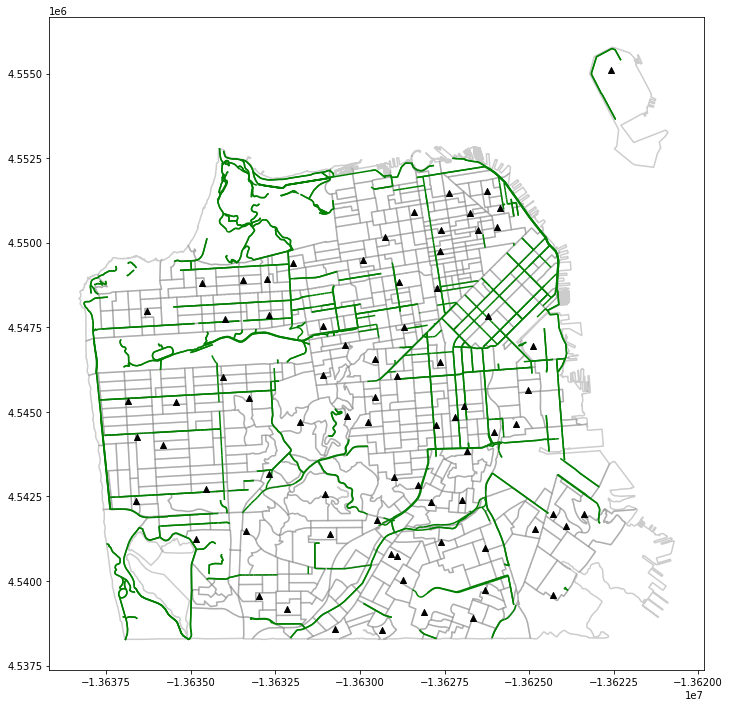

In [13]:
plt.figure(figsize=(12,12))
ax = plt.gca()
census.boundary.plot(ax=ax, color='gray', alpha=0.4)
sc_df.plot(ax=ax, c='black', marker='^', zorder=50)
bike_routes.plot(ax=ax, color='green')
slow_streets.plot(ax=ax, color='purple')
bike_routes[bike_routes.geometry.contains(bike_routes.geometry[7])].dissolve().plot(ax=ax, color='red')

In [8]:
buffered = bike_routes.copy()
buffered.geometry = buffered.geometry.buffer(402)
bike_poly = buffered.dissolve()

NameError: name 'relevant_blocks' is not defined

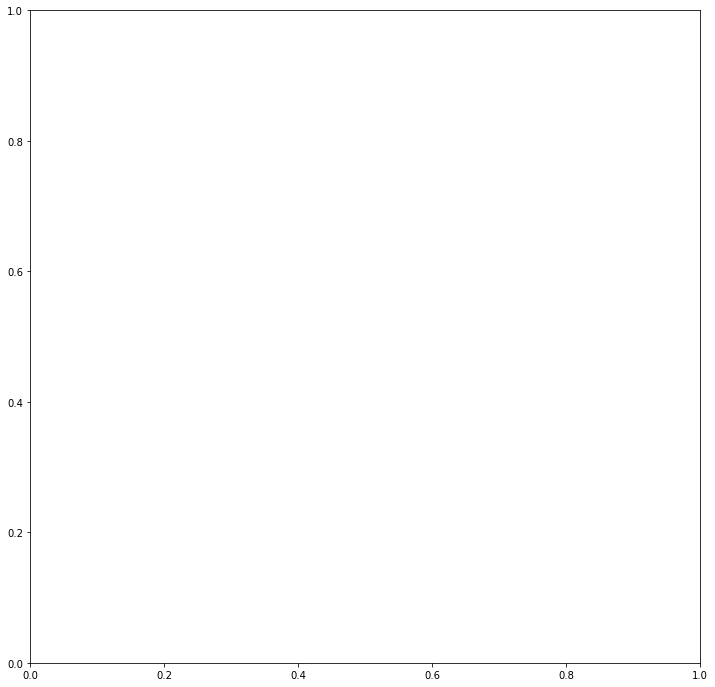

In [15]:
plt.figure(figsize=(12,12))
ax = plt.gca()
# census.boundary.plot(ax=ax, color='gray', alpha=0.4)
relevant_blocks.boundary.plot(ax=ax, color='gray', alpha=0.4)
sc_df.plot(ax=ax, c='black', marker='^', zorder=50, alpha=0.4)
bike_routes.plot(ax=ax, color='green')
bike_poly.plot(ax=ax, color='red', alpha=0.3)
sc_df.sjoin(bike_poly).plot(ax=ax, marker='^', c='black', zorder=50)

2022-02-23 15:29:25 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-23 15:29:25 Projected GeoDataFrame to epsg:4326
2022-02-23 15:29:25 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-23 15:29:25 Projected GeoDataFrame to epsg:4326
2022-02-23 15:29:25 Requesting data within polygon from API in 1 request(s)


/Users/katherinementzer/opt/anaconda3/envs/py39/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


2022-02-23 15:29:25 Retrieved response from cache file "cache/890e201f5ad426d770df4d4241041494b306151e.json"
2022-02-23 15:29:25 Got all network data within polygon from API in 1 request(s)
2022-02-23 15:29:25 Creating graph from downloaded OSM data...
2022-02-23 15:29:27 Created graph with 98428 nodes and 184821 edges
2022-02-23 15:29:29 Added edge lengths to graph
2022-02-23 15:29:29 Identifying all nodes that lie outside the polygon...
2022-02-23 15:29:32 Created nodes GeoDataFrame from graph
2022-02-23 15:29:32 Created r-tree spatial index for 98428 geometries


/Users/katherinementzer/opt/anaconda3/envs/py39/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


2022-02-23 15:29:34 Identified 95069 geometries inside polygon
2022-02-23 15:29:36 Removed 3359 nodes outside polygon
2022-02-23 15:29:36 Truncated graph by polygon
2022-02-23 15:29:36 Begin topologically simplifying the graph...
2022-02-23 15:29:38 Identified 19932 edge endpoints
2022-02-23 15:29:44 Simplified graph: 95069 to 19932 nodes, 177993 to 50051 edges
2022-02-23 15:29:44 Identifying all nodes that lie outside the polygon...
2022-02-23 15:29:45 Created nodes GeoDataFrame from graph
2022-02-23 15:29:45 Created r-tree spatial index for 19932 geometries


/Users/katherinementzer/opt/anaconda3/envs/py39/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


2022-02-23 15:29:46 Identified 14683 geometries inside polygon
2022-02-23 15:29:46 Removed 5249 nodes outside polygon
2022-02-23 15:29:47 Removed 73 isolated nodes
2022-02-23 15:29:47 Got largest weakly connected component (13787 of 14610 total nodes)
2022-02-23 15:29:47 Truncated graph by polygon
2022-02-23 15:29:48 Counted undirected street segments incident to each node
2022-02-23 15:29:48 graph_from_polygon returned graph with 13787 nodes and 33703 edges
2022-02-23 15:29:48 Begin plotting the graph...
2022-02-23 15:29:49 Created edges GeoDataFrame from graph
2022-02-23 15:29:52 Created nodes GeoDataFrame from graph


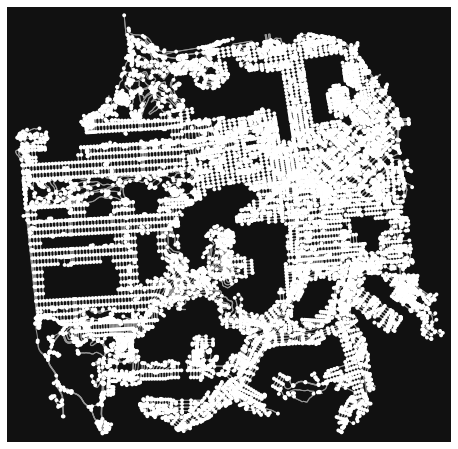

2022-02-23 15:29:52 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [16]:
g = ox.graph_from_polygon(polygon=buffered.dissolve().to_crs('epsg:4326').geometry[0], network_type = 'bike')
ox.plot_graph(g)

In [100]:
g = ox.utils_graph.add_edge_lengths(g)

2022-02-18 11:23:12 Added edge lengths to graph


In [101]:
census['block_lat'] = census.centroid.y
census['block_lon'] = census.centroid.x
census_centroid = census.copy()
census_centroid.geometry = [Point(xy) for xy in zip(census_centroid.block_lon, census_centroid.block_lat)]
census['block_lat'] = census.centroid.to_crs('epsg:4326').y
census['block_lon'] = census.centroid.to_crs('epsg:4326').x

In [12]:
relevant_schools = sc_df.sjoin(bike_poly)
relevant_blocks = census[census.index.isin(census_centroid.sjoin(bike_poly).index)]

NameError: name 'bike_poly' is not defined

In [103]:
def get_close_blocks(G, end_node, relevant_blocks):
    close_blocks = []
    for idx, row in relevant_blocks.iterrows():
        start_node = ox.get_nearest_node(G, (float(row['block_lat']), float(row['block_lon'])))
        try:
            route = nx.shortest_path(G, start_node, end_node, weight='distance')
            print('graph path cost is', graph_path_cost(G, route))
            if graph_path_cost(G, route) < 3219:
                close_blocks.append(row['BlockGroup'])
        except nx.NetworkXNoPath:
            continue
    return [int(x) for x in close_blocks]


def graph_path_cost(G, path):
#     print(path)
    return sum([G[path[i]][path[i+1]][0]['length'] for i in range(len(path)-1)])

In [104]:
def get_biking_distance_blocks(relevant_schools, relevant_blocks, G):
    bike_distance_blocks = {}
    for idx, row in relevant_schools.iterrows():
        print( float(row['lon']), float(row['lat']))
        end_node = ox.get_nearest_node(G, (float(row['lat']), float(row['lon'])))
        close_blocks = get_close_blocks(G, end_node, relevant_blocks)
        bike_distance_blocks[row['school_id']] = close_blocks
    return bike_distance_blocks

In [105]:
bike_distance_blocks = get_biking_distance_blocks(relevant_schools, relevant_blocks, g)

-122.482263 37.783001
2022-02-18 11:23:23 Found nearest node (65342698) to point (37.783001, -122.482263)
2022-02-18 11:23:23 Found nearest node (4150430557) to point (37.80772908865266, -122.41178392366966)
graph path cost is 9673.588000000002
2022-02-18 11:23:23 Found nearest node (65303250) to point (37.80509553089509, -122.41015933178367)
graph path cost is 10349.551
2022-02-18 11:23:23 Found nearest node (65321125) to point (37.804974859367285, -122.42054676096399)
graph path cost is 8816.705999999998
2022-02-18 11:23:23 Found nearest node (65327190) to point (37.80096536591606, -122.421994584695)
graph path cost is 7332.08
2022-02-18 11:23:23 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
graph path cost is 8408.642999999998
2022-02-18 11:23:23 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
graph path cost is 9145.076
2022-02-18 11:23:23 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)

graph path cost is2022-02-18 11:23:26 Found nearest node (65311977) to point (37.789106327939486, -122.45503834844027)
 3643.6510000000003
graph path cost is2022-02-18 11:23:26 Found nearest node (65307477) to point (37.78727658115401, -122.45730176977217)
 3715.552
2022-02-18 11:23:26 Found nearest node (5283668865) to point (37.790270141685355, -122.43748705640871)
graph path cost is 5337.910999999999
2022-02-18 11:23:26 Found nearest node (65301556) to point (37.78876152229938, -122.4422707608041)
graph path cost is 4993.347000000001
2022-02-18 11:23:26 Found nearest node (65301575) to point (37.790544450368635, -122.44261960985392)
graph path cost is 4795.414000000001
2022-02-18 11:23:26 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
graph path cost is 5678.103999999999
2022-02-18 11:23:26 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
graph path cost is 5876.141
2022-02-18 11:23:26 Found nearest node (65350762) to po

graph path cost is 7011.173999999997
2022-02-18 11:23:28 Found nearest node (65362632) to point (37.76616933083109, -122.43420093736212)
graph path cost is 6815.677999999998
2022-02-18 11:23:28 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
graph path cost is 7290.070999999997
2022-02-18 11:23:28 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
graph path cost is 5197.503
2022-02-18 11:23:28 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:23:28 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 8775.561
2022-02-18 11:23:28 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 8325.245999999997
2022-02-18 11:23:28 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 8071.132999999997
2022-02-18 11:23:28 Found nearest node (4911322451)

graph path cost is 10942.716000000002
2022-02-18 11:23:31 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
graph path cost is 10793.688000000004
2022-02-18 11:23:31 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 9779.292000000001
2022-02-18 11:23:31 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 9487.785
2022-02-18 11:23:31 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 12174.964999999997
2022-02-18 11:23:32 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 12153.788999999997
2022-02-18 11:23:32 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 10759.414999999997
2022-02-18 11:23:32 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 11043.364000000001
2022-0

2022-02-18 11:23:36 Found nearest node (65323715) to point (37.71873550147527, -122.43718426370656)
graph path cost is 11741.064000000002
2022-02-18 11:23:36 Found nearest node (65369754) to point (37.721077720919304, -122.43898212058357)
graph path cost is 10773.172000000004
2022-02-18 11:23:36 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 11408.954000000003
2022-02-18 11:23:36 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 11784.695000000002
2022-02-18 11:23:36 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 11298.940000000004
2022-02-18 11:23:36 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 11906.264000000003
2022-02-18 11:23:36 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 12269.890000000001
2022-02-18 11:23:36 Found near

graph path cost is 13104.023000000003
graph path cost is2022-02-18 11:23:38 Found nearest node (4017259362) to point (37.76435651196237, -122.48094039514052)
 2910.861
graph path cost is2022-02-18 11:23:38 Found nearest node (5440543662) to point (37.762465770400084, -122.48079875278512)
 3105.352
graph path cost is2022-02-18 11:23:38 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
 3157.7149999999992
graph path cost is2022-02-18 11:23:38 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
 4045.0740000000005
graph path cost is2022-02-18 11:23:38 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
 3566.33
graph path cost is2022-02-18 11:23:38 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
 3774.142
graph path cost is2022-02-18 11:23:38 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
 4184.378
graph path cost is2022-02-18 11:23:3

graph path cost is2022-02-18 11:23:40 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
 1295.238
graph path cost is2022-02-18 11:23:40 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
 774.3420000000001
2022-02-18 11:23:40 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
graph path cost is 3978.0739999999996
graph path cost is2022-02-18 11:23:40 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
 3487.419
graph path cost is2022-02-18 11:23:40 Found nearest node (65308500) to point (37.77923087503602, -122.4625421696958)
 2134.495
graph path cost is2022-02-18 11:23:40 Found nearest node (65308503) to point (37.779085520365584, -122.46575347303508)
 1851.851
graph path cost is2022-02-18 11:23:40 Found nearest node (2282794105) to point (37.77530669149761, -122.46549087672646)
 3261.4119999999994
graph path cost is2022-02-18 11:23:40 Found nearest node (65280086) to po

graph path cost is 11948.988000000003
2022-02-18 11:23:42 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 11657.593000000003
2022-02-18 11:23:43 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
graph path cost is 8670.509000000004
2022-02-18 11:23:43 Found nearest node (65312677) to point (37.79919973195819, -122.4190467375818)
graph path cost is 7255.277000000001
2022-02-18 11:23:43 Found nearest node (65299392) to point (37.79722369576274, -122.41949324490841)
graph path cost is 6982.821000000001
2022-02-18 11:23:43 Found nearest node (65327183) to point (37.79807994458961, -122.42253336368623)
graph path cost is 6868.21
2022-02-18 11:23:43 Found nearest node (295186777) to point (37.79570927710166, -122.42006634413715)
graph path cost is 6865.993000000001
2022-02-18 11:23:43 Found nearest node (65319613) to point (37.794574861235574, -122.41927317781511)
graph path cost is 6901.736
2022-02-18 11:23:4

2022-02-18 11:23:45 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
graph path cost is 5324.848
2022-02-18 11:23:45 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
graph path cost is 5081.793
2022-02-18 11:23:45 Found nearest node (259138858) to point (37.78631214129352, -122.4409452012692)
graph path cost is 4793.156
2022-02-18 11:23:45 Found nearest node (65352257) to point (37.78628356084092, -122.44668033075283)
graph path cost is 4187.323
2022-02-18 11:23:45 Found nearest node (65314209) to point (37.78413191454045, -122.44460408908891)
graph path cost is 4439.489000000001
2022-02-18 11:23:45 Found nearest node (65303442) to point (37.783360507745435, -122.45010939214386)
graph path cost is 3970.571000000001
2022-02-18 11:23:45 Found nearest node (65368498) to point (37.785352844697876, -122.45212067012115)
graph path cost is 3255.572
graph path cost is2022-02-18 11:23:45 Found nearest node (65315444) to point (37.7

2022-02-18 11:23:47 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 6140.048999999999
2022-02-18 11:23:47 Found nearest node (4911322451) to point (37.7818175474068, -122.40801617924421)
graph path cost is 6881.021
2022-02-18 11:23:47 Found nearest node (4941620854) to point (37.76711938633437, -122.40913645333997)
graph path cost is 7508.152999999999
2022-02-18 11:23:47 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
graph path cost is 6719.001
2022-02-18 11:23:47 Found nearest node (302742529) to point (37.78264625502897, -122.4019288125842)
graph path cost is 7964.448999999999
2022-02-18 11:23:47 Found nearest node (302742695) to point (37.78140876929053, -122.40038655278904)
graph path cost is 7999.975999999999
2022-02-18 11:23:47 Found nearest node (65317551) to point (37.77762912415222, -122.4067242070081)
graph path cost is 7317.165999999999
2022-02-18 11:23:47 Found nearest node (65317569) to p

2022-02-18 11:23:50 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 8828.331
2022-02-18 11:23:50 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 9112.280000000002
2022-02-18 11:23:50 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 8396.153999999997
2022-02-18 11:23:50 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 7527.121
2022-02-18 11:23:50 Found nearest node (65290305) to point (37.75901381409355, -122.41019824373979)
graph path cost is 8140.414000000001
2022-02-18 11:23:50 Found nearest node (65317599) to point (37.75889701594939, -122.4146891419343)
graph path cost is 7454.651999999999
2022-02-18 11:23:50 Found nearest node (65290949) to point (37.76284962619463, -122.40689886156404)
graph path cost is 7985.259999999999
2022-02-18 11:23:50 Found nearest node (4941620898) to poi

graph path cost is 10762.664000000006
2022-02-18 11:23:54 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 11369.988000000005
2022-02-18 11:23:54 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 11733.614000000003
2022-02-18 11:23:54 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 12016.652000000004
2022-02-18 11:23:54 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 12317.470000000005
2022-02-18 11:23:54 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 13164.812000000002
2022-02-18 11:23:54 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
graph path cost is 12011.771000000002
2022-02-18 11:23:54 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
2022-02-18 11:23:54 Found n

graph path cost is2022-02-18 11:23:56 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
 4476.019000000001
graph path cost is2022-02-18 11:23:56 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
 4287.506
graph path cost is2022-02-18 11:23:56 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
 3664.492
graph path cost is2022-02-18 11:23:56 Found nearest node (7092592136) to point (37.747642045964184, -122.47762786131263)
 4336.812000000001
graph path cost is2022-02-18 11:23:56 Found nearest node (65297136) to point (37.75093801540962, -122.48242297573583)
 4056.58
graph path cost is2022-02-18 11:23:56 Found nearest node (65321219) to point (37.753236654284116, -122.47801943109947)
 3653.475
graph path cost is2022-02-18 11:23:56 Found nearest node (5440186619) to point (37.75440111443067, -122.48347023928638)
 4055.894
graph path cost is2022-02-18 11:23:56 Found nearest node (65307198) to point (37.

graph path cost is2022-02-18 11:23:58 Found nearest node (65329615) to point (37.77763951610211, -122.47560235591833)
 207.704
graph path cost is2022-02-18 11:23:58 Found nearest node (65329618) to point (37.77577638915036, -122.47547376390688)
 0
graph path cost is2022-02-18 11:23:58 Found nearest node (4022947859) to point (37.77391087503082, -122.47534011517772)
 208.016
graph path cost is2022-02-18 11:23:58 Found nearest node (258911640) to point (37.77910969913061, -122.48573394056646)
 1471.796
graph path cost is2022-02-18 11:23:58 Found nearest node (65308532) to point (37.77839707309532, -122.48085128862951)
 793.1009999999999
graph path cost is2022-02-18 11:23:58 Found nearest node (65322448) to point (37.7771851100912, -122.48559771621606)
 1056.561
graph path cost is2022-02-18 11:23:58 Found nearest node (5848731975) to point (37.775320498375855, -122.48546224855158)
 848.431
graph path cost is2022-02-18 11:23:58 Found nearest node (65351712) to point (37.77460712771869, -12

graph path cost is2022-02-18 11:24:00 Found nearest node (65295337) to point (37.790676361392165, -122.4185064071934)
 2778.551
graph path cost is2022-02-18 11:24:00 Found nearest node (65354437) to point (37.78936443084227, -122.41878930546865)
 2911.262
graph path cost is2022-02-18 11:24:00 Found nearest node (5429620835) to point (37.79375222363469, -122.40862180666099)
 3395.3329999999987
graph path cost is2022-02-18 11:24:00 Found nearest node (65352420) to point (37.792446724384064, -122.40176857986005)
 2576.198
graph path cost is2022-02-18 11:24:00 Found nearest node (1271001348) to point (37.788653731567905, -122.40505921537716)
 2460.839
graph path cost is2022-02-18 11:24:00 Found nearest node (65307366) to point (37.79335057657602, -122.40616449952404)
 3264.842999999999
graph path cost is2022-02-18 11:24:00 Found nearest node (6967161032) to point (37.7905192812859, -122.40970895239985)
 3047.0699999999997
graph path cost is2022-02-18 11:24:00 Found nearest node (7332987492

2022-02-18 11:24:02 Found nearest node (5433307366) to point (37.78421527283543, -122.44053683611767)
graph path cost is 5033.505999999999
2022-02-18 11:24:02 Found nearest node (65297402) to point (37.7797106539579, -122.45477949311496)
graph path cost is 6509.4490000000005
2022-02-18 11:24:02 Found nearest node (65291765) to point (37.77575490274619, -122.45650139145366)
graph path cost is 5834.222
2022-02-18 11:24:02 Found nearest node (65308490) to point (37.77896268955643, -122.45726960653941)
graph path cost is 7507.389
2022-02-18 11:24:02 Found nearest node (65357125) to point (37.780594155495784, -122.44455498578267)
graph path cost is 5226.378
2022-02-18 11:24:02 Found nearest node (65336713) to point (37.77743162033597, -122.44402786205941)
graph path cost is 4664.903
2022-02-18 11:24:02 Found nearest node (5427673585) to point (37.77990944254048, -122.45072284231418)
graph path cost is 5586.489
2022-02-18 11:24:02 Found nearest node (65308343) to point (37.77658965303934, -1

2022-02-18 11:24:03 Found nearest node (1677788990) to point (37.766728013217985, -122.41873438777992)
graph path cost is 2844.419
2022-02-18 11:24:03 Found nearest node (5438558062) to point (37.76451938094703, -122.41995185990677)
graph path cost is 2933.779
graph path cost is2022-02-18 11:24:03 Found nearest node (65292400) to point (37.77027853206619, -122.42402831436767)
 2898.8469999999998
2022-02-18 11:24:03 Found nearest node (258968240) to point (37.767768726122846, -122.42437745282007)
graph path cost is 2817.106
2022-02-18 11:24:03 Found nearest node (258968242) to point (37.76478741103438, -122.42409666663768)
graph path cost is 3276.0280000000002
2022-02-18 11:24:04 Found nearest node (65366224) to point (37.76654059093876, -122.42759663246633)
graph path cost is 3304.2529999999997
2022-02-18 11:24:04 Found nearest node (65292830) to point (37.76366018976139, -122.42921809307322)
graph path cost is 3803.283
2022-02-18 11:24:04 Found nearest node (65312208) to point (37.764

2022-02-18 11:24:05 Found nearest node (65290327) to point (37.75516959143464, -122.40982375776973)
graph path cost is 3140.875
2022-02-18 11:24:05 Found nearest node (65317606) to point (37.75274571147885, -122.41447057177781)
graph path cost is 3573.7850000000003
2022-02-18 11:24:05 Found nearest node (65288827) to point (37.75044612750765, -122.41278255449299)
graph path cost is 3848.713
2022-02-18 11:24:05 Found nearest node (4021550353) to point (37.7495528168932, -122.41488692481546)
graph path cost is 4025.9130000000005
2022-02-18 11:24:05 Found nearest node (65322285) to point (37.752716504942875, -122.41051368623252)
graph path cost is 3404.8759999999997
2022-02-18 11:24:05 Found nearest node (65328992) to point (37.749742784107475, -122.41022125752765)
graph path cost is 3761.0969999999998
graph path cost is2022-02-18 11:24:06 Found nearest node (65322282) to point (37.75288470255052, -122.40772884923466)
 3160.7019999999998
2022-02-18 11:24:06 Found nearest node (65288983) t

graph path cost is 6799.603000000002
2022-02-18 11:24:08 Found nearest node (65287612) to point (37.7651510089688, -122.46261252007925)
graph path cost is 6696.113000000001
2022-02-18 11:24:08 Found nearest node (65302762) to point (37.7623231693161, -122.46286042410364)
graph path cost is 7101.806000000001
2022-02-18 11:24:08 Found nearest node (420508881) to point (37.76279466536992, -122.47378423894634)
graph path cost is 9638.428999999996
2022-02-18 11:24:08 Found nearest node (260109223) to point (37.76093337056224, -122.47362444840749)
graph path cost is 8156.914000000002
2022-02-18 11:24:08 Found nearest node (258912655) to point (37.764946110070255, -122.4674715661442)
graph path cost is 7162.725000000001
2022-02-18 11:24:08 Found nearest node (5440881192) to point (37.763069670590966, -122.46730733848717)
graph path cost is 7396.823000000001
2022-02-18 11:24:09 Found nearest node (5440873010) to point (37.76120614303233, -122.46720046374995)
graph path cost is 7554.84500000000

graph path cost is 12023.804
2022-02-18 11:24:12 Found nearest node (65307195) to point (37.752678812042234, -122.49064686619671)
graph path cost is 11631.909999999998
2022-02-18 11:24:12 Found nearest node (65307198) to point (37.750813389398374, -122.49051190423215)
graph path cost is 11839.206
2022-02-18 11:24:13 Found nearest node (65329911) to point (37.74190437016897, -122.48046698172008)
graph path cost is 12021.811
2022-02-18 11:24:13 Found nearest node (65297149) to point (37.74004083876437, -122.48033818905878)
graph path cost is 12323.477
2022-02-18 11:24:13 Found nearest node (750039468) to point (37.73700594062475, -122.48253683259588)
graph path cost is 14467.203999999998
2022-02-18 11:24:13 Found nearest node (65317312) to point (37.73577940869744, -122.48994310651585)
graph path cost is 13717.882
2022-02-18 11:24:13 Found nearest node (65307208) to point (37.74148988651963, -122.48985911150616)
graph path cost is 12870.693000000001
2022-02-18 11:24:13 Found nearest node

graph path cost is 8341.624
2022-02-18 11:24:16 Found nearest node (65329615) to point (37.77763951610211, -122.47560235591833)
graph path cost is 7925.880000000001
2022-02-18 11:24:16 Found nearest node (65329618) to point (37.77577638915036, -122.47547376390688)
graph path cost is 7718.221000000001
2022-02-18 11:24:17 Found nearest node (4022947859) to point (37.77391087503082, -122.47534011517772)
graph path cost is 7926.146000000001
2022-02-18 11:24:17 Found nearest node (258911640) to point (37.77910969913061, -122.48573394056646)
graph path cost is 9252.844999999998
2022-02-18 11:24:17 Found nearest node (65308532) to point (37.77839707309532, -122.48085128862951)
graph path cost is 9306.422999999997
2022-02-18 11:24:17 Found nearest node (65322448) to point (37.7771851100912, -122.48559771621606)
graph path cost is 8837.57
2022-02-18 11:24:17 Found nearest node (5848731975) to point (37.775320498375855, -122.48546224855158)
graph path cost is 8607.664999999999
2022-02-18 11:24:1

graph path cost is 10833.173000000004
2022-02-18 11:24:19 Found nearest node (65307412) to point (37.79176125034852, -122.41986713093235)
graph path cost is 10635.080000000004
2022-02-18 11:24:20 Found nearest node (65295337) to point (37.790676361392165, -122.4185064071934)
graph path cost is 10530.578000000003
2022-02-18 11:24:20 Found nearest node (65354437) to point (37.78936443084227, -122.41878930546865)
graph path cost is 10663.289000000002
2022-02-18 11:24:20 Found nearest node (5429620835) to point (37.79375222363469, -122.40862180666099)
graph path cost is 13197.994000000002
2022-02-18 11:24:20 Found nearest node (65352420) to point (37.792446724384064, -122.40176857986005)
graph path cost is 12363.854000000003
2022-02-18 11:24:20 Found nearest node (1271001348) to point (37.788653731567905, -122.40505921537716)
graph path cost is 12263.500000000002
2022-02-18 11:24:20 Found nearest node (65307366) to point (37.79335057657602, -122.40616449952404)
graph path cost is 13067.504

2022-02-18 11:24:24 Found nearest node (65368498) to point (37.785352844697876, -122.45212067012115)
graph path cost is 15691.427000000005
2022-02-18 11:24:24 Found nearest node (65315444) to point (37.78368774144885, -122.45675946691382)
graph path cost is 15069.602000000004
2022-02-18 11:24:24 Found nearest node (65314187) to point (37.78587886657106, -122.42816600859189)
graph path cost is 10402.605000000001
2022-02-18 11:24:24 Found nearest node (5723176764) to point (37.785039329838504, -122.43474610497765)
graph path cost is 10977.666000000001
2022-02-18 11:24:24 Found nearest node (5433307366) to point (37.78421527283543, -122.44053683611767)
graph path cost is 11427.762000000004
2022-02-18 11:24:24 Found nearest node (65297402) to point (37.7797106539579, -122.45477949311496)
graph path cost is 14601.332000000006
2022-02-18 11:24:24 Found nearest node (65291765) to point (37.77575490274619, -122.45650139145366)
graph path cost is 13894.150000000005
2022-02-18 11:24:24 Found nea

2022-02-18 11:24:27 Found nearest node (65317569) to point (37.7734260385206, -122.4120419178638)
graph path cost is 8525.948
2022-02-18 11:24:27 Found nearest node (65290790) to point (37.778437636384865, -122.3983238508471)
graph path cost is 9055.387000000002
2022-02-18 11:24:27 Found nearest node (911547144) to point (37.77272128300164, -122.40559486862117)
graph path cost is 8141.377999999997
2022-02-18 11:24:27 Found nearest node (65315836) to point (37.771436226430794, -122.42002904820676)
graph path cost is 8308.904999999999
2022-02-18 11:24:28 Found nearest node (5437877143) to point (37.767768228331896, -122.4209257395286)
graph path cost is 8144.213999999998
2022-02-18 11:24:28 Found nearest node (1677788990) to point (37.766728013217985, -122.41873438777992)
graph path cost is 7719.805999999999
2022-02-18 11:24:28 Found nearest node (5438558062) to point (37.76451938094703, -122.41995185990677)
graph path cost is 7672.324999999999
2022-02-18 11:24:28 Found nearest node (652

graph path cost is 6447.021999999999
2022-02-18 11:24:29 Found nearest node (4941620898) to point (37.7569206826464, -122.40589424974014)
graph path cost is 5830.556999999999
2022-02-18 11:24:29 Found nearest node (65317601) to point (37.75569907037358, -122.41438215023298)
graph path cost is 6171.931
2022-02-18 11:24:29 Found nearest node (65290322) to point (37.756768862366734, -122.40997572780076)
graph path cost is 5731.830999999999
2022-02-18 11:24:29 Found nearest node (65290327) to point (37.75516959143464, -122.40982375776973)
graph path cost is 5553.874
2022-02-18 11:24:29 Found nearest node (65317606) to point (37.75274571147885, -122.41447057177781)
graph path cost is 6171.134999999999
2022-02-18 11:24:29 Found nearest node (65288827) to point (37.75044612750765, -122.41278255449299)
graph path cost is 5540.405
2022-02-18 11:24:30 Found nearest node (4021550353) to point (37.7495528168932, -122.41488692481546)
graph path cost is 5910.543999999999
2022-02-18 11:24:30 Found ne

graph path cost is 11546.338000000002
2022-02-18 11:24:31 Found nearest node (65287612) to point (37.7651510089688, -122.46261252007925)
graph path cost is 11483.596000000005
2022-02-18 11:24:31 Found nearest node (65302762) to point (37.7623231693161, -122.46286042410364)
graph path cost is 11077.822000000002
2022-02-18 11:24:31 Found nearest node (420508881) to point (37.76279466536992, -122.47378423894634)
graph path cost is 12258.337000000003
2022-02-18 11:24:31 Found nearest node (260109223) to point (37.76093337056224, -122.47362444840749)
graph path cost is 12056.216000000004
2022-02-18 11:24:31 Found nearest node (258912655) to point (37.764946110070255, -122.4674715661442)
graph path cost is 11900.364000000003
2022-02-18 11:24:31 Found nearest node (5440881192) to point (37.763069670590966, -122.46730733848717)
graph path cost is 11554.631000000001
2022-02-18 11:24:31 Found nearest node (5440873010) to point (37.76120614303233, -122.46720046374995)
graph path cost is 11468.163

graph path cost is 13482.891000000005
2022-02-18 11:24:34 Found nearest node (65307198) to point (37.74894930784525, -122.49038363630702)
graph path cost is 14007.129000000006
2022-02-18 11:24:34 Found nearest node (65288308) to point (37.75454633278515, -122.49077390803016)
graph path cost is 13798.026000000005
2022-02-18 11:24:34 Found nearest node (65307195) to point (37.752678812042234, -122.49064686619671)
graph path cost is 13799.833000000004
2022-02-18 11:24:34 Found nearest node (65307198) to point (37.750813389398374, -122.49051190423215)
graph path cost is 14007.129000000006
2022-02-18 11:24:34 Found nearest node (65329911) to point (37.74190437016897, -122.48046698172008)
graph path cost is 11704.691000000003
2022-02-18 11:24:34 Found nearest node (65297149) to point (37.74004083876437, -122.48033818905878)
graph path cost is 11591.385000000002
2022-02-18 11:24:34 Found nearest node (750039468) to point (37.73700594062475, -122.48253683259588)
graph path cost is 13735.112000

2022-02-18 11:24:37 Found nearest node (65280086) to point (37.774619306988065, -122.46982163223007)
graph path cost is 14513.791000000007
2022-02-18 11:24:37 Found nearest node (65349666) to point (37.77701162663592, -122.46882649945772)
graph path cost is 14211.012000000006
2022-02-18 11:24:37 Found nearest node (65280076) to point (37.77937055344047, -122.47013651387344)
graph path cost is 14929.607000000004
2022-02-18 11:24:38 Found nearest node (258911612) to point (37.77956373404212, -122.47574249270258)
graph path cost is 15322.868000000004
2022-02-18 11:24:38 Found nearest node (65329615) to point (37.77763951610211, -122.47560235591833)
graph path cost is 14907.114000000003
2022-02-18 11:24:38 Found nearest node (65329618) to point (37.77577638915036, -122.47547376390688)
graph path cost is 14699.455000000004
2022-02-18 11:24:38 Found nearest node (4022947859) to point (37.77391087503082, -122.47534011517772)
graph path cost is 14491.474000000006
2022-02-18 11:24:38 Found near

2022-02-18 11:24:41 Found nearest node (65319613) to point (37.794574861235574, -122.41927317781511)
graph path cost is 6322.26
2022-02-18 11:24:41 Found nearest node (65354451) to point (37.79325334755398, -122.42015309410411)
graph path cost is 6143.905
2022-02-18 11:24:41 Found nearest node (65307412) to point (37.79176125034852, -122.41986713093235)
graph path cost is 5945.812000000001
2022-02-18 11:24:41 Found nearest node (65295337) to point (37.790676361392165, -122.4185064071934)
graph path cost is 5841.3099999999995
2022-02-18 11:24:41 Found nearest node (65354437) to point (37.78936443084227, -122.41878930546865)
graph path cost is 5974.021000000001
2022-02-18 11:24:41 Found nearest node (5429620835) to point (37.79375222363469, -122.40862180666099)
graph path cost is 8035.495
2022-02-18 11:24:41 Found nearest node (65352420) to point (37.792446724384064, -122.40176857986005)
graph path cost is 7201.3550000000005
2022-02-18 11:24:41 Found nearest node (1271001348) to point (3

graph path cost is 7980.349000000004
2022-02-18 11:24:44 Found nearest node (65315444) to point (37.78368774144885, -122.45675946691382)
graph path cost is 8262.097000000002
2022-02-18 11:24:44 Found nearest node (65314187) to point (37.78587886657106, -122.42816600859189)
graph path cost is 5585.605
2022-02-18 11:24:44 Found nearest node (5723176764) to point (37.785039329838504, -122.43474610497765)
graph path cost is 6162.7029999999995
2022-02-18 11:24:44 Found nearest node (5433307366) to point (37.78421527283543, -122.44053683611767)
graph path cost is 6681.482999999998
2022-02-18 11:24:44 Found nearest node (65297402) to point (37.7797106539579, -122.45477949311496)
graph path cost is 7725.863000000001
2022-02-18 11:24:44 Found nearest node (65291765) to point (37.77575490274619, -122.45650139145366)
graph path cost is 8261.019000000002
2022-02-18 11:24:44 Found nearest node (65308490) to point (37.77896268955643, -122.45726960653941)
graph path cost is 8828.391999999998
2022-02-

graph path cost is2022-02-18 11:24:47 Found nearest node (1677788990) to point (37.766728013217985, -122.41873438777992)
 2901.9890000000005
graph path cost is2022-02-18 11:24:47 Found nearest node (5438558062) to point (37.76451938094703, -122.41995185990677)
 2858.155
2022-02-18 11:24:47 Found nearest node (65292400) to point (37.77027853206619, -122.42402831436767)
graph path cost is 4080.3990000000003
graph path cost is2022-02-18 11:24:47 Found nearest node (258968240) to point (37.767768726122846, -122.42437745282007)
 3554.008
2022-02-18 11:24:47 Found nearest node (258968242) to point (37.76478741103438, -122.42409666663768)
graph path cost is 3193.972
2022-02-18 11:24:47 Found nearest node (65366224) to point (37.76654059093876, -122.42759663246633)
graph path cost is 3681.8830000000003
2022-02-18 11:24:47 Found nearest node (65292830) to point (37.76366018976139, -122.42921809307322)
graph path cost is 3721.3950000000004
2022-02-18 11:24:47 Found nearest node (65312208) to poi

graph path cost is2022-02-18 11:24:48 Found nearest node (65322282) to point (37.75288470255052, -122.40772884923466)
 399.88200000000006
graph path cost is2022-02-18 11:24:48 Found nearest node (65288983) to point (37.75208497502882, -122.40469340911989)
 0
graph path cost is2022-02-18 11:24:48 Found nearest node (65354522) to point (37.74993605457888, -122.40742095103604)
 754.0070000000001
2022-02-18 11:24:48 Found nearest node (65292440) to point (37.73148027781759, -122.40202235073849)
graph path cost is 3000.146999999999
2022-02-18 11:24:48 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
graph path cost is 4498.7029999999995
2022-02-18 11:24:48 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 4973.104
2022-02-18 11:24:48 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 3972.5989999999993
2022-02-18 11:24:48 Found nearest node (65357770) to point (

graph path cost is 10959.431999999997
2022-02-18 11:24:50 Found nearest node (260109223) to point (37.76093337056224, -122.47362444840749)
graph path cost is 9477.917000000001
2022-02-18 11:24:50 Found nearest node (258912655) to point (37.764946110070255, -122.4674715661442)
graph path cost is 8483.728
2022-02-18 11:24:50 Found nearest node (5440881192) to point (37.763069670590966, -122.46730733848717)
graph path cost is 8717.825999999997
2022-02-18 11:24:50 Found nearest node (5440873010) to point (37.76120614303233, -122.46720046374995)
graph path cost is 8875.848
2022-02-18 11:24:50 Found nearest node (4044864367) to point (37.758487323548465, -122.47377442508805)
graph path cost is 10071.517999999998
2022-02-18 11:24:50 Found nearest node (65293940) to point (37.75843092736645, -122.46646830013148)
graph path cost is 9415.441999999997
2022-02-18 11:24:50 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
graph path cost is 9000.228999999998
2022-02-1

2022-02-18 11:24:54 Found nearest node (65307195) to point (37.752678812042234, -122.49064686619671)
graph path cost is 12237.075999999994
2022-02-18 11:24:54 Found nearest node (65307198) to point (37.750813389398374, -122.49051190423215)
graph path cost is 12444.371999999996
2022-02-18 11:24:54 Found nearest node (65329911) to point (37.74190437016897, -122.48046698172008)
graph path cost is 10141.933999999997
2022-02-18 11:24:54 Found nearest node (65297149) to point (37.74004083876437, -122.48033818905878)
graph path cost is 10028.627999999999
2022-02-18 11:24:54 Found nearest node (750039468) to point (37.73700594062475, -122.48253683259588)
graph path cost is 12172.354999999994
2022-02-18 11:24:54 Found nearest node (65317312) to point (37.73577940869744, -122.48994310651585)
graph path cost is 11423.032999999996
2022-02-18 11:24:54 Found nearest node (65307208) to point (37.74148988651963, -122.48985911150616)
graph path cost is 11503.755999999994
2022-02-18 11:24:54 Found neare

2022-02-18 11:24:58 Found nearest node (65280086) to point (37.774619306988065, -122.46982163223007)
graph path cost is 8558.788999999999
2022-02-18 11:24:58 Found nearest node (65349666) to point (37.77701162663592, -122.46882649945772)
graph path cost is 8577.881
2022-02-18 11:24:59 Found nearest node (65280076) to point (37.77937055344047, -122.47013651387344)
graph path cost is 8974.496999999998
2022-02-18 11:24:59 Found nearest node (258911612) to point (37.77956373404212, -122.47574249270258)
graph path cost is 9662.627
2022-02-18 11:24:59 Found nearest node (65329615) to point (37.77763951610211, -122.47560235591833)
graph path cost is 9246.882999999998
2022-02-18 11:24:59 Found nearest node (65329618) to point (37.77577638915036, -122.47547376390688)
graph path cost is 9039.223999999998
2022-02-18 11:24:59 Found nearest node (4022947859) to point (37.77391087503082, -122.47534011517772)
graph path cost is 9247.148999999998
2022-02-18 11:24:59 Found nearest node (258911640) to p

graph path cost is2022-02-18 11:25:01 Found nearest node (65354451) to point (37.79325334755398, -122.42015309410411)
 3833.412
graph path cost is2022-02-18 11:25:01 Found nearest node (65307412) to point (37.79176125034852, -122.41986713093235)
 4030.8610000000003
2022-02-18 11:25:01 Found nearest node (65295337) to point (37.790676361392165, -122.4185064071934)
graph path cost is 4135.47
graph path cost is2022-02-18 11:25:02 Found nearest node (65354437) to point (37.78936443084227, -122.41878930546865)
 4296.911
2022-02-18 11:25:02 Found nearest node (5429620835) to point (37.79375222363469, -122.40862180666099)
graph path cost is 8414.479
2022-02-18 11:25:02 Found nearest node (65352420) to point (37.792446724384064, -122.40176857986005)
graph path cost is 7595.343999999997
2022-02-18 11:25:02 Found nearest node (1271001348) to point (37.788653731567905, -122.40505921537716)
graph path cost is 7479.984999999999
2022-02-18 11:25:02 Found nearest node (65307366) to point (37.79335057

graph path cost is2022-02-18 11:25:04 Found nearest node (65291765) to point (37.77575490274619, -122.45650139145366)
 1876.8
graph path cost is2022-02-18 11:25:04 Found nearest node (65308490) to point (37.77896268955643, -122.45726960653941)
 1332.9129999999998
graph path cost is2022-02-18 11:25:04 Found nearest node (65357125) to point (37.780594155495784, -122.44455498578267)
 2350.108
graph path cost is2022-02-18 11:25:04 Found nearest node (65336713) to point (37.77743162033597, -122.44402786205941)
 2289.436
graph path cost is2022-02-18 11:25:04 Found nearest node (5427673585) to point (37.77990944254048, -122.45072284231418)
 1819.3559999999998
graph path cost is2022-02-18 11:25:04 Found nearest node (65308343) to point (37.77658965303934, -122.45071403025615)
 1581.5589999999997
graph path cost is2022-02-18 11:25:04 Found nearest node (5271383813) to point (37.78250232533639, -122.43591674323393)
 2645.8250000000003
graph path cost is2022-02-18 11:25:04 Found nearest node (259

graph path cost is 4860.397
2022-02-18 11:25:05 Found nearest node (258968240) to point (37.767768726122846, -122.42437745282007)
graph path cost is 4969.345
2022-02-18 11:25:05 Found nearest node (258968242) to point (37.76478741103438, -122.42409666663768)
graph path cost is 5328.775
2022-02-18 11:25:05 Found nearest node (65366224) to point (37.76654059093876, -122.42759663246633)
graph path cost is 5277.701999999999
2022-02-18 11:25:05 Found nearest node (65292830) to point (37.76366018976139, -122.42921809307322)
graph path cost is 4899.625
2022-02-18 11:25:05 Found nearest node (65312208) to point (37.764727469168555, -122.43127052728846)
graph path cost is 4734.826
2022-02-18 11:25:05 Found nearest node (65308901) to point (37.757435662095325, -122.44521399206643)
graph path cost is 8708.856
2022-02-18 11:25:06 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
graph path cost is 7798.091
2022-02-18 11:25:06 Found nearest node (4350171065) to point 

graph path cost is 8245.136
2022-02-18 11:25:09 Found nearest node (65322282) to point (37.75288470255052, -122.40772884923466)
graph path cost is 8136.207999999997
2022-02-18 11:25:09 Found nearest node (65288983) to point (37.75208497502882, -122.40469340911989)
graph path cost is 8537.650999999998
2022-02-18 11:25:09 Found nearest node (65354522) to point (37.74993605457888, -122.40742095103604)
graph path cost is 8500.283999999998
2022-02-18 11:25:09 Found nearest node (65292440) to point (37.73148027781759, -122.40202235073849)
graph path cost is 13321.494
2022-02-18 11:25:09 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
graph path cost is 12528.176000000003
2022-02-18 11:25:09 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 13002.577000000005
2022-02-18 11:25:09 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 13756.397
2022-02-18 11:25:09 Foun

graph path cost is 3943.596999999999
2022-02-18 11:25:13 Found nearest node (5440873010) to point (37.76120614303233, -122.46720046374995)
graph path cost is 4101.618999999999
2022-02-18 11:25:13 Found nearest node (4044864367) to point (37.758487323548465, -122.47377442508805)
graph path cost is 5313.025999999999
2022-02-18 11:25:13 Found nearest node (65293940) to point (37.75843092736645, -122.46646830013148)
graph path cost is 4442.904999999999
2022-02-18 11:25:13 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
graph path cost is 4858.117999999998
2022-02-18 11:25:13 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
graph path cost is 5710.395999999999
2022-02-18 11:25:13 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 5707.5149999999985
2022-02-18 11:25:13 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 6158.783
202

graph path cost is 7590.504999999999
2022-02-18 11:25:15 Found nearest node (750039468) to point (37.73700594062475, -122.48253683259588)
graph path cost is 9734.231999999998
2022-02-18 11:25:15 Found nearest node (65317312) to point (37.73577940869744, -122.48994310651585)
graph path cost is 8984.910000000002
2022-02-18 11:25:15 Found nearest node (65307208) to point (37.74148988651963, -122.48985911150616)
graph path cost is 8137.721
2022-02-18 11:25:15 Found nearest node (4034231279) to point (37.739626308734564, -122.48972876648747)
graph path cost is 9029.409000000001
2022-02-18 11:25:15 Found nearest node (469713480) to point (37.73289533969628, -122.47756646032775)
graph path cost is 8262.563000000002
2022-02-18 11:25:15 Found nearest node (65299193) to point (37.73278491044827, -122.48277651144107)
graph path cost is 9965.023000000001
2022-02-18 11:25:15 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 12391.427
2022-02-18 11:25

2022-02-18 11:25:17 Found nearest node (65351712) to point (37.77460712771869, -122.48057789468093)
graph path cost is 4552.07
2022-02-18 11:25:17 Found nearest node (4022941212) to point (37.773454233796386, -122.48532724107211)
graph path cost is 4453.217999999999
2022-02-18 11:25:17 Found nearest node (4022941228) to point (37.773160822052404, -122.49175433075591)
graph path cost is 5124.732999999998
2022-02-18 11:25:17 Found nearest node (65349683) to point (37.776140377321006, -122.49484505893788)
graph path cost is 5967.999
2022-02-18 11:25:17 Found nearest node (7155489965) to point (37.77699865817142, -122.49095995768523)
graph path cost is 5527.740999999998
2022-02-18 11:25:17 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
graph path cost is 5715.419
2022-02-18 11:25:17 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
graph path cost is 6156.621999999999
2022-02-18 11:25:17 Found nearest node (302490510) to poi

graph path cost is 9482.464999999998
2022-02-18 11:25:20 Found nearest node (65335810) to point (37.78842963921465, -122.41862017018357)
graph path cost is 7722.025999999999
2022-02-18 11:25:21 Found nearest node (65354431) to point (37.787496355230445, -122.41841988343698)
graph path cost is 7325.176999999999
2022-02-18 11:25:21 Found nearest node (65303546) to point (37.789016520367554, -122.41024019349217)
2022-02-18 11:25:21 Found nearest node (65334133) to point (37.78631032623218, -122.41644658685311)
graph path cost is 7208.785999999999
2022-02-18 11:25:21 Found nearest node (65333831) to point (37.784911624022605, -122.41616591030046)
graph path cost is 6998.770999999998
2022-02-18 11:25:21 Found nearest node (3013377978) to point (37.7854141804398, -122.4196438006562)
graph path cost is 6863.866999999998
2022-02-18 11:25:21 Found nearest node (1901927742) to point (37.78606096089593, -122.41015329576142)
graph path cost is 7494.607999999999
2022-02-18 11:25:21 Found nearest no

2022-02-18 11:25:23 Found nearest node (5271383813) to point (37.78250232533639, -122.43591674323393)
graph path cost is 5356.857
2022-02-18 11:25:23 Found nearest node (259138850) to point (37.78155124476699, -122.43949769273945)
graph path cost is 4943.124
2022-02-18 11:25:23 Found nearest node (65357224) to point (37.779611426623845, -122.43533420563942)
graph path cost is 4982.834
2022-02-18 11:25:23 Found nearest node (259138846) to point (37.77875584212705, -122.43906655896288)
graph path cost is 4629.076
2022-02-18 11:25:23 Found nearest node (65339290) to point (37.77751382638017, -122.43803118218509)
graph path cost is 4532.445
2022-02-18 11:25:23 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
graph path cost is 6079.794999999999
2022-02-18 11:25:23 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
graph path cost is 5639.546
2022-02-18 11:25:23 Found nearest node (65348343) to point (37.78233640848462, -122.4224838

graph path cost is 5501.406999999999
2022-02-18 11:25:26 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 6291.298999999998
2022-02-18 11:25:26 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
graph path cost is 5681.960999999999
2022-02-18 11:25:26 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 6481.569
2022-02-18 11:25:26 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
graph path cost is 6838.005999999999
2022-02-18 11:25:26 Found nearest node (65318641) to point (37.75596934684817, -122.42324869768366)
graph path cost is 8908.986
2022-02-18 11:25:26 Found nearest node (65336534) to point (37.762633369937504, -122.41945411989897)
graph path cost is 7006.871999999998
2022-02-18 11:25:26 Found nearest node (65293581) to point (37.76073519790534, -122.41894172272498)
graph path cost is 9357.027000000002
2022-02-18 11:25:

graph path cost is 14245.110000000011
2022-02-18 11:25:29 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 9742.381
2022-02-18 11:25:29 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
2022-02-18 11:25:29 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
graph path cost is 8732.385000000002
2022-02-18 11:25:29 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
graph path cost is 8759.982000000002
2022-02-18 11:25:29 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is 9334.741000000002
2022-02-18 11:25:29 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
graph path cost is 8063.113000000003
2022-02-18 11:25:29 Found nearest node (5489346214) to point (37.74208515709766, -122.42232514968174)
graph path cost is 7021.165000000003
2022-02-18 11:25:29 Found nearest node (457

graph path cost is2022-02-18 11:25:31 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
 903.463
graph path cost is2022-02-18 11:25:31 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
 638.624
graph path cost is2022-02-18 11:25:31 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
 1108.152
graph path cost is2022-02-18 11:25:31 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
 1559.601
graph path cost is2022-02-18 11:25:31 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
 1811.014
graph path cost is2022-02-18 11:25:31 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
 4290.364
graph path cost is2022-02-18 11:25:31 Found nearest node (65280798) to point (37.75075231270995, -122.45087587800656)
 3979.9160000000006
graph path cost is2022-02-18 11:25:31 Found nearest node (1501430234) to point (37.745425793

2022-02-18 11:25:33 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 4707.996000000001
2022-02-18 11:25:33 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 5860.639
2022-02-18 11:25:33 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 7489.969999999999
2022-02-18 11:25:33 Found nearest node (65287047) to point (37.72071996841046, -122.48324780237846)
graph path cost is 7574.868
graph path cost is2022-02-18 11:25:33 Found nearest node (258912630) to point (37.76354117076029, -122.49945934865059)
 3562.696
graph path cost is2022-02-18 11:25:33 Found nearest node (5439328901) to point (37.76164923074262, -122.49933125312751)
 3794.1589999999997
graph path cost is2022-02-18 11:25:33 Found nearest node (65350548) to point (37.75978497900045, -122.49919785496114)
 4182.803
graph path cost is2022-02-18 11:25:33 Found nearest node (768682935

graph path cost is2022-02-18 11:25:34 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
 4160.285
graph path cost is2022-02-18 11:25:34 Found nearest node (302490510) to point (37.7772995611306, -122.51102609689374)
 5913.767000000001
graph path cost is2022-02-18 11:25:34 Found nearest node (65297053) to point (37.77542133885821, -122.50374138819838)
 4556.032000000001
graph path cost is2022-02-18 11:25:34 Found nearest node (4021327387) to point (37.77269543060788, -122.50192987883787)
 3959.255
graph path cost is2022-02-18 11:25:34 Found nearest node (65309740) to point (37.775249337849765, -122.50748833531473)
 4838.861000000002
graph path cost is2022-02-18 11:25:34 Found nearest node (65309736) to point (37.77911494175097, -122.50746459098093)
 5261.066000000002
2022-02-18 11:25:34 Found nearest node (65352792) to point (37.79737712739573, -122.46636975973117)
graph path cost is 6606.903000000001
2022-02-18 11:25:34 Found nearest node (65311848) to poi

graph path cost is2022-02-18 11:25:37 Found nearest node (5429620650) to point (37.7829459573632, -122.41660938649767)
 2949.865
graph path cost is2022-02-18 11:25:37 Found nearest node (5429620624) to point (37.783156258499574, -122.41496846704676)
 3240.9669999999996
graph path cost is2022-02-18 11:25:37 Found nearest node (65287201) to point (37.78008174473827, -122.41536058227419)
 3287.8629999999994
graph path cost is2022-02-18 11:25:37 Found nearest node (4720933147) to point (37.77920486567369, -122.41851586582204)
 3479.0679999999993
graph path cost is2022-02-18 11:25:37 Found nearest node (65327151) to point (37.78309455908309, -122.41920629401656)
 3198.3049999999994
graph path cost is2022-02-18 11:25:37 Found nearest node (65308264) to point (37.782015618669995, -122.41211046845942)
 2779.111
graph path cost is2022-02-18 11:25:37 Found nearest node (65326744) to point (37.7843955745925, -122.4094126155448)
 2320.2099999999996
graph path cost is2022-02-18 11:25:37 Found neare

2022-02-18 11:25:39 Found nearest node (65339290) to point (37.77751382638017, -122.43803118218509)
graph path cost is 5708.957999999996
2022-02-18 11:25:39 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
graph path cost is 4516.382
2022-02-18 11:25:39 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
graph path cost is 5648.907999999996
graph path cost is2022-02-18 11:25:39 Found nearest node (65348343) to point (37.78233640848462, -122.42248381490367)
 3753.5909999999985
2022-02-18 11:25:39 Found nearest node (2351399560) to point (37.780402518705436, -122.42537397851295)
graph path cost is 3948.619999999999
2022-02-18 11:25:39 Found nearest node (5433624558) to point (37.77849863134984, -122.43055668358924)
graph path cost is 4532.496999999999
2022-02-18 11:25:39 Found nearest node (5433624582) to point (37.77987835384186, -122.42948393483054)
graph path cost is 4318.5599999999995
2022-02-18 11:25:39 Found nearest node (54

2022-02-18 11:25:40 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
graph path cost is 12269.576000000005
2022-02-18 11:25:41 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
graph path cost is 12896.451000000006
2022-02-18 11:25:41 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
graph path cost is 6922.931999999997
2022-02-18 11:25:41 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 6029.946999999997
2022-02-18 11:25:41 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
graph path cost is 6331.859999999997
2022-02-18 11:25:41 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 5532.029999999998
2022-02-18 11:25:41 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
graph path cost is 5888.553999999997
2022-02-18 11:25:41 Found neare

graph path cost is 6692.784999999998
2022-02-18 11:25:43 Found nearest node (65292440) to point (37.73148027781759, -122.40202235073849)
graph path cost is 9398.750000000007
2022-02-18 11:25:43 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
graph path cost is 9767.246000000005
2022-02-18 11:25:43 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 10241.647000000004
2022-02-18 11:25:43 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 10371.20200000001
2022-02-18 11:25:43 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
2022-02-18 11:25:44 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
graph path cost is 7471.793999999998
2022-02-18 11:25:44 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
graph path cost is 8674.579000000002
2022-02-18 11:25:44 Found nearest nod

2022-02-18 11:25:47 Found nearest node (65293940) to point (37.75843092736645, -122.46646830013148)
graph path cost is 9387.396000000004
2022-02-18 11:25:47 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
graph path cost is 9802.609000000008
2022-02-18 11:25:47 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
graph path cost is 10654.887000000008
2022-02-18 11:25:47 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 10624.631000000008
2022-02-18 11:25:47 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 11076.080000000007
2022-02-18 11:25:47 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
graph path cost is 10769.521000000008
2022-02-18 11:25:47 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
graph path cost is 12382.459000000003
2022-02-18 11:25:47 Found neares

2022-02-18 11:25:51 Found nearest node (65317312) to point (37.73577940869744, -122.48994310651585)
graph path cost is 15209.14700000001
2022-02-18 11:25:51 Found nearest node (65307208) to point (37.74148988651963, -122.48985911150616)
graph path cost is 14361.958000000011
2022-02-18 11:25:51 Found nearest node (4034231279) to point (37.739626308734564, -122.48972876648747)
graph path cost is 15253.64600000001
2022-02-18 11:25:51 Found nearest node (469713480) to point (37.73289533969628, -122.47756646032775)
graph path cost is 14486.800000000012
2022-02-18 11:25:51 Found nearest node (65299193) to point (37.73278491044827, -122.48277651144107)
graph path cost is 18836.213999999996
2022-02-18 11:25:51 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 17851.277999999995
2022-02-18 11:25:51 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 15798.190000000008
2022-02-18 11:25:51 Found near

graph path cost is 10797.688000000007
2022-02-18 11:25:55 Found nearest node (65322448) to point (37.7771851100912, -122.48559771621606)
graph path cost is 10328.835000000006
2022-02-18 11:25:55 Found nearest node (5848731975) to point (37.775320498375855, -122.48546224855158)
graph path cost is 10098.930000000006
2022-02-18 11:25:55 Found nearest node (65351712) to point (37.77460712771869, -122.48057789468093)
graph path cost is 10382.032000000007
2022-02-18 11:25:55 Found nearest node (4022941212) to point (37.773454233796386, -122.48532724107211)
graph path cost is 9913.069000000009
2022-02-18 11:25:55 Found nearest node (4022941228) to point (37.773160822052404, -122.49175433075591)
graph path cost is 10584.584000000008
2022-02-18 11:25:55 Found nearest node (65349683) to point (37.776140377321006, -122.49484505893788)
graph path cost is 11427.850000000008
2022-02-18 11:25:55 Found nearest node (7155489965) to point (37.77699865817142, -122.49095995768523)
graph path cost is 10987

2022-02-18 11:25:57 Found nearest node (1271001348) to point (37.788653731567905, -122.40505921537716)
graph path cost is 5803.239999999999
2022-02-18 11:25:57 Found nearest node (65307366) to point (37.79335057657602, -122.40616449952404)
graph path cost is 6607.243999999996
2022-02-18 11:25:57 Found nearest node (6967161032) to point (37.7905192812859, -122.40970895239985)
graph path cost is 6389.470999999998
2022-02-18 11:25:57 Found nearest node (7332987492) to point (37.791461009861955, -122.40990202810335)
graph path cost is 6563.186999999997
2022-02-18 11:25:58 Found nearest node (65335810) to point (37.78842963921465, -122.41862017018357)
graph path cost is 4802.748
2022-02-18 11:25:58 Found nearest node (65354431) to point (37.787496355230445, -122.41841988343698)
graph path cost is 4405.899
2022-02-18 11:25:58 Found nearest node (65303546) to point (37.789016520367554, -122.41024019349217)
graph path cost is2022-02-18 11:25:58 Found nearest node (65334133) to point (37.786310

graph path cost is2022-02-18 11:25:59 Found nearest node (5271383813) to point (37.78250232533639, -122.43591674323393)
 2437.5790000000006
graph path cost is2022-02-18 11:25:59 Found nearest node (259138850) to point (37.78155124476699, -122.43949769273945)
 2023.846
graph path cost is2022-02-18 11:25:59 Found nearest node (65357224) to point (37.779611426623845, -122.43533420563942)
 2063.556
graph path cost is2022-02-18 11:25:59 Found nearest node (259138846) to point (37.77875584212705, -122.43906655896288)
 1709.5159999999998
graph path cost is2022-02-18 11:25:59 Found nearest node (65339290) to point (37.77751382638017, -122.43803118218509)
 1613.1669999999997
graph path cost is2022-02-18 11:25:59 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
 3160.4720000000007
graph path cost is2022-02-18 11:25:59 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
 2720.268000000001
graph path cost is2022-02-18 11:25:59 Found nearest

2022-02-18 11:26:01 Found nearest node (65308901) to point (37.757435662095325, -122.44521399206643)
graph path cost is 7320.744999999998
2022-02-18 11:26:01 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
graph path cost is 6409.9800000000005
2022-02-18 11:26:01 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
graph path cost is 7036.854999999999
graph path cost is2022-02-18 11:26:01 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
 2008.633
graph path cost is2022-02-18 11:26:01 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
 2667.185
graph path cost is2022-02-18 11:26:01 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
 2188.469
2022-02-18 11:26:01 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 2988.0770000000007
2022-02-18 11:26:01 Found nearest node (258968246) to poin

2022-02-18 11:26:03 Found nearest node (65288983) to point (37.75208497502882, -122.40469340911989)
graph path cost is 5828.158999999999
2022-02-18 11:26:03 Found nearest node (65354522) to point (37.74993605457888, -122.40742095103604)
graph path cost is 5790.791999999999
2022-02-18 11:26:03 Found nearest node (65292440) to point (37.73148027781759, -122.40202235073849)
graph path cost is 8561.360999999999
2022-02-18 11:26:03 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
graph path cost is 10046.149000000001
2022-02-18 11:26:03 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 10520.55
2022-02-18 11:26:03 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 10588.091999999997
2022-02-18 11:26:03 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
2022-02-18 11:26:03 Found nearest node (65327095) to point (37.74678254339896, -12

2022-02-18 11:26:06 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
graph path cost is 3885.7119999999995
2022-02-18 11:26:06 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
graph path cost is 4737.99
2022-02-18 11:26:06 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 4707.734
2022-02-18 11:26:06 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 5159.183000000002
2022-02-18 11:26:06 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
graph path cost is 4852.624000000002
2022-02-18 11:26:06 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
graph path cost is 6522.8629999999985
2022-02-18 11:26:06 Found nearest node (65280798) to point (37.75075231270995, -122.45087587800656)
graph path cost is 6212.415
2022-02-18 11:26:06 Found nearest node (1501430234) to point (3

graph path cost is 8695.129
2022-02-18 11:26:08 Found nearest node (65299193) to point (37.73278491044827, -122.48277651144107)
graph path cost is 13044.723999999995
2022-02-18 11:26:08 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 12059.787999999999
2022-02-18 11:26:09 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 10006.518999999995
2022-02-18 11:26:09 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 9548.665999999997
2022-02-18 11:26:09 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 15039.796999999997
2022-02-18 11:26:09 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 14178.056999999995
2022-02-18 11:26:09 Found nearest node (65287047) to point (37.72071996841046, -122.48324780237846)
graph path cost is 14262.954999999996

2022-02-18 11:26:10 Found nearest node (7155489965) to point (37.77699865817142, -122.49095995768523)
graph path cost is 5196.102
graph path cost is2022-02-18 11:26:10 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
 5383.779999999999
2022-02-18 11:26:10 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
graph path cost is 5824.982999999999
2022-02-18 11:26:10 Found nearest node (302490510) to point (37.7772995611306, -122.51102609689374)
graph path cost is 7135.901000000001
2022-02-18 11:26:11 Found nearest node (65297053) to point (37.77542133885821, -122.50374138819838)
graph path cost is 6220.73
2022-02-18 11:26:11 Found nearest node (4021327387) to point (37.77269543060788, -122.50192987883787)
graph path cost is 5623.9529999999995
2022-02-18 11:26:11 Found nearest node (65309740) to point (37.775249337849765, -122.50748833531473)
graph path cost is 6503.559
2022-02-18 11:26:11 Found nearest node (65309736) to point (

2022-02-18 11:26:14 Found nearest node (65333831) to point (37.784911624022605, -122.41616591030046)
graph path cost is 7928.338000000002
2022-02-18 11:26:14 Found nearest node (3013377978) to point (37.7854141804398, -122.4196438006562)
graph path cost is 8378.824999999999
2022-02-18 11:26:14 Found nearest node (1901927742) to point (37.78606096089593, -122.41015329576142)
graph path cost is 8333.796999999999
2022-02-18 11:26:14 Found nearest node (5429620688) to point (37.785219538500705, -122.41369909027424)
graph path cost is 8393.015
2022-02-18 11:26:14 Found nearest node (5429620650) to point (37.7829459573632, -122.41660938649767)
graph path cost is 7867.842000000001
2022-02-18 11:26:14 Found nearest node (5429620624) to point (37.783156258499574, -122.41496846704676)
graph path cost is 7782.712000000001
2022-02-18 11:26:14 Found nearest node (65287201) to point (37.78008174473827, -122.41536058227419)
graph path cost is 7403.786
2022-02-18 11:26:14 Found nearest node (472093314

graph path cost is 10806.961999999998
2022-02-18 11:26:18 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
graph path cost is 8474.294999999998
2022-02-18 11:26:18 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
graph path cost is 10428.747999999998
2022-02-18 11:26:19 Found nearest node (65348343) to point (37.78233640848462, -122.42248381490367)
graph path cost is 7879.772999999999
2022-02-18 11:26:19 Found nearest node (2351399560) to point (37.780402518705436, -122.42537397851295)
graph path cost is 7906.532999999999
2022-02-18 11:26:19 Found nearest node (5433624558) to point (37.77849863134984, -122.43055668358924)
graph path cost is 10089.248999999996
2022-02-18 11:26:19 Found nearest node (5433624582) to point (37.77987835384186, -122.42948393483054)
graph path cost is 8276.473
2022-02-18 11:26:19 Found nearest node (5433624586) to point (37.78092239969031, -122.4310450808025)
graph path cost is 10266.873999999996
20

2022-02-18 11:26:21 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
graph path cost is 8768.693999999998
2022-02-18 11:26:21 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 7956.948999999998
2022-02-18 11:26:21 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
graph path cost is 8258.861999999997
2022-02-18 11:26:21 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 7475.6979999999985
2022-02-18 11:26:22 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
graph path cost is 7119.293
2022-02-18 11:26:22 Found nearest node (65318641) to point (37.75596934684817, -122.42324869768366)
graph path cost is 7250.749999999999
2022-02-18 11:26:22 Found nearest node (65336534) to point (37.762633369937504, -122.41945411989897)
graph path cost is 5648.0199999999995
2022-02-18 11:26:22 Found nearest node (6

graph path cost is2022-02-18 11:26:23 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
 3270.392
2022-02-18 11:26:23 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
graph path cost is 3976.412
graph path cost is2022-02-18 11:26:23 Found nearest node (5489346214) to point (37.74208515709766, -122.42232514968174)
 5085.384
2022-02-18 11:26:23 Found nearest node (4572464251) to point (37.74573667245632, -122.4203251544086)
graph path cost is 5821.743
graph path cost is2022-02-18 11:26:23 Found nearest node (65313547) to point (37.73887976744216, -122.42209511751932)
 4815.942
graph path cost is2022-02-18 11:26:23 Found nearest node (65288605) to point (37.73737083765423, -122.41831850837157)
 2508.0499999999997
graph path cost is2022-02-18 11:26:23 Found nearest node (5443380622) to point (37.73638033855745, -122.4230700294034)
 4168.186999999999
graph path cost is2022-02-18 11:26:23 Found nearest node (65337945) to point (

2022-02-18 11:26:25 Found nearest node (65359648) to point (37.73477164544336, -122.44466895156471)
graph path cost is 4895.047
2022-02-18 11:26:25 Found nearest node (7427792613) to point (37.74156728249637, -122.4636757560942)
graph path cost is 7348.509999999998
2022-02-18 11:26:25 Found nearest node (65351167) to point (37.73832073380165, -122.4619961878578)
graph path cost is 7316.595999999999
2022-02-18 11:26:25 Found nearest node (65329950) to point (37.73668832203844, -122.4672034856608)
graph path cost is 7947.481
2022-02-18 11:26:25 Found nearest node (65287741) to point (37.738250117163965, -122.47146341822715)
graph path cost is 8150.973
2022-02-18 11:26:25 Found nearest node (65353310) to point (37.74171332950588, -122.47167207797487)
graph path cost is 8430.665999999997
2022-02-18 11:26:25 Found nearest node (65316984) to point (37.724015280558035, -122.46602977506939)
graph path cost is 11719.649
2022-02-18 11:26:25 Found nearest node (65305947) to point (37.731127121345

graph path cost is 12859.449999999999
2022-02-18 11:26:28 Found nearest node (65350548) to point (37.75978497900045, -122.49919785496114)
graph path cost is 13236.381000000001
2022-02-18 11:26:28 Found nearest node (7686829353) to point (37.75791851610467, -122.49906862265672)
graph path cost is 12452.311999999998
2022-02-18 11:26:28 Found nearest node (65324774) to point (37.75604941544751, -122.49894399682292)
graph path cost is 12821.170999999998
2022-02-18 11:26:28 Found nearest node (65288332) to point (37.75418572870556, -122.49880603085194)
graph path cost is 12613.372
2022-02-18 11:26:28 Found nearest node (999546898) to point (37.75185823671707, -122.49921229962133)
graph path cost is 12404.65
2022-02-18 11:26:28 Found nearest node (65309762) to point (37.75203865721367, -122.50521707919916)
graph path cost is 12783.057999999997
2022-02-18 11:26:28 Found nearest node (315372286) to point (37.755107046804554, -122.50895890911141)
graph path cost is 13435.11
2022-02-18 11:26:28 

graph path cost is 13904.152000000002
2022-02-18 11:26:32 Found nearest node (65309736) to point (37.77911494175097, -122.50746459098093)
graph path cost is 14326.357000000004
2022-02-18 11:26:32 Found nearest node (65352792) to point (37.79737712739573, -122.46636975973117)
graph path cost is 14156.199999999999
graph path cost is2022-02-18 11:26:32 Found nearest node (65311848) to point (37.709732398719574, -122.42099511755954)
 6880.3809999999985
2022-02-18 11:26:32 Found nearest node (589498601) to point (37.7720960517085, -122.39196829017548)
graph path cost is 6842.53
2022-02-18 11:26:32 Found nearest node (2156202658) to point (37.76767621623131, -122.40144712661072)
graph path cost is 5679.427
2022-02-18 11:26:32 Found nearest node (6311883023) to point (37.77962362591052, -122.39019288759853)
graph path cost is 7672.030000000001
graph path cost is2022-02-18 11:26:32 Found nearest node (65361668) to point (37.71083299936191, -122.39970599168926)
 2451.0299999999997
2022-02-18 11

2022-02-18 11:26:35 Found nearest node (5429620624) to point (37.783156258499574, -122.41496846704676)
graph path cost is 8944.873000000001
2022-02-18 11:26:35 Found nearest node (65287201) to point (37.78008174473827, -122.41536058227419)
graph path cost is 8565.947000000002
2022-02-18 11:26:35 Found nearest node (4720933147) to point (37.77920486567369, -122.41851586582204)
graph path cost is 8328.205999999998
2022-02-18 11:26:35 Found nearest node (65327151) to point (37.78309455908309, -122.41920629401656)
graph path cost is 9001.918
2022-02-18 11:26:35 Found nearest node (65308264) to point (37.782015618669995, -122.41211046845942)
graph path cost is 9153.265000000001
2022-02-18 11:26:35 Found nearest node (65326744) to point (37.7843955745925, -122.4094126155448)
graph path cost is 9273.218000000003
2022-02-18 11:26:35 Found nearest node (65365832) to point (37.78439756436249, -122.41268669065288)
graph path cost is 9362.948000000004
2022-02-18 11:26:35 Found nearest node (542961

graph path cost is 11437.327999999996
2022-02-18 11:26:40 Found nearest node (5433624582) to point (37.77987835384186, -122.42948393483054)
graph path cost is 9438.634000000002
2022-02-18 11:26:40 Found nearest node (5433624586) to point (37.78092239969031, -122.4310450808025)
graph path cost is 11614.952999999996
2022-02-18 11:26:40 Found nearest node (4553135834) to point (37.778286868443736, -122.42224653414843)
graph path cost is 8513.071
2022-02-18 11:26:40 Found nearest node (65329079) to point (37.77605197521085, -122.42200614479663)
graph path cost is 8401.246
2022-02-18 11:26:40 Found nearest node (5433624488) to point (37.77657015928659, -122.42544345013751)
graph path cost is 10619.806999999995
2022-02-18 11:26:40 Found nearest node (65292706) to point (37.7771857606785, -122.42809996153174)
graph path cost is 9049.608
2022-02-18 11:26:40 Found nearest node (65292699) to point (37.775322343025515, -122.42771994643064)
graph path cost is 10537.512999999995
2022-02-18 11:26:40

graph path cost is 9606.940999999997
2022-02-18 11:26:43 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 8823.776999999996
2022-02-18 11:26:43 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
graph path cost is 8467.371999999998
2022-02-18 11:26:43 Found nearest node (65318641) to point (37.75596934684817, -122.42324869768366)
graph path cost is 6473.6190000000015
2022-02-18 11:26:43 Found nearest node (65336534) to point (37.762633369937504, -122.41945411989897)
graph path cost is 6810.181000000001
2022-02-18 11:26:43 Found nearest node (65293581) to point (37.76073519790534, -122.41894172272498)
graph path cost is 6535.3460000000005
2022-02-18 11:26:43 Found nearest node (65319895) to point (37.75890129961695, -122.41993122514648)
graph path cost is 6423.923000000002
2022-02-18 11:26:44 Found nearest node (65302189) to point (37.75689485092261, -122.4186172618032)
graph path cost is 6177.733000000001


graph path cost is 7169.821999999999
2022-02-18 11:26:45 Found nearest node (65313547) to point (37.73887976744216, -122.42209511751932)
graph path cost is 6164.020999999999
graph path cost is2022-02-18 11:26:45 Found nearest node (65288605) to point (37.73737083765423, -122.41831850837157)
 3850.4519999999993
2022-02-18 11:26:45 Found nearest node (5443380622) to point (37.73638033855745, -122.4230700294034)
graph path cost is 5516.265999999998
2022-02-18 11:26:46 Found nearest node (65337945) to point (37.73672923187992, -122.41528051475397)
graph path cost is 3585.9529999999995
graph path cost is2022-02-18 11:26:46 Found nearest node (65302398) to point (37.736963929186615, -122.41314626790256)
 3366.6270000000004
graph path cost is2022-02-18 11:26:46 Found nearest node (65343560) to point (37.73693925372648, -122.41079481835527)
 3132.7390000000005
2022-02-18 11:26:46 Found nearest node (65322947) to point (37.73401618069585, -122.42500606142045)
graph path cost is 5126.93099999999

graph path cost is 8664.674999999997
2022-02-18 11:26:47 Found nearest node (65329950) to point (37.73668832203844, -122.4672034856608)
graph path cost is 9295.559999999998
2022-02-18 11:26:47 Found nearest node (65287741) to point (37.738250117163965, -122.47146341822715)
graph path cost is 9499.052
2022-02-18 11:26:48 Found nearest node (65353310) to point (37.74171332950588, -122.47167207797487)
graph path cost is 9778.744999999997
2022-02-18 11:26:48 Found nearest node (65316984) to point (37.724015280558035, -122.46602977506939)
graph path cost is 13067.728
2022-02-18 11:26:48 Found nearest node (65305947) to point (37.731127121345935, -122.47332248946167)
graph path cost is 10393.387999999999
2022-02-18 11:26:48 Found nearest node (65321791) to point (37.72258276048039, -122.47363272732329)
graph path cost is 12083.503999999999
2022-02-18 11:26:48 Found nearest node (1711315083) to point (37.72729491217412, -122.45537806235359)
graph path cost is 7458.140999999999
2022-02-18 11:2

graph path cost is 13961.451
2022-02-18 11:26:51 Found nearest node (999546898) to point (37.75185823671707, -122.49921229962133)
graph path cost is 13752.729
2022-02-18 11:26:51 Found nearest node (65309762) to point (37.75203865721367, -122.50521707919916)
graph path cost is 14131.136999999997
2022-02-18 11:26:51 Found nearest node (315372286) to point (37.755107046804554, -122.50895890911141)
graph path cost is 14783.189
2022-02-18 11:26:51 Found nearest node (65309759) to point (37.755764137857845, -122.50558604718981)
graph path cost is 14546.820000000002
2022-02-18 11:26:51 Found nearest node (65294084) to point (37.75762674589146, -122.50576214087214)
graph path cost is 14754.356
2022-02-18 11:26:51 Found nearest node (65288347) to point (37.75390245869907, -122.50540815472955)
graph path cost is 14339.012
2022-02-18 11:26:51 Found nearest node (5363516811) to point (37.76135069706013, -122.50614048806985)
graph path cost is 14785.014000000001
2022-02-18 11:26:51 Found nearest n

graph path cost is2022-02-18 11:26:55 Found nearest node (65311848) to point (37.709732398719574, -122.42099511755954)
 8228.459999999997
2022-02-18 11:26:55 Found nearest node (589498601) to point (37.7720960517085, -122.39196829017548)
graph path cost is 8004.691
2022-02-18 11:26:55 Found nearest node (2156202658) to point (37.76767621623131, -122.40144712661072)
graph path cost is 6841.588000000001
2022-02-18 11:26:55 Found nearest node (6311883023) to point (37.77962362591052, -122.39019288759853)
graph path cost is 8842.887
graph path cost is2022-02-18 11:26:55 Found nearest node (65361668) to point (37.71083299936191, -122.39970599168926)
 1523.4720000000002
2022-02-18 11:26:55 Found nearest node (65373220) to point (37.79561315031856, -122.40273754676629)
2022-02-18 11:26:55 Found nearest node (65328712) to point (37.795138339529636, -122.40652299150157)
graph path cost is 12709.579000000002
graph path cost is2022-02-18 11:26:55 Found nearest node (65343468) to point (37.7363926

2022-02-18 11:26:57 Found nearest node (258956665) to point (37.80575620901878, -122.43794848357003)
graph path cost is 4553.976
2022-02-18 11:26:57 Found nearest node (258669210) to point (37.805418615980656, -122.43035100587548)
graph path cost is 3997.5280000000002
2022-02-18 11:26:57 Found nearest node (65301604) to point (37.80452498236175, -122.44566931870493)
graph path cost is 5567.748999999999
2022-02-18 11:26:57 Found nearest node (65301601) to point (37.80042914259962, -122.444985585538)
graph path cost is 6280.374999999999
2022-02-18 11:26:57 Found nearest node (65301591) to point (37.797807276750106, -122.44432045224949)
graph path cost is 6595.080999999998
graph path cost is2022-02-18 11:26:57 Found nearest node (5426872904) to point (37.801028600193746, -122.42705833705243)
 3277.38
graph path cost is2022-02-18 11:26:57 Found nearest node (65303171) to point (37.80289390359833, -122.42743377764636)
 3387.9889999999996
2022-02-18 11:26:57 Found nearest node (65317176) to 

graph path cost is2022-02-18 11:26:58 Found nearest node (65325404) to point (37.77398386531176, -122.44942522177028)
 3412.3709999999996
graph path cost is2022-02-18 11:26:58 Found nearest node (5437182878) to point (37.77357164972858, -122.45272105828614)
 3213.718
graph path cost is2022-02-18 11:26:58 Found nearest node (5437470422) to point (37.771462056381864, -122.44304065737938)
 2580.558
graph path cost is2022-02-18 11:26:58 Found nearest node (65332164) to point (37.769533702819345, -122.44687320826968)
 2975.7479999999996
graph path cost is2022-02-18 11:26:58 Found nearest node (5437182831) to point (37.769878372415654, -122.45204985985956)
 3279.1099999999997
graph path cost is2022-02-18 11:26:58 Found nearest node (65337073) to point (37.77083515376944, -122.4479716973148)
 2912.1199999999994
graph path cost is2022-02-18 11:26:58 Found nearest node (65327910) to point (37.772153094200384, -122.43382702774585)
 2293.9939999999997
graph path cost is2022-02-18 11:26:58 Found n

graph path cost is 5408.027
2022-02-18 11:27:00 Found nearest node (65318060) to point (37.75489734441856, -122.42767405792404)
graph path cost is 6531.8240000000005
2022-02-18 11:27:00 Found nearest node (65314855) to point (37.752502334259404, -122.4274455878311)
graph path cost is 6259.545
2022-02-18 11:27:00 Found nearest node (65359051) to point (37.752630412875924, -122.43198647624925)
graph path cost is 6742.93
2022-02-18 11:27:00 Found nearest node (65362651) to point (37.75502483382743, -122.43221586100942)
graph path cost is 6920.263000000001
2022-02-18 11:27:00 Found nearest node (65288878) to point (37.74952976696714, -122.43564725358978)
graph path cost is 9950.754999999997
2022-02-18 11:27:01 Found nearest node (65303943) to point (37.74909666242974, -122.44025451980762)
graph path cost is 9617.445999999996
2022-02-18 11:27:01 Found nearest node (65313420) to point (37.750904755026085, -122.42729343714379)
graph path cost is 6084.923
2022-02-18 11:27:01 Found nearest node

graph path cost is 8317.535
2022-02-18 11:27:04 Found nearest node (65287147) to point (37.725159160595084, -122.43636886551295)
graph path cost is 8670.029
2022-02-18 11:27:04 Found nearest node (65344086) to point (37.724668278980644, -122.44112950445931)
graph path cost is 9004.390000000001
2022-02-18 11:27:04 Found nearest node (65311766) to point (37.730527071952565, -122.42335687890612)
graph path cost is 8344.706
2022-02-18 11:27:04 Found nearest node (65313922) to point (37.72932454412213, -122.42638644039972)
graph path cost is 8254.085
2022-02-18 11:27:04 Found nearest node (65337560) to point (37.730697322993535, -122.4165863446429)
graph path cost is 9062.936000000002
2022-02-18 11:27:04 Found nearest node (65327365) to point (37.73343011955163, -122.40937251510918)
graph path cost is 9787.581
2022-02-18 11:27:04 Found nearest node (65305691) to point (37.7294360165415, -122.41127167625166)
graph path cost is 9775.137
2022-02-18 11:27:04 Found nearest node (65328637) to poi

graph path cost is 11921.988000000001
2022-02-18 11:27:07 Found nearest node (1711315083) to point (37.72729491217412, -122.45537806235359)
graph path cost is 10015.961000000001
2022-02-18 11:27:07 Found nearest node (65314250) to point (37.73251144497303, -122.43700919856234)
graph path cost is 8076.232999999999
2022-02-18 11:27:07 Found nearest node (7531365808) to point (37.73015350193565, -122.44352969566181)
graph path cost is 8958.938
2022-02-18 11:27:07 Found nearest node (65324675) to point (37.72636498064992, -122.44934382748984)
graph path cost is 10035.703000000001
2022-02-18 11:27:07 Found nearest node (65292176) to point (37.73030625487412, -122.45006975531821)
graph path cost is 9411.496000000003
2022-02-18 11:27:07 Found nearest node (65334572) to point (37.73233634882553, -122.44658709836321)
graph path cost is 11326.540999999994
2022-02-18 11:27:08 Found nearest node (65354059) to point (37.72126803497533, -122.4542639943438)
graph path cost is 10454.981000000002
2022-

graph path cost is 10223.707999999999
2022-02-18 11:27:10 Found nearest node (65340964) to point (37.73827832180799, -122.49691289560633)
graph path cost is 10639.112
2022-02-18 11:27:10 Found nearest node (65341574) to point (37.735226408643285, -122.49631372055536)
graph path cost is 11052.481999999998
2022-02-18 11:27:10 Found nearest node (65330013) to point (37.738547612698525, -122.5001527458097)
graph path cost is 10544.89
2022-02-18 11:27:10 Found nearest node (65310675) to point (37.74569273878454, -122.50059563744708)
graph path cost is 9714.312999999996
2022-02-18 11:27:10 Found nearest node (615144433) to point (37.74347237835115, -122.50744712528487)
graph path cost is 10645.711999999998
2022-02-18 11:27:10 Found nearest node (65322161) to point (37.74087405853183, -122.50569138955953)
graph path cost is 11000.730999999998
2022-02-18 11:27:10 Found nearest node (5262825603) to point (37.74091767228098, -122.50294722488714)
graph path cost is 10349.632999999998
2022-02-18 1

2022-02-18 11:27:12 Found nearest node (65303500) to point (37.789497475628565, -122.39098923309525)
graph path cost is 7326.193999999998
2022-02-18 11:27:12 Found nearest node (65334525) to point (37.786058932727975, -122.39133580999771)
graph path cost is 8016.444999999998
2022-02-18 11:27:12 Found nearest node (65299107) to point (37.78158126555328, -122.39395625288276)
graph path cost is 8988.282000000001
2022-02-18 11:27:12 Found nearest node (258965488) to point (37.7847069919541, -122.38878597535688)
graph path cost is 7996.765999999998
2022-02-18 11:27:12 Found nearest node (5431097701) to point (37.78448436544223, -122.50140777820344)
graph path cost is 10126.074999999997
2022-02-18 11:27:12 Found nearest node (65289999) to point (37.769029220960135, -122.48192191713032)
graph path cost is 5658.203000000001
2022-02-18 11:27:12 Found nearest node (65291942) to point (37.717937695188425, -122.41869403355432)
graph path cost is 11927.422
2022-02-18 11:27:12 Found nearest node (63

2022-02-18 11:27:15 Found nearest node (5426872904) to point (37.801028600193746, -122.42705833705243)
graph path cost is 8008.907000000003
2022-02-18 11:27:16 Found nearest node (65303171) to point (37.80289390359833, -122.42743377764636)
graph path cost is 8118.9320000000025
2022-02-18 11:27:16 Found nearest node (65317176) to point (37.80140735923306, -122.43079462656681)
graph path cost is 8306.268000000002
2022-02-18 11:27:16 Found nearest node (65299773) to point (37.80083524944989, -122.43417448819821)
graph path cost is 8651.272000000003
2022-02-18 11:27:16 Found nearest node (5426872876) to point (37.79787254138745, -122.42557749428424)
graph path cost is 7479.389000000002
2022-02-18 11:27:16 Found nearest node (6777308246) to point (37.795097798184806, -122.42501638752164)
graph path cost is 7510.891000000002
2022-02-18 11:27:16 Found nearest node (65337003) to point (37.792397913519316, -122.42447096600186)
graph path cost is 6424.839000000001
2022-02-18 11:27:16 Found neare

2022-02-18 11:27:19 Found nearest node (5437182878) to point (37.77357164972858, -122.45272105828614)
graph path cost is 6764.671000000002
2022-02-18 11:27:19 Found nearest node (5437470422) to point (37.771462056381864, -122.44304065737938)
graph path cost is 5182.258000000002
2022-02-18 11:27:19 Found nearest node (65332164) to point (37.769533702819345, -122.44687320826968)
graph path cost is 5804.812000000002
2022-02-18 11:27:19 Found nearest node (5437182831) to point (37.769878372415654, -122.45204985985956)
graph path cost is 6108.573000000002
2022-02-18 11:27:19 Found nearest node (65337073) to point (37.77083515376944, -122.4479716973148)
graph path cost is 5741.315000000001
2022-02-18 11:27:19 Found nearest node (65327910) to point (37.772153094200384, -122.43382702774585)
graph path cost is 4430.563999999999
2022-02-18 11:27:19 Found nearest node (65335826) to point (37.76991148345791, -122.43413615848023)
graph path cost is 4498.534
2022-02-18 11:27:19 Found nearest node (1

graph path cost is2022-02-18 11:27:20 Found nearest node (65318069) to point (37.748642894229164, -122.42820204583997)
 1164.202
graph path cost is2022-02-18 11:27:20 Found nearest node (65288872) to point (37.749833774748446, -122.43171508150894)
 1733.702
graph path cost is2022-02-18 11:27:20 Found nearest node (258967893) to point (37.74708816197469, -122.42418577799963)
 804.573
graph path cost is2022-02-18 11:27:20 Found nearest node (258967895) to point (37.745093618987795, -122.42451366846475)
 626.355
graph path cost is2022-02-18 11:27:20 Found nearest node (65318098) to point (37.742778313571094, -122.42632915432199)
 540.207
graph path cost is2022-02-18 11:27:20 Found nearest node (65306682) to point (37.743964858821954, -122.42892351698296)
 824.768
graph path cost is2022-02-18 11:27:20 Found nearest node (65312270) to point (37.74636517824401, -122.4291502255872)
 1136.07
graph path cost is2022-02-18 11:27:20 Found nearest node (7290321925) to point (37.74583349746155, -122

graph path cost is2022-02-18 11:27:22 Found nearest node (65327365) to point (37.73343011955163, -122.40937251510918)
 3522.283
graph path cost is2022-02-18 11:27:22 Found nearest node (65305691) to point (37.7294360165415, -122.41127167625166)
 3509.839
2022-02-18 11:27:22 Found nearest node (65328637) to point (37.725992897345265, -122.40362893611817)
graph path cost is 4500.47
graph path cost is2022-02-18 11:27:22 Found nearest node (5443170118) to point (37.73025402097531, -122.40544811459972)
 4039.4179999999997
graph path cost is2022-02-18 11:27:22 Found nearest node (65291378) to point (37.726472414149036, -122.40804543204865)
 4085.8039999999996
2022-02-18 11:27:22 Found nearest node (65312356) to point (37.72317297069945, -122.40352529084261)
graph path cost is 4665.188
2022-02-18 11:27:22 Found nearest node (65310263) to point (37.720476677516984, -122.40088012998685)
graph path cost is 5258.733
graph path cost is2022-02-18 11:27:22 Found nearest node (5440654290) to point (3

graph path cost is2022-02-18 11:27:23 Found nearest node (65334572) to point (37.73233634882553, -122.44658709836321)
 2676.2
graph path cost is2022-02-18 11:27:23 Found nearest node (65354059) to point (37.72126803497533, -122.4542639943438)
 4239.800000000001
graph path cost is2022-02-18 11:27:23 Found nearest node (5440697536) to point (37.72291199677674, -122.4564893850611)
 4537.061000000001
2022-02-18 11:27:23 Found nearest node (1712572413) to point (37.7233732403261, -122.460801679412)
graph path cost is 10218.581999999999
2022-02-18 11:27:23 Found nearest node (65298517) to point (37.720031478725836, -122.46072598171519)
graph path cost is 9969.683
2022-02-18 11:27:23 Found nearest node (65299756) to point (37.720648365357064, -122.46938048068317)
graph path cost is 9198.472
2022-02-18 11:27:23 Found nearest node (65299746) to point (37.7198178163302, -122.4642685068967)
graph path cost is 9593.773000000001
2022-02-18 11:27:23 Found nearest node (5440582483) to point (37.71455

graph path cost is 8907.719
2022-02-18 11:27:26 Found nearest node (65310675) to point (37.74569273878454, -122.50059563744708)
graph path cost is 9593.332000000002
2022-02-18 11:27:26 Found nearest node (615144433) to point (37.74347237835115, -122.50744712528487)
graph path cost is 10005.068
2022-02-18 11:27:26 Found nearest node (65322161) to point (37.74087405853183, -122.50569138955953)
graph path cost is 9650.060000000003
2022-02-18 11:27:26 Found nearest node (5262825603) to point (37.74091767228098, -122.50294722488714)
graph path cost is 9335.774000000003
2022-02-18 11:27:26 Found nearest node (2583102392) to point (37.736781793281224, -122.50363962054031)
graph path cost is 9040.762999999999
2022-02-18 11:27:26 Found nearest node (65287699) to point (37.78745894990203, -122.461273889035)
graph path cost is 9168.713999999998
2022-02-18 11:27:26 Found nearest node (65324615) to point (37.78429651459861, -122.46069403680997)
graph path cost is 8866.93
2022-02-18 11:27:26 Found n

2022-02-18 11:27:29 Found nearest node (65299107) to point (37.78158126555328, -122.39395625288276)
graph path cost is 7513.045
2022-02-18 11:27:29 Found nearest node (258965488) to point (37.7847069919541, -122.38878597535688)
graph path cost is 7536.99
2022-02-18 11:27:29 Found nearest node (5431097701) to point (37.78448436544223, -122.50140777820344)
graph path cost is 13407.916999999996
2022-02-18 11:27:29 Found nearest node (65289999) to point (37.769029220960135, -122.48192191713032)
graph path cost is 8933.181999999997
2022-02-18 11:27:30 Found nearest node (65291942) to point (37.717937695188425, -122.41869403355432)
graph path cost is 5662.124
2022-02-18 11:27:30 Found nearest node (6331838265) to point (37.7453859297647, -122.39020712855573)
graph path cost is 5835.813
-122.481366 37.739686
2022-02-18 11:27:30 Found nearest node (65297149) to point (37.739686, -122.481366)
2022-02-18 11:27:30 Found nearest node (4150430557) to point (37.80772908865266, -122.41178392366966)
g

graph path cost is 13307.435999999994
2022-02-18 11:27:33 Found nearest node (65317176) to point (37.80140735923306, -122.43079462656681)
graph path cost is 13261.962999999992
2022-02-18 11:27:33 Found nearest node (65299773) to point (37.80083524944989, -122.43417448819821)
graph path cost is 13313.981999999993
2022-02-18 11:27:33 Found nearest node (5426872876) to point (37.79787254138745, -122.42557749428424)
graph path cost is 11626.665999999997
2022-02-18 11:27:33 Found nearest node (6777308246) to point (37.795097798184806, -122.42501638752164)
graph path cost is 10999.662
2022-02-18 11:27:33 Found nearest node (65337003) to point (37.792397913519316, -122.42447096600186)
graph path cost is 11069.641999999996
2022-02-18 11:27:33 Found nearest node (65333934) to point (37.7946849838268, -122.42825932500985)
graph path cost is 10707.166999999998
2022-02-18 11:27:33 Found nearest node (65292758) to point (37.7941621408279, -122.43236922989463)
graph path cost is 10414.537999999997
2

2022-02-18 11:27:36 Found nearest node (5437470422) to point (37.771462056381864, -122.44304065737938)
graph path cost is 8113.293000000002
2022-02-18 11:27:36 Found nearest node (65332164) to point (37.769533702819345, -122.44687320826968)
graph path cost is 7412.845
2022-02-18 11:27:36 Found nearest node (5437182831) to point (37.769878372415654, -122.45204985985956)
graph path cost is 6838.315
2022-02-18 11:27:36 Found nearest node (65337073) to point (37.77083515376944, -122.4479716973148)
graph path cost is 7056.696999999999
2022-02-18 11:27:36 Found nearest node (65327910) to point (37.772153094200384, -122.43382702774585)
graph path cost is 8897.432999999999
2022-02-18 11:27:36 Found nearest node (65335826) to point (37.76991148345791, -122.43413615848023)
graph path cost is 9022.883999999998
2022-02-18 11:27:36 Found nearest node (1840705935) to point (37.76906476263636, -122.44031773762846)
graph path cost is 8208.893000000002
2022-02-18 11:27:36 Found nearest node (259138835)

2022-02-18 11:27:39 Found nearest node (258968252) to point (37.74901222348737, -122.42208922340441)
graph path cost is 7624.605000000002
2022-02-18 11:27:39 Found nearest node (65318060) to point (37.75489734441856, -122.42767405792404)
graph path cost is 8730.419
2022-02-18 11:27:39 Found nearest node (65314855) to point (37.752502334259404, -122.4274455878311)
graph path cost is 8458.14
2022-02-18 11:27:39 Found nearest node (65359051) to point (37.752630412875924, -122.43198647624925)
graph path cost is 8941.262999999999
2022-02-18 11:27:39 Found nearest node (65362651) to point (37.75502483382743, -122.43221586100942)
graph path cost is 9120.016
2022-02-18 11:27:39 Found nearest node (65288878) to point (37.74952976696714, -122.43564725358978)
graph path cost is 4681.137000000001
graph path cost is2022-02-18 11:27:39 Found nearest node (65303943) to point (37.74909666242974, -122.44025451980762)
 4347.828
2022-02-18 11:27:39 Found nearest node (65313420) to point (37.7509047550260

2022-02-18 11:27:42 Found nearest node (65344086) to point (37.724668278980644, -122.44112950445931)
graph path cost is 6660.808000000001
2022-02-18 11:27:42 Found nearest node (65311766) to point (37.730527071952565, -122.42335687890612)
graph path cost is 6405.8330000000005
2022-02-18 11:27:42 Found nearest node (65313922) to point (37.72932454412213, -122.42638644039972)
graph path cost is 6315.212000000002
2022-02-18 11:27:42 Found nearest node (65337560) to point (37.730697322993535, -122.4165863446429)
graph path cost is 7124.063000000001
2022-02-18 11:27:42 Found nearest node (65327365) to point (37.73343011955163, -122.40937251510918)
graph path cost is 8743.001
2022-02-18 11:27:42 Found nearest node (65305691) to point (37.7294360165415, -122.41127167625166)
graph path cost is 7836.264000000002
2022-02-18 11:27:42 Found nearest node (65328637) to point (37.725992897345265, -122.40362893611817)
graph path cost is 8826.895
2022-02-18 11:27:42 Found nearest node (5443170118) to p

2022-02-18 11:27:44 Found nearest node (65324675) to point (37.72636498064992, -122.44934382748984)
graph path cost is 6899.772000000003
2022-02-18 11:27:44 Found nearest node (65292176) to point (37.73030625487412, -122.45006975531821)
graph path cost is 6154.4130000000005
2022-02-18 11:27:44 Found nearest node (65334572) to point (37.73233634882553, -122.44658709836321)
graph path cost is 5633.961
2022-02-18 11:27:44 Found nearest node (65354059) to point (37.72126803497533, -122.4542639943438)
graph path cost is 7394.689000000003
2022-02-18 11:27:44 Found nearest node (5440697536) to point (37.72291199677674, -122.4564893850611)
graph path cost is 7691.950000000003
graph path cost is2022-02-18 11:27:44 Found nearest node (1712572413) to point (37.7233732403261, -122.460801679412)
 4830.8870000000015
graph path cost is2022-02-18 11:27:44 Found nearest node (65298517) to point (37.720031478725836, -122.46072598171519)
 4581.988
2022-02-18 11:27:44 Found nearest node (65299756) to poin

graph path cost is2022-02-18 11:27:45 Found nearest node (65341568) to point (37.74211629417067, -122.49688741695593)
 2154.989
graph path cost is2022-02-18 11:27:45 Found nearest node (65340964) to point (37.73827832180799, -122.49691289560633)
 1739.886
graph path cost is2022-02-18 11:27:45 Found nearest node (65341574) to point (37.735226408643285, -122.49631372055536)
 1883.028
graph path cost is2022-02-18 11:27:45 Found nearest node (65330013) to point (37.738547612698525, -122.5001527458097)
 2167.5220000000004
graph path cost is2022-02-18 11:27:45 Found nearest node (65310675) to point (37.74569273878454, -122.50059563744708)
 2853.135
graph path cost is2022-02-18 11:27:45 Found nearest node (615144433) to point (37.74347237835115, -122.50744712528487)
 3264.8709999999996
graph path cost is2022-02-18 11:27:45 Found nearest node (65322161) to point (37.74087405853183, -122.50569138955953)
 2909.8630000000007
graph path cost is2022-02-18 11:27:45 Found nearest node (5262825603) to

2022-02-18 11:27:47 Found nearest node (5826305757) to point (37.78605333602732, -122.3963211622117)
graph path cost is 12986.125999999997
2022-02-18 11:27:47 Found nearest node (65303500) to point (37.789497475628565, -122.39098923309525)
graph path cost is 13605.598999999998
2022-02-18 11:27:47 Found nearest node (65334525) to point (37.786058932727975, -122.39133580999771)
graph path cost is 13255.387999999995
2022-02-18 11:27:47 Found nearest node (65299107) to point (37.78158126555328, -122.39395625288276)
graph path cost is 13921.970999999998
2022-02-18 11:27:47 Found nearest node (258965488) to point (37.7847069919541, -122.38878597535688)
graph path cost is 13945.915999999997
2022-02-18 11:27:47 Found nearest node (5431097701) to point (37.78448436544223, -122.50140777820344)
graph path cost is 9208.190999999995
2022-02-18 11:27:48 Found nearest node (65289999) to point (37.769029220960135, -122.48192191713032)
graph path cost is 4629.446
2022-02-18 11:27:48 Found nearest node 

2022-02-18 11:27:50 Found nearest node (65301601) to point (37.80042914259962, -122.444985585538)
graph path cost is 10583.092000000002
2022-02-18 11:27:50 Found nearest node (65301591) to point (37.797807276750106, -122.44432045224949)
graph path cost is 10897.798000000003
2022-02-18 11:27:50 Found nearest node (5426872904) to point (37.801028600193746, -122.42705833705243)
graph path cost is 12203.549
2022-02-18 11:27:50 Found nearest node (65303171) to point (37.80289390359833, -122.42743377764636)
graph path cost is 11895.896
2022-02-18 11:27:50 Found nearest node (65317176) to point (37.80140735923306, -122.43079462656681)
graph path cost is 11850.423
2022-02-18 11:27:50 Found nearest node (65299773) to point (37.80083524944989, -122.43417448819821)
graph path cost is 11902.442000000001
2022-02-18 11:27:50 Found nearest node (5426872876) to point (37.79787254138745, -122.42557749428424)
graph path cost is 10683.282000000001
2022-02-18 11:27:50 Found nearest node (6777308246) to po

2022-02-18 11:27:52 Found nearest node (65301520) to point (37.774780098753865, -122.4394780075419)
graph path cost is 6956.178
2022-02-18 11:27:53 Found nearest node (65325395) to point (37.774824388121814, -122.44285195403238)
graph path cost is 6437.059
2022-02-18 11:27:53 Found nearest node (5433624451) to point (37.774404827406855, -122.44614068258535)
graph path cost is 6413.842
2022-02-18 11:27:53 Found nearest node (65325404) to point (37.77398386531176, -122.44942522177028)
graph path cost is 5851.272
2022-02-18 11:27:53 Found nearest node (5437182878) to point (37.77357164972858, -122.45272105828614)
graph path cost is 5588.547999999999
2022-02-18 11:27:53 Found nearest node (5437470422) to point (37.771462056381864, -122.44304065737938)
graph path cost is 6823.499
2022-02-18 11:27:53 Found nearest node (65332164) to point (37.769533702819345, -122.44687320826968)
graph path cost is 6123.051
2022-02-18 11:27:53 Found nearest node (5437182831) to point (37.769878372415654, -12

graph path cost is 10132.596
2022-02-18 11:27:55 Found nearest node (65288862) to point (37.75061401702155, -122.4231120305631)
graph path cost is 10407.268
2022-02-18 11:27:55 Found nearest node (258968252) to point (37.74901222348737, -122.42208922340441)
graph path cost is 10577.740000000002
2022-02-18 11:27:55 Found nearest node (65318060) to point (37.75489734441856, -122.42767405792404)
graph path cost is 11701.537
2022-02-18 11:27:55 Found nearest node (65314855) to point (37.752502334259404, -122.4274455878311)
graph path cost is 11429.258
2022-02-18 11:27:55 Found nearest node (65359051) to point (37.752630412875924, -122.43198647624925)
graph path cost is 13337.68
2022-02-18 11:27:55 Found nearest node (65362651) to point (37.75502483382743, -122.43221586100942)
graph path cost is 13516.433
2022-02-18 11:27:56 Found nearest node (65288878) to point (37.74952976696714, -122.43564725358978)
graph path cost is 9029.804000000002
2022-02-18 11:27:56 Found nearest node (65303943) t

graph path cost is 12151.163
2022-02-18 11:27:59 Found nearest node (65322947) to point (37.73401618069585, -122.42500606142045)
graph path cost is 10472.532000000001
2022-02-18 11:27:59 Found nearest node (2963661504) to point (37.73362048444761, -122.41789097222987)
graph path cost is 12675.487
2022-02-18 11:27:59 Found nearest node (2449935566) to point (37.732730603335774, -122.4294781936647)
graph path cost is 10083.402
2022-02-18 11:27:59 Found nearest node (65321726) to point (37.73069339483572, -122.43301976037324)
graph path cost is 10467.421
2022-02-18 11:28:00 Found nearest node (258972870) to point (37.72777080481195, -122.43441997207006)
graph path cost is 11007.652000000002
2022-02-18 11:28:00 Found nearest node (65287147) to point (37.725159160595084, -122.43636886551295)
graph path cost is 10804.408000000001
2022-02-18 11:28:00 Found nearest node (65344086) to point (37.724668278980644, -122.44112950445931)
graph path cost is 11057.225000000002
2022-02-18 11:28:00 Found

graph path cost is 11258.253000000002
2022-02-18 11:28:02 Found nearest node (65314250) to point (37.73251144497303, -122.43700919856234)
graph path cost is 9778.971
2022-02-18 11:28:02 Found nearest node (7531365808) to point (37.73015350193565, -122.44352969566181)
graph path cost is 10078.646999999999
2022-02-18 11:28:02 Found nearest node (65324675) to point (37.72636498064992, -122.44934382748984)
graph path cost is 11277.995000000003
2022-02-18 11:28:02 Found nearest node (65292176) to point (37.73030625487412, -122.45006975531821)
graph path cost is 10532.636
2022-02-18 11:28:02 Found nearest node (65334572) to point (37.73233634882553, -122.44658709836321)
graph path cost is 10012.184
2022-02-18 11:28:02 Found nearest node (65354059) to point (37.72126803497533, -122.4542639943438)
graph path cost is 11791.106000000003
2022-02-18 11:28:03 Found nearest node (5440697536) to point (37.72291199677674, -122.4564893850611)
graph path cost is 12088.367000000002
2022-02-18 11:28:03 Fo

graph path cost is2022-02-18 11:28:04 Found nearest node (65310675) to point (37.74569273878454, -122.50059563744708)
 1642.5769999999998
graph path cost is2022-02-18 11:28:04 Found nearest node (615144433) to point (37.74347237835115, -122.50744712528487)
 2330.098
graph path cost is2022-02-18 11:28:04 Found nearest node (65322161) to point (37.74087405853183, -122.50569138955953)
 2340.642
graph path cost is2022-02-18 11:28:04 Found nearest node (5262825603) to point (37.74091767228098, -122.50294722488714)
 2088.967
graph path cost is2022-02-18 11:28:04 Found nearest node (2583102392) to point (37.736781793281224, -122.50363962054031)
 2832.811
2022-02-18 11:28:04 Found nearest node (65287699) to point (37.78745894990203, -122.461273889035)
graph path cost is 6469.6410000000005
2022-02-18 11:28:04 Found nearest node (65324615) to point (37.78429651459861, -122.46069403680997)
graph path cost is 6167.857
2022-02-18 11:28:04 Found nearest node (65351072) to point (37.782424027231265, 

graph path cost is 11965.593999999997
2022-02-18 11:28:06 Found nearest node (65299107) to point (37.78158126555328, -122.39395625288276)
graph path cost is 12632.176999999998
2022-02-18 11:28:06 Found nearest node (258965488) to point (37.7847069919541, -122.38878597535688)
graph path cost is 12656.121999999998
graph path cost is2022-02-18 11:28:06 Found nearest node (5431097701) to point (37.78448436544223, -122.50140777820344)
 4518.87
graph path cost is2022-02-18 11:28:06 Found nearest node (65289999) to point (37.769029220960135, -122.48192191713032)
 2583.953
2022-02-18 11:28:06 Found nearest node (65291942) to point (37.717937695188425, -122.41869403355432)
graph path cost is 14384.965999999997
2022-02-18 11:28:06 Found nearest node (6331838265) to point (37.7453859297647, -122.39020712855573)
graph path cost is 14857.273999999998
-122.46448 37.776311
2022-02-18 11:28:06 Found nearest node (65302780) to point (37.776311, -122.46448)
2022-02-18 11:28:06 Found nearest node (415043

graph path cost is 6545.350000000001
2022-02-18 11:28:08 Found nearest node (65299773) to point (37.80083524944989, -122.43417448819821)
graph path cost is 6792.847999999999
2022-02-18 11:28:08 Found nearest node (5426872876) to point (37.79787254138745, -122.42557749428424)
graph path cost is 5737.092
2022-02-18 11:28:08 Found nearest node (6777308246) to point (37.795097798184806, -122.42501638752164)
graph path cost is 5110.087999999999
2022-02-18 11:28:08 Found nearest node (65337003) to point (37.792397913519316, -122.42447096600186)
graph path cost is 5179.854999999999
2022-02-18 11:28:08 Found nearest node (65333934) to point (37.7946849838268, -122.42825932500985)
graph path cost is 4817.592999999998
2022-02-18 11:28:08 Found nearest node (65292758) to point (37.7941621408279, -122.43236922989463)
graph path cost is 4505.656999999998
graph path cost is2022-02-18 11:28:08 Found nearest node (65333929) to point (37.793891481937436, -122.43665266197)
 4085.8680000000004
graph path

2022-02-18 11:28:10 Found nearest node (65327905) to point (37.7723659111429, -122.43066829280544)
graph path cost is 3888.4900000000002
2022-02-18 11:28:10 Found nearest node (65365163) to point (37.7702867701854, -122.43003338453983)
graph path cost is 4098.588
2022-02-18 11:28:10 Found nearest node (65292685) to point (37.77112646884347, -122.42694447855406)
graph path cost is 4390.643999999999
2022-02-18 11:28:10 Found nearest node (65329076) to point (37.77405321356318, -122.42251921260863)
graph path cost is 4723.817999999999
2022-02-18 11:28:10 Found nearest node (5437461600) to point (37.77348809407418, -122.42785737935506)
graph path cost is 4094.213
2022-02-18 11:28:10 Found nearest node (5437877206) to point (37.772708727245494, -122.42470277641674)
graph path cost is 4671.383999999999
2022-02-18 11:28:10 Found nearest node (65309788) to point (37.76794840666461, -122.43089392789364)
graph path cost is 4350.3769999999995
2022-02-18 11:28:10 Found nearest node (65362632) to p

graph path cost is 7327.365000000001
2022-02-18 11:28:12 Found nearest node (65288872) to point (37.749833774748446, -122.43171508150894)
graph path cost is 7897.317
2022-02-18 11:28:12 Found nearest node (258967893) to point (37.74708816197469, -122.42418577799963)
graph path cost is 7298.053000000001
2022-02-18 11:28:12 Found nearest node (258967895) to point (37.745093618987795, -122.42451366846475)
graph path cost is 7476.767000000001
2022-02-18 11:28:12 Found nearest node (65318098) to point (37.742778313571094, -122.42632915432199)
graph path cost is 10295.319000000001
2022-02-18 11:28:12 Found nearest node (65306682) to point (37.743964858821954, -122.42892351698296)
graph path cost is 10579.88
2022-02-18 11:28:12 Found nearest node (65312270) to point (37.74636517824401, -122.4291502255872)
graph path cost is 7744.682
2022-02-18 11:28:12 Found nearest node (7290321925) to point (37.74583349746155, -122.44134560350312)
graph path cost is 6614.367
2022-02-18 11:28:13 Found neares

graph path cost is 11646.4
2022-02-18 11:28:16 Found nearest node (65305691) to point (37.7294360165415, -122.41127167625166)
graph path cost is 10739.663
2022-02-18 11:28:16 Found nearest node (65328637) to point (37.725992897345265, -122.40362893611817)
graph path cost is 11730.294000000002
2022-02-18 11:28:16 Found nearest node (5443170118) to point (37.73025402097531, -122.40544811459972)
graph path cost is 11829.83
2022-02-18 11:28:17 Found nearest node (65291378) to point (37.726472414149036, -122.40804543204865)
graph path cost is 11315.628
2022-02-18 11:28:17 Found nearest node (65312356) to point (37.72317297069945, -122.40352529084261)
graph path cost is 11895.012
2022-02-18 11:28:17 Found nearest node (65310263) to point (37.720476677516984, -122.40088012998685)
graph path cost is 12488.557000000003
2022-02-18 11:28:17 Found nearest node (5440654290) to point (37.721764042601386, -122.40827185841174)
graph path cost is 11814.797
2022-02-18 11:28:17 Found nearest node (303707

2022-02-18 11:28:19 Found nearest node (5440697536) to point (37.72291199677674, -122.4564893850611)
graph path cost is 10595.349000000002
2022-02-18 11:28:19 Found nearest node (1712572413) to point (37.7233732403261, -122.460801679412)
graph path cost is 9922.895000000002
2022-02-18 11:28:19 Found nearest node (65298517) to point (37.720031478725836, -122.46072598171519)
graph path cost is 9673.996000000001
2022-02-18 11:28:19 Found nearest node (65299756) to point (37.720648365357064, -122.46938048068317)
graph path cost is 8902.784999999998
2022-02-18 11:28:20 Found nearest node (65299746) to point (37.7198178163302, -122.4642685068967)
graph path cost is 9298.086000000001
2022-02-18 11:28:20 Found nearest node (5440582483) to point (37.714550851273025, -122.46923360917015)
graph path cost is 12912.194000000003
2022-02-18 11:28:20 Found nearest node (258972779) to point (37.71145913900304, -122.46697274320876)
graph path cost is 12902.123000000003
2022-02-18 11:28:20 Found nearest 

2022-02-18 11:28:21 Found nearest node (65330013) to point (37.738547612698525, -122.5001527458097)
graph path cost is 7057.0070000000005
2022-02-18 11:28:21 Found nearest node (65310675) to point (37.74569273878454, -122.50059563744708)
graph path cost is 6212.416
2022-02-18 11:28:21 Found nearest node (615144433) to point (37.74347237835115, -122.50744712528487)
graph path cost is 7143.815
2022-02-18 11:28:21 Found nearest node (65322161) to point (37.74087405853183, -122.50569138955953)
graph path cost is 7498.834000000002
2022-02-18 11:28:21 Found nearest node (5262825603) to point (37.74091767228098, -122.50294722488714)
graph path cost is 6847.736
2022-02-18 11:28:21 Found nearest node (2583102392) to point (37.736781793281224, -122.50363962054031)
graph path cost is 8387.507000000001
graph path cost is2022-02-18 11:28:21 Found nearest node (65287699) to point (37.78745894990203, -122.461273889035)
 1334.839
graph path cost is2022-02-18 11:28:21 Found nearest node (65324615) to p

2022-02-18 11:28:23 Found nearest node (258965488) to point (37.7847069919541, -122.38878597535688)
graph path cost is 8996.453999999998
graph path cost is2022-02-18 11:28:23 Found nearest node (5431097701) to point (37.78448436544223, -122.50140777820344)
 6624.177999999999
graph path cost is2022-02-18 11:28:23 Found nearest node (65289999) to point (37.769029220960135, -122.48192191713032)
 2151.181
2022-02-18 11:28:23 Found nearest node (65291942) to point (37.717937695188425, -122.41869403355432)
graph path cost is 12891.948000000002
2022-02-18 11:28:23 Found nearest node (6331838265) to point (37.7453859297647, -122.39020712855573)
graph path cost is 11197.605999999998
-122.465025 37.783854
2022-02-18 11:28:24 Found nearest node (5432252857) to point (37.783854, -122.465025)
2022-02-18 11:28:24 Found nearest node (4150430557) to point (37.80772908865266, -122.41178392366966)
graph path cost is 6807.229
2022-02-18 11:28:24 Found nearest node (65303250) to point (37.80509553089509, 

2022-02-18 11:28:26 Found nearest node (5426872876) to point (37.79787254138745, -122.42557749428424)
graph path cost is 4932.173000000002
graph path cost is2022-02-18 11:28:26 Found nearest node (6777308246) to point (37.795097798184806, -122.42501638752164)
 4317.650000000001
2022-02-18 11:28:26 Found nearest node (65337003) to point (37.792397913519316, -122.42447096600186)
graph path cost is 4387.417
graph path cost is2022-02-18 11:28:26 Found nearest node (65333934) to point (37.7946849838268, -122.42825932500985)
 4025.155
graph path cost is2022-02-18 11:28:26 Found nearest node (65292758) to point (37.7941621408279, -122.43236922989463)
 3732.5260000000003
graph path cost is2022-02-18 11:28:26 Found nearest node (65333929) to point (37.793891481937436, -122.43665266197)
 3274.123
graph path cost is2022-02-18 11:28:26 Found nearest node (65297374) to point (37.790604493642505, -122.44930143117712)
 1934.1259999999995
graph path cost is2022-02-18 11:28:26 Found nearest node (65297

graph path cost is2022-02-18 11:28:27 Found nearest node (1840705935) to point (37.76906476263636, -122.44031773762846)
 3874.376999999999
2022-02-18 11:28:27 Found nearest node (259138835) to point (37.772096155541064, -122.43805398456979)
graph path cost is 4158.8369999999995
2022-02-18 11:28:27 Found nearest node (65327905) to point (37.7723659111429, -122.43066829280544)
graph path cost is 4855.892999999999
2022-02-18 11:28:27 Found nearest node (65365163) to point (37.7702867701854, -122.43003338453983)
graph path cost is 5065.990999999999
2022-02-18 11:28:27 Found nearest node (65292685) to point (37.77112646884347, -122.42694447855406)
graph path cost is 5358.047
2022-02-18 11:28:27 Found nearest node (65329076) to point (37.77405321356318, -122.42251921260863)
graph path cost is 5691.2210000000005
2022-02-18 11:28:27 Found nearest node (5437461600) to point (37.77348809407418, -122.42785737935506)
graph path cost is 5061.615999999999
2022-02-18 11:28:27 Found nearest node (5437

graph path cost is 8294.768
2022-02-18 11:28:30 Found nearest node (65288872) to point (37.749833774748446, -122.43171508150894)
graph path cost is 8864.720000000001
2022-02-18 11:28:30 Found nearest node (258967893) to point (37.74708816197469, -122.42418577799963)
graph path cost is 8265.456000000002
2022-02-18 11:28:30 Found nearest node (258967895) to point (37.745093618987795, -122.42451366846475)
graph path cost is 8444.170000000002
2022-02-18 11:28:30 Found nearest node (65318098) to point (37.742778313571094, -122.42632915432199)
graph path cost is 8919.221000000001
2022-02-18 11:28:30 Found nearest node (65306682) to point (37.743964858821954, -122.42892351698296)
graph path cost is 9022.992000000002
2022-02-18 11:28:30 Found nearest node (65312270) to point (37.74636517824401, -122.4291502255872)
graph path cost is 8712.085000000001
2022-02-18 11:28:31 Found nearest node (7290321925) to point (37.74583349746155, -122.44134560350312)
graph path cost is 7843.6370000000015
2022-

graph path cost is 12875.403999999999
2022-02-18 11:28:34 Found nearest node (65305691) to point (37.7294360165415, -122.41127167625166)
graph path cost is 11968.667
2022-02-18 11:28:34 Found nearest node (65328637) to point (37.725992897345265, -122.40362893611817)
graph path cost is 12959.298
2022-02-18 11:28:34 Found nearest node (5443170118) to point (37.73025402097531, -122.40544811459972)
graph path cost is 13058.833999999999
2022-02-18 11:28:35 Found nearest node (65291378) to point (37.726472414149036, -122.40804543204865)
graph path cost is 12544.632
2022-02-18 11:28:35 Found nearest node (65312356) to point (37.72317297069945, -122.40352529084261)
graph path cost is 13124.016
2022-02-18 11:28:35 Found nearest node (65310263) to point (37.720476677516984, -122.40088012998685)
graph path cost is 13717.561000000002
2022-02-18 11:28:35 Found nearest node (5440654290) to point (37.721764042601386, -122.40827185841174)
graph path cost is 13043.801
2022-02-18 11:28:35 Found nearest 

graph path cost is 10268.622
2022-02-18 11:28:38 Found nearest node (65334572) to point (37.73233634882553, -122.44658709836321)
graph path cost is 9748.17
2022-02-18 11:28:38 Found nearest node (65354059) to point (37.72126803497533, -122.4542639943438)
graph path cost is 11527.092
2022-02-18 11:28:38 Found nearest node (5440697536) to point (37.72291199677674, -122.4564893850611)
graph path cost is 11824.353000000001
2022-02-18 11:28:38 Found nearest node (1712572413) to point (37.7233732403261, -122.460801679412)
graph path cost is 11285.522000000004
2022-02-18 11:28:38 Found nearest node (65298517) to point (37.720031478725836, -122.46072598171519)
graph path cost is 11036.623000000003
2022-02-18 11:28:38 Found nearest node (65299756) to point (37.720648365357064, -122.46938048068317)
graph path cost is 10265.412
2022-02-18 11:28:38 Found nearest node (65299746) to point (37.7198178163302, -122.4642685068967)
graph path cost is 10660.713000000003
2022-02-18 11:28:38 Found nearest n

2022-02-18 11:28:40 Found nearest node (65341574) to point (37.735226408643285, -122.49631372055536)
graph path cost is 8913.212000000005
2022-02-18 11:28:40 Found nearest node (65330013) to point (37.738547612698525, -122.5001527458097)
graph path cost is 8405.620000000003
2022-02-18 11:28:40 Found nearest node (65310675) to point (37.74569273878454, -122.50059563744708)
graph path cost is 7575.043000000002
2022-02-18 11:28:40 Found nearest node (615144433) to point (37.74347237835115, -122.50744712528487)
graph path cost is 8506.442000000003
2022-02-18 11:28:40 Found nearest node (65322161) to point (37.74087405853183, -122.50569138955953)
graph path cost is 8861.461000000005
2022-02-18 11:28:40 Found nearest node (5262825603) to point (37.74091767228098, -122.50294722488714)
graph path cost is 8210.363000000001
2022-02-18 11:28:40 Found nearest node (2583102392) to point (37.736781793281224, -122.50363962054031)
graph path cost is 9736.120000000004
graph path cost is2022-02-18 11:28

2022-02-18 11:28:42 Found nearest node (65299107) to point (37.78158126555328, -122.39395625288276)
graph path cost is 9939.912
2022-02-18 11:28:42 Found nearest node (258965488) to point (37.7847069919541, -122.38878597535688)
graph path cost is 10176.229000000005
2022-02-18 11:28:42 Found nearest node (5431097701) to point (37.78448436544223, -122.50140777820344)
graph path cost is 7986.805000000001
graph path cost is2022-02-18 11:28:42 Found nearest node (65289999) to point (37.769029220960135, -122.48192191713032)
 3513.9979999999996
2022-02-18 11:28:42 Found nearest node (65291942) to point (37.717937695188425, -122.41869403355432)
graph path cost is 14120.952000000001
2022-02-18 11:28:42 Found nearest node (6331838265) to point (37.7453859297647, -122.39020712855573)
graph path cost is 12165.009
-122.435787 37.733097
2022-02-18 11:28:42 Found nearest node (2020113650) to point (37.733097, -122.435787)
2022-02-18 11:28:42 Found nearest node (4150430557) to point (37.80772908865266

2022-02-18 11:28:46 Found nearest node (65317176) to point (37.80140735923306, -122.43079462656681)
graph path cost is 9865.766
2022-02-18 11:28:46 Found nearest node (65299773) to point (37.80083524944989, -122.43417448819821)
graph path cost is 10210.77
2022-02-18 11:28:46 Found nearest node (5426872876) to point (37.79787254138745, -122.42557749428424)
graph path cost is 9038.887
2022-02-18 11:28:46 Found nearest node (6777308246) to point (37.795097798184806, -122.42501638752164)
graph path cost is 9070.389000000001
2022-02-18 11:28:46 Found nearest node (65337003) to point (37.792397913519316, -122.42447096600186)
graph path cost is 7984.337000000001
2022-02-18 11:28:46 Found nearest node (65333934) to point (37.7946849838268, -122.42825932500985)
graph path cost is 8777.894
2022-02-18 11:28:46 Found nearest node (65292758) to point (37.7941621408279, -122.43236922989463)
graph path cost is 8485.265000000001
2022-02-18 11:28:46 Found nearest node (65333929) to point (37.7938914819

graph path cost is 7364.310000000002
2022-02-18 11:28:49 Found nearest node (5437182831) to point (37.769878372415654, -122.45204985985956)
graph path cost is 6389.647999999997
2022-02-18 11:28:49 Found nearest node (65337073) to point (37.77083515376944, -122.4479716973148)
graph path cost is 7300.813000000002
2022-02-18 11:28:49 Found nearest node (65327910) to point (37.772153094200384, -122.43382702774585)
graph path cost is 5990.062
2022-02-18 11:28:49 Found nearest node (65335826) to point (37.76991148345791, -122.43413615848023)
graph path cost is 6058.032
2022-02-18 11:28:49 Found nearest node (1840705935) to point (37.76906476263636, -122.44031773762846)
graph path cost is 6867.594000000002
2022-02-18 11:28:49 Found nearest node (259138835) to point (37.772096155541064, -122.43805398456979)
graph path cost is 6324.063000000001
2022-02-18 11:28:50 Found nearest node (65327905) to point (37.7723659111429, -122.43066829280544)
graph path cost is 5696.913
2022-02-18 11:28:50 Found

graph path cost is2022-02-18 11:28:52 Found nearest node (65313420) to point (37.750904755026085, -122.42729343714379)
 3234.7290000000003
graph path cost is2022-02-18 11:28:52 Found nearest node (65318069) to point (37.748642894229164, -122.42820204583997)
 2967.126
graph path cost is2022-02-18 11:28:52 Found nearest node (65288872) to point (37.749833774748446, -122.43171508150894)
 3271.694
graph path cost is2022-02-18 11:28:52 Found nearest node (258967893) to point (37.74708816197469, -122.42418577799963)
 2607.497
graph path cost is2022-02-18 11:28:52 Found nearest node (258967895) to point (37.745093618987795, -122.42451366846475)
 2429.279
graph path cost is2022-02-18 11:28:52 Found nearest node (65318098) to point (37.742778313571094, -122.42632915432199)
 2343.131
graph path cost is2022-02-18 11:28:52 Found nearest node (65306682) to point (37.743964858821954, -122.42892351698296)
 2627.692
graph path cost is2022-02-18 11:28:52 Found nearest node (65312270) to point (37.74636

2022-02-18 11:28:53 Found nearest node (65312356) to point (37.72317297069945, -122.40352529084261)
graph path cost is 4367.329999999999
2022-02-18 11:28:53 Found nearest node (65310263) to point (37.720476677516984, -122.40088012998685)
graph path cost is 4960.874999999998
2022-02-18 11:28:53 Found nearest node (5440654290) to point (37.721764042601386, -122.40827185841174)
graph path cost is 4287.115
2022-02-18 11:28:53 Found nearest node (303707030) to point (37.71979841102306, -122.4041039743155)
graph path cost is 4835.196999999999
2022-02-18 11:28:53 Found nearest node (65340870) to point (37.718123741213326, -122.429759379084)
graph path cost is 6452.089999999998
graph path cost is2022-02-18 11:28:53 Found nearest node (65323715) to point (37.71873550147527, -122.43718426370656)
 2665.7830000000004
graph path cost is2022-02-18 11:28:53 Found nearest node (65369754) to point (37.721077720919304, -122.43898212058357)
 2043.5709999999997
graph path cost is2022-02-18 11:28:53 Found 

graph path cost is 7136.210999999999
2022-02-18 11:28:55 Found nearest node (65299746) to point (37.7198178163302, -122.4642685068967)
graph path cost is 7531.512000000001
2022-02-18 11:28:55 Found nearest node (5440582483) to point (37.714550851273025, -122.46923360917015)
graph path cost is 5129.936
2022-02-18 11:28:55 Found nearest node (258972779) to point (37.71145913900304, -122.46697274320876)
graph path cost is 5119.251
2022-02-18 11:28:55 Found nearest node (65322598) to point (37.71454543999775, -122.45316267905774)
graph path cost is 3580.536
2022-02-18 11:28:55 Found nearest node (65298898) to point (37.71193910406979, -122.45906345659758)
graph path cost is 4375.035999999999
2022-02-18 11:28:55 Found nearest node (4017259362) to point (37.76435651196237, -122.48094039514052)
graph path cost is 6558.053999999998
2022-02-18 11:28:55 Found nearest node (5440543662) to point (37.762465770400084, -122.48079875278512)
graph path cost is 6419.891
2022-02-18 11:28:55 Found nearest

2022-02-18 11:28:57 Found nearest node (65324615) to point (37.78429651459861, -122.46069403680997)
graph path cost is 8416.814999999999
2022-02-18 11:28:58 Found nearest node (65351072) to point (37.782424027231265, -122.46202100411008)
graph path cost is 8397.842999999999
2022-02-18 11:28:58 Found nearest node (65287662) to point (37.78582822298321, -122.4635618626865)
graph path cost is 8740.296999999999
2022-02-18 11:28:58 Found nearest node (448034152) to point (37.78460712600889, -122.46558294014118)
graph path cost is 8888.191
2022-02-18 11:28:58 Found nearest node (65295447) to point (37.783650375900216, -122.46954357150135)
graph path cost is 9265.836000000001
2022-02-18 11:28:58 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 9379.139000000001
2022-02-18 11:28:58 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
graph path cost is 8713.179999999998
2022-02-18 11:28:58 Found nearest node (65295477

graph path cost is 8717.317000000001
2022-02-18 11:29:01 Found nearest node (65303250) to point (37.80509553089509, -122.41015933178367)
graph path cost is 8568.419
2022-02-18 11:29:01 Found nearest node (65321125) to point (37.804974859367285, -122.42054676096399)
graph path cost is 6670.308999999999
2022-02-18 11:29:01 Found nearest node (65327190) to point (37.80096536591606, -122.421994584695)
graph path cost is 5859.316000000001
2022-02-18 11:29:01 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
graph path cost is 6280.249
2022-02-18 11:29:01 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
graph path cost is 6656.075999999999
2022-02-18 11:29:01 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
graph path cost is 9425.632000000003
2022-02-18 11:29:01 Found nearest node (65326700) to point (37.80280179791991, -122.41248552117355)
graph path cost is 9067.355000000001
2022-02-18 11:29:01 Foun

graph path cost is 7192.515
2022-02-18 11:29:04 Found nearest node (65307477) to point (37.78727658115401, -122.45730176977217)
graph path cost is 7140.531
2022-02-18 11:29:04 Found nearest node (5283668865) to point (37.790270141685355, -122.43748705640871)
graph path cost is 5485.079999999998
2022-02-18 11:29:04 Found nearest node (65301556) to point (37.78876152229938, -122.4422707608041)
graph path cost is 5833.433999999998
2022-02-18 11:29:04 Found nearest node (65301575) to point (37.790544450368635, -122.44261960985392)
graph path cost is 6031.657999999999
2022-02-18 11:29:04 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
graph path cost is 5437.709999999999
2022-02-18 11:29:04 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
graph path cost is 5239.413999999999
2022-02-18 11:29:04 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 4163.886
2022-02-18 11:29:04 Found nea

graph path cost is2022-02-18 11:29:06 Found nearest node (5437877206) to point (37.772708727245494, -122.42470277641674)
 2708.0000000000005
2022-02-18 11:29:06 Found nearest node (65309788) to point (37.76794840666461, -122.43089392789364)
graph path cost is 2708.65
graph path cost is2022-02-18 11:29:06 Found nearest node (65362632) to point (37.76616933083109, -122.43420093736212)
 2726.417
graph path cost is2022-02-18 11:29:06 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
 3087.057
2022-02-18 11:29:06 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
graph path cost is 4692.422000000001
2022-02-18 11:29:06 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:29:06 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 3588.5909999999994
2022-02-18 11:29:06 Found nearest node (7332260804) to point (37.77774784178468, -122.4128566392

graph path cost is2022-02-18 11:29:07 Found nearest node (65312270) to point (37.74636517824401, -122.4291502255872)
 2209.93
2022-02-18 11:29:08 Found nearest node (7290321925) to point (37.74583349746155, -122.44134560350312)
graph path cost is 7074.898999999999
2022-02-18 11:29:08 Found nearest node (432711170) to point (37.74163518433573, -122.44234282497872)
graph path cost is 5175.912
2022-02-18 11:29:08 Found nearest node (65297940) to point (37.736305296012155, -122.43744159163685)
graph path cost is 4363.276000000001
2022-02-18 11:29:08 Found nearest node (4177860411) to point (37.74102735203128, -122.42699207083656)
graph path cost is 2558.2309999999998
2022-02-18 11:29:08 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
graph path cost is 2943.6180000000004
2022-02-18 11:29:08 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 3265.263000000001
2022-02-18 11:29:08 Found nearest node (65296414) to p

2022-02-18 11:29:09 Found nearest node (65369754) to point (37.721077720919304, -122.43898212058357)
graph path cost is 5100.766999999999
2022-02-18 11:29:09 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 5736.549
2022-02-18 11:29:09 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 6112.29
2022-02-18 11:29:09 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 5626.534999999999
2022-02-18 11:29:09 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 6233.859
2022-02-18 11:29:09 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 6597.485
2022-02-18 11:29:09 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 6880.523
2022-02-18 11:29:10 Found nearest node (440322432) to point (37.709482150170246, -1

2022-02-18 11:29:12 Found nearest node (4017259362) to point (37.76435651196237, -122.48094039514052)
graph path cost is 9273.624999999998
2022-02-18 11:29:12 Found nearest node (5440543662) to point (37.762465770400084, -122.48079875278512)
graph path cost is 9468.115999999996
2022-02-18 11:29:12 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
graph path cost is 9520.478999999998
2022-02-18 11:29:12 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
graph path cost is 10782.270999999995
2022-02-18 11:29:12 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
graph path cost is 9930.240999999998
2022-02-18 11:29:12 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
graph path cost is 10136.905999999997
2022-02-18 11:29:12 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 9991.189999999999
2022-02-18 11:29:12 Found ne

graph path cost is 7809.023
2022-02-18 11:29:16 Found nearest node (65287662) to point (37.78582822298321, -122.4635618626865)
graph path cost is 8151.477000000002
2022-02-18 11:29:16 Found nearest node (448034152) to point (37.78460712600889, -122.46558294014118)
graph path cost is 8299.371000000001
2022-02-18 11:29:16 Found nearest node (65295447) to point (37.783650375900216, -122.46954357150135)
graph path cost is 8677.016
2022-02-18 11:29:16 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 8790.319
2022-02-18 11:29:16 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
graph path cost is 9511.812999999996
2022-02-18 11:29:16 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 9814.079999999998
2022-02-18 11:29:16 Found nearest node (65295458) to point (37.785244137337926, -122.47560786945587)
graph path cost is 9301.674999999997
2022-02-18 11:29:16 Found nea

2022-02-18 11:29:19 Found nearest node (5443374299) to point (37.75304, -122.420202)
2022-02-18 11:29:19 Found nearest node (4150430557) to point (37.80772908865266, -122.41178392366966)
graph path cost is 9532.892
2022-02-18 11:29:19 Found nearest node (65303250) to point (37.80509553089509, -122.41015933178367)
graph path cost is 9383.993999999999
2022-02-18 11:29:19 Found nearest node (65321125) to point (37.804974859367285, -122.42054676096399)
graph path cost is 7555.760999999999
2022-02-18 11:29:19 Found nearest node (65327190) to point (37.80096536591606, -122.421994584695)
graph path cost is 6744.768
2022-02-18 11:29:19 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
graph path cost is 7165.700999999999
2022-02-18 11:29:19 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
graph path cost is 7541.527999999998
2022-02-18 11:29:19 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
graph path 

graph path cost is 6045.910999999998
2022-02-18 11:29:22 Found nearest node (65297374) to point (37.790604493642505, -122.44930143117712)
graph path cost is 6930.529000000002
2022-02-18 11:29:22 Found nearest node (65297379) to point (37.788837168401734, -122.44894170712483)
graph path cost is 6732.785000000002
2022-02-18 11:29:22 Found nearest node (65295388) to point (37.78728528754018, -122.4503235815872)
graph path cost is 6813.599000000002
2022-02-18 11:29:22 Found nearest node (65311977) to point (37.789106327939486, -122.45503834844027)
graph path cost is 7498.834999999999
2022-02-18 11:29:22 Found nearest node (65307477) to point (37.78727658115401, -122.45730176977217)
graph path cost is 7446.850999999999
2022-02-18 11:29:22 Found nearest node (5283668865) to point (37.790270141685355, -122.43748705640871)
graph path cost is 5791.727999999998
2022-02-18 11:29:22 Found nearest node (65301556) to point (37.78876152229938, -122.4422707608041)
graph path cost is 6071.07
2022-02-18

2022-02-18 11:29:24 Found nearest node (1840705935) to point (37.76906476263636, -122.44031773762846)
graph path cost is 4575.481
2022-02-18 11:29:24 Found nearest node (259138835) to point (37.772096155541064, -122.43805398456979)
graph path cost is 4031.95
2022-02-18 11:29:24 Found nearest node (65327905) to point (37.7723659111429, -122.43066829280544)
graph path cost is 3403.7479999999996
2022-02-18 11:29:24 Found nearest node (65365163) to point (37.7702867701854, -122.43003338453983)
graph path cost is 3233.817
2022-02-18 11:29:24 Found nearest node (65292685) to point (37.77112646884347, -122.42694447855406)
graph path cost is 2901.142
2022-02-18 11:29:24 Found nearest node (65329076) to point (37.77405321356318, -122.42251921260863)
graph path cost is 2899.9309999999996
2022-02-18 11:29:24 Found nearest node (5437461600) to point (37.77348809407418, -122.42785737935506)
graph path cost is 3425.172999999999
2022-02-18 11:29:24 Found nearest node (5437877206) to point (37.7727087

graph path cost is 6479.368
2022-02-18 11:29:26 Found nearest node (432711170) to point (37.74163518433573, -122.44234282497872)
graph path cost is 4580.381
graph path cost is2022-02-18 11:29:26 Found nearest node (65297940) to point (37.736305296012155, -122.43744159163685)
 3777.625
graph path cost is2022-02-18 11:29:26 Found nearest node (4177860411) to point (37.74102735203128, -122.42699207083656)
 1962.6999999999998
graph path cost is2022-02-18 11:29:26 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
 2348.0869999999995
graph path cost is2022-02-18 11:29:26 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
 2679.6380000000004
graph path cost is2022-02-18 11:29:26 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
 2993.9220000000005
2022-02-18 11:29:26 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 5369.142
2022-02-18 11:29:26 Found neare

2022-02-18 11:29:27 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 5141.018000000001
2022-02-18 11:29:27 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 5516.759000000001
2022-02-18 11:29:27 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 5031.004
2022-02-18 11:29:27 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 5638.328000000001
2022-02-18 11:29:27 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 6001.954000000001
2022-02-18 11:29:28 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 6284.992000000001
2022-02-18 11:29:28 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 6585.81
2022-02-18 11:29:28 Found nearest node (554160576) to p

graph path cost is 9775.582999999999
2022-02-18 11:29:30 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
graph path cost is 9827.945999999998
2022-02-18 11:29:30 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
graph path cost is 11087.443999999998
2022-02-18 11:29:30 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
graph path cost is 10537.967999999995
2022-02-18 11:29:30 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
graph path cost is 10330.145999999993
2022-02-18 11:29:30 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 10297.51
2022-02-18 11:29:30 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
graph path cost is 10709.872
2022-02-18 11:29:30 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 10917.735999999999
2022-02-18 

graph path cost is 8983.336000000001
2022-02-18 11:29:34 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 9096.639000000001
2022-02-18 11:29:34 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
graph path cost is 9818.132999999998
2022-02-18 11:29:34 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 10120.4
2022-02-18 11:29:34 Found nearest node (65295458) to point (37.785244137337926, -122.47560786945587)
graph path cost is 9608.379999999997
2022-02-18 11:29:34 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 9608.379999999997
2022-02-18 11:29:34 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 9953.891999999998
2022-02-18 11:29:34 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 10206.878999999999
2022-02-18

graph path cost is 11136.199999999995
2022-02-18 11:29:37 Found nearest node (65327190) to point (37.80096536591606, -122.421994584695)
graph path cost is 8704.643999999998
2022-02-18 11:29:37 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
graph path cost is 10728.136999999995
2022-02-18 11:29:37 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
graph path cost is 9501.592
2022-02-18 11:29:37 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
graph path cost is 9961.266000000001
2022-02-18 11:29:37 Found nearest node (65326700) to point (37.80280179791991, -122.41248552117355)
graph path cost is 9843.128999999999
2022-02-18 11:29:37 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
graph path cost is 10227.521999999999
2022-02-18 11:29:37 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
graph path cost is 10539.423
2022-02-18 11:29:37 F

graph path cost is 6389.221000000001
2022-02-18 11:29:40 Found nearest node (65301556) to point (37.78876152229938, -122.4422707608041)
graph path cost is 5846.305000000001
2022-02-18 11:29:40 Found nearest node (65301575) to point (37.790544450368635, -122.44261960985392)
graph path cost is 5969.948000000001
2022-02-18 11:29:40 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
graph path cost is 6927.287000000001
2022-02-18 11:29:40 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
graph path cost is 6728.64
2022-02-18 11:29:40 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 8319.444000000001
2022-02-18 11:29:40 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
graph path cost is 8075.304
2022-02-18 11:29:40 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
graph path cost is 7086.716000000001
2022-02-18 11:29:40 Found

2022-02-18 11:29:42 Found nearest node (65362632) to point (37.76616933083109, -122.43420093736212)
graph path cost is 5990.647000000001
2022-02-18 11:29:42 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
graph path cost is 6465.04
2022-02-18 11:29:42 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
graph path cost is 4372.472000000002
2022-02-18 11:29:42 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:29:42 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 7950.530000000001
2022-02-18 11:29:43 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 7500.215
2022-02-18 11:29:43 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 7246.102
2022-02-18 11:29:43 Found nearest node (4911322451) to point (37.7818175474068, -122.4080161792442

2022-02-18 11:29:46 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 6786.871
2022-02-18 11:29:46 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 11349.933999999996
2022-02-18 11:29:46 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 11328.757999999996
2022-02-18 11:29:46 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 9934.383999999996
2022-02-18 11:29:46 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 10218.333
2022-02-18 11:29:46 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 9502.206999999997
2022-02-18 11:29:46 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 8633.173999999999
2022-02-18 11:29:46 Found nearest node (65290305) to

graph path cost is 9205.350000000002
2022-02-18 11:29:49 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 9568.976
2022-02-18 11:29:50 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 9852.014000000001
2022-02-18 11:29:50 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 10152.832000000002
2022-02-18 11:29:50 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 11000.173999999999
2022-02-18 11:29:50 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
graph path cost is 9847.133
2022-02-18 11:29:50 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
2022-02-18 11:29:50 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
graph path cost is 10208.876000000002
2022-02-18 11:29:50 Found nearest node (65340042)

graph path cost is2022-02-18 11:29:52 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
 1134.6720000000003
graph path cost is2022-02-18 11:29:52 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
 1342.4460000000001
graph path cost is2022-02-18 11:29:52 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
 2110.695
graph path cost is2022-02-18 11:29:52 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
 1795.2060000000001
graph path cost is2022-02-18 11:29:52 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
 1587.4640000000002
graph path cost is2022-02-18 11:29:52 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
 1795.082
graph path cost is2022-02-18 11:29:52 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
 1795.082
graph path cost is2022-02-18 11:29:52 Found nearest node (652

graph path cost is2022-02-18 11:29:53 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
 3153.043
graph path cost is2022-02-18 11:29:53 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
 2662.44
graph path cost is2022-02-18 11:29:53 Found nearest node (65308500) to point (37.77923087503602, -122.4625421696958)
 3172.729
graph path cost is2022-02-18 11:29:53 Found nearest node (65308503) to point (37.779085520365584, -122.46575347303508)
 2889.9150000000004
graph path cost is2022-02-18 11:29:53 Found nearest node (2282794105) to point (37.77530669149761, -122.46549087672646)
 2436.381
graph path cost is2022-02-18 11:29:53 Found nearest node (65280086) to point (37.774619306988065, -122.46982163223007)
 2002.8449999999998
graph path cost is2022-02-18 11:29:53 Found nearest node (65349666) to point (37.77701162663592, -122.46882649945772)
 2398.639
graph path cost is2022-02-18 11:29:53 Found nearest node (65280076) to point (37.7

graph path cost is 5899.787000000001
2022-02-18 11:29:55 Found nearest node (65312677) to point (37.79919973195819, -122.4190467375818)
graph path cost is 4012.756999999999
2022-02-18 11:29:55 Found nearest node (65299392) to point (37.79722369576274, -122.41949324490841)
graph path cost is 3727.904999999999
2022-02-18 11:29:55 Found nearest node (65327183) to point (37.79807994458961, -122.42253336368623)
graph path cost is 4097.488
2022-02-18 11:29:55 Found nearest node (295186777) to point (37.79570927710166, -122.42006634413715)
graph path cost is 3828.756999999999
2022-02-18 11:29:55 Found nearest node (65319613) to point (37.794574861235574, -122.41927317781511)
graph path cost is 3716.3669999999993
2022-02-18 11:29:55 Found nearest node (65354451) to point (37.79325334755398, -122.42015309410411)
graph path cost is 3538.0119999999993
2022-02-18 11:29:55 Found nearest node (65307412) to point (37.79176125034852, -122.41986713093235)
graph path cost is 3339.919
2022-02-18 11:29:55

2022-02-18 11:29:57 Found nearest node (65314209) to point (37.78413191454045, -122.44460408908891)
graph path cost is 2718.165
2022-02-18 11:29:57 Found nearest node (65303442) to point (37.783360507745435, -122.45010939214386)
graph path cost is 3536.1380000000004
2022-02-18 11:29:57 Found nearest node (65368498) to point (37.785352844697876, -122.45212067012115)
graph path cost is 3721.2400000000002
2022-02-18 11:29:57 Found nearest node (65315444) to point (37.78368774144885, -122.45675946691382)
graph path cost is 3960.837
2022-02-18 11:29:57 Found nearest node (65314187) to point (37.78587886657106, -122.42816600859189)
graph path cost is 2139.93
graph path cost is2022-02-18 11:29:57 Found nearest node (5723176764) to point (37.785039329838504, -122.43474610497765)
 1835.6019999999999
2022-02-18 11:29:57 Found nearest node (5433307366) to point (37.78421527283543, -122.44053683611767)
graph path cost is 2353.875
2022-02-18 11:29:57 Found nearest node (65297402) to point (37.77971

graph path cost is2022-02-18 11:29:58 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
 1769.6430000000005
2022-02-18 11:29:58 Found nearest node (302742529) to point (37.78264625502897, -122.4019288125842)
graph path cost is 3376.446999999999
2022-02-18 11:29:58 Found nearest node (302742695) to point (37.78140876929053, -122.40038655278904)
graph path cost is 3411.9739999999993
graph path cost is2022-02-18 11:29:58 Found nearest node (65317551) to point (37.77762912415222, -122.4067242070081)
 2735.2909999999997
graph path cost is2022-02-18 11:29:58 Found nearest node (65317569) to point (37.7734260385206, -122.4120419178638)
 1829.408
2022-02-18 11:29:58 Found nearest node (65290790) to point (37.778437636384865, -122.3983238508471)
graph path cost is 3921.960999999999
2022-02-18 11:29:59 Found nearest node (911547144) to point (37.77272128300164, -122.40559486862117)
graph path cost is 2993.3159999999993
graph path cost is2022-02-18 11:29:59 Found ne

2022-02-18 11:30:00 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 3626.915999999999
2022-02-18 11:30:00 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 2619.485
2022-02-18 11:30:00 Found nearest node (65290305) to point (37.75901381409355, -122.41019824373979)
graph path cost is 3577.831999999999
2022-02-18 11:30:00 Found nearest node (65317599) to point (37.75889701594939, -122.4146891419343)
graph path cost is 2784.3369999999995
2022-02-18 11:30:00 Found nearest node (65290949) to point (37.76284962619463, -122.40689886156404)
graph path cost is 3216.0219999999995
2022-02-18 11:30:00 Found nearest node (4941620898) to point (37.7569206826464, -122.40589424974014)
graph path cost is 3997.9079999999994
2022-02-18 11:30:00 Found nearest node (65317601) to point (37.75569907037358, -122.41438215023298)
graph path cost is 3141.163
2022-02-18 11:30:00 Found nearest node (65290322) to p

2022-02-18 11:30:03 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 9789.344000000001
2022-02-18 11:30:03 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
graph path cost is 8080.5650000000005
2022-02-18 11:30:03 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
2022-02-18 11:30:03 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
graph path cost is 8442.307999999997
2022-02-18 11:30:03 Found nearest node (65340042) to point (37.71196191295304, -122.42891636878355)
graph path cost is 8831.859
2022-02-18 11:30:03 Found nearest node (65313608) to point (37.718086938548375, -122.40480620183733)
graph path cost is 9232.301
2022-02-18 11:30:03 Found nearest node (65305304) to point (37.71600649155667, -122.40074313748383)
graph path cost is 9451.537000000002
2022-02-18 11:30:03 Found nearest node (65297386) to point (37.71281637303576, -122.404928

graph path cost is 7849.689000000001
2022-02-18 11:30:06 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 8057.553000000001
2022-02-18 11:30:06 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 8265.244
2022-02-18 11:30:06 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 8265.244
2022-02-18 11:30:06 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
graph path cost is 8076.731000000001
2022-02-18 11:30:06 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
graph path cost is 7453.7170000000015
2022-02-18 11:30:06 Found nearest node (7092592136) to point (37.747642045964184, -122.47762786131263)
graph path cost is 8681.989
2022-02-18 11:30:06 Found nearest node (65297136) to point (37.75093801540962, -122.48242297573583)
graph path cost is 8401.757
2022-02-18 11:30:06 Found nearest 

2022-02-18 11:30:08 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 6747.811999999999
2022-02-18 11:30:08 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 7093.709
2022-02-18 11:30:08 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 7346.696000000001
2022-02-18 11:30:08 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
graph path cost is 7709.669000000001
2022-02-18 11:30:08 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
graph path cost is 6748.337
2022-02-18 11:30:08 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
graph path cost is 4429.705000000001
2022-02-18 11:30:08 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
graph path cost is 4445.842000000001
2022-02-18 11:30:08 Found nearest node (65308500) to poin

graph path cost is 11913.760999999995
2022-02-18 11:30:11 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
graph path cost is 11730.036999999995
2022-02-18 11:30:11 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
graph path cost is 12040.968999999994
2022-02-18 11:30:11 Found nearest node (65305854) to point (37.80010781257412, -122.40422048489026)
graph path cost is 10696.979999999996
2022-02-18 11:30:11 Found nearest node (4019009278) to point (37.80157819467092, -122.40066344353501)
graph path cost is 10447.246999999996
2022-02-18 11:30:11 Found nearest node (4186454033) to point (37.79618054161248, -122.39642985044304)
graph path cost is 9522.190999999999
2022-02-18 11:30:11 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 10403.559999999994
2022-02-18 11:30:11 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
graph path cost is 12385.3609

graph path cost is 7852.059
2022-02-18 11:30:14 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
graph path cost is 7327.9
2022-02-18 11:30:14 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
graph path cost is 7129.879
2022-02-18 11:30:14 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 6910.723000000001
2022-02-18 11:30:15 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
graph path cost is 6648.981
2022-02-18 11:30:15 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
graph path cost is 7064.627
2022-02-18 11:30:15 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
graph path cost is 6718.553
2022-02-18 11:30:15 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
graph path cost is 7053.224
2022-02-18 11:30:15 Found nearest node (259138858) to point (37.78631

graph path cost is 6842.403999999999
2022-02-18 11:30:18 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 6116.392999999999
2022-02-18 11:30:18 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 5331.274999999999
2022-02-18 11:30:18 Found nearest node (4911322451) to point (37.7818175474068, -122.40801617924421)
graph path cost is 6743.3809999999985
2022-02-18 11:30:18 Found nearest node (4941620854) to point (37.76711938633437, -122.40913645333997)
graph path cost is 5004.383
2022-02-18 11:30:18 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
graph path cost is 4881.906
2022-02-18 11:30:18 Found nearest node (302742529) to point (37.78264625502897, -122.4019288125842)
graph path cost is 7511.346
2022-02-18 11:30:18 Found nearest node (302742695) to point (37.78140876929053, -122.40038655278904)
graph path cost is 7298.647999999999
2022-02-18 11:30:18 Fo

graph path cost is 5677.41
2022-02-18 11:30:19 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 5961.263999999999
2022-02-18 11:30:19 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 5244.463999999998
2022-02-18 11:30:20 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 3770.492999999999
2022-02-18 11:30:20 Found nearest node (65290305) to point (37.75901381409355, -122.41019824373979)
graph path cost is 3733.254999999999
2022-02-18 11:30:20 Found nearest node (65317599) to point (37.75889701594939, -122.4146891419343)
graph path cost is 3221.171
2022-02-18 11:30:20 Found nearest node (65290949) to point (37.76284962619463, -122.40689886156404)
graph path cost is 4426.683999999999
2022-02-18 11:30:20 Found nearest node (4941620898) to point (37.7569206826464, -122.40589424974014)
graph path cost is 3795.8269999999993
2022-02-18 11:30:20 

2022-02-18 11:30:21 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 4916.485000000001
graph path cost is2022-02-18 11:30:21 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
 5217.303000000001
2022-02-18 11:30:21 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 6064.645
graph path cost is2022-02-18 11:30:21 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
 4352.174
2022-02-18 11:30:21 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
graph path cost is2022-02-18 11:30:21 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
 4713.9169999999995
graph path cost is2022-02-18 11:30:21 Found nearest node (65340042) to point (37.71196191295304, -122.42891636878355)
 5103.468
2022-02-18 11:30:21 Found nearest node (65313608) to point (37.718086938548375, -122.4048062018373

2022-02-18 11:30:23 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
graph path cost is 9351.977999999997
2022-02-18 11:30:23 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 9144.236
2022-02-18 11:30:23 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 8936.606
2022-02-18 11:30:23 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 8936.606
2022-02-18 11:30:23 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
graph path cost is 9314.021
2022-02-18 11:30:23 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
graph path cost is 9455.220999999998
2022-02-18 11:30:23 Found nearest node (7092592136) to point (37.747642045964184, -122.47762786131263)
graph path cost is 6783.580999999999
2022-02-18 11:30:23 Found nearest node (65297136) to point (37.7509380154

graph path cost is 10798.472
2022-02-18 11:30:26 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 10798.472
2022-02-18 11:30:26 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 10138.446999999998
2022-02-18 11:30:26 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 10391.434
2022-02-18 11:30:26 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
graph path cost is 10754.407
2022-02-18 11:30:26 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
graph path cost is 10798.997
2022-02-18 11:30:26 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
graph path cost is 8883.752999999999
2022-02-18 11:30:26 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
graph path cost is 8899.89
2022-02-18 11:30:26 Found nearest node (65308500) t

graph path cost is 15111.422999999999
2022-02-18 11:30:29 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
graph path cost is 15508.297000000002
2022-02-18 11:30:29 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
graph path cost is 15820.198
2022-02-18 11:30:29 Found nearest node (65305854) to point (37.80010781257412, -122.40422048489026)
graph path cost is 18947.838999999993
2022-02-18 11:30:29 Found nearest node (4019009278) to point (37.80157819467092, -122.40066344353501)
graph path cost is 18693.541999999994
2022-02-18 11:30:29 Found nearest node (4186454033) to point (37.79618054161248, -122.39642985044304)
graph path cost is 19282.487999999994
2022-02-18 11:30:29 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 18991.09299999999
2022-02-18 11:30:30 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
graph path cost is 15461.213000000003


2022-02-18 11:30:33 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
graph path cost is 11996.934
2022-02-18 11:30:33 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 13587.738000000001
2022-02-18 11:30:33 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
graph path cost is 12991.141
2022-02-18 11:30:33 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
graph path cost is 12355.01
2022-02-18 11:30:33 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
graph path cost is 14869.815000000002
2022-02-18 11:30:33 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
graph path cost is 11872.511
2022-02-18 11:30:33 Found nearest node (259138858) to point (37.78631214129352, -122.4409452012692)
graph path cost is 14226.874
2022-02-18 11:30:34 Found nearest node (65352257) to point (37.78628356084092, -

2022-02-18 11:30:36 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
graph path cost is 12085.818
2022-02-18 11:30:36 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
graph path cost is 8168.589999999998
2022-02-18 11:30:36 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:30:37 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 13218.824
2022-02-18 11:30:37 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 12768.508999999998
2022-02-18 11:30:37 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 12514.395999999999
2022-02-18 11:30:37 Found nearest node (4911322451) to point (37.7818175474068, -122.40801617924421)
graph path cost is 13607.851999999999
2022-02-18 11:30:37 Found nearest node (4941620854) to point (37.76711938633437, -

2022-02-18 11:30:40 Found nearest node (4177860411) to point (37.74102735203128, -122.42699207083656)
graph path cost is 8272.499000000003
2022-02-18 11:30:40 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
graph path cost is 8123.471000000003
2022-02-18 11:30:40 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 7109.075000000002
2022-02-18 11:30:40 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 6817.568000000001
2022-02-18 11:30:40 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 14619.259000000004
2022-02-18 11:30:40 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 12881.059000000001
2022-02-18 11:30:40 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 13203.709000000003
2022-02-18 11:30:40 Found nearest n

graph path cost is 8720.543000000007
2022-02-18 11:30:43 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 9096.284000000003
2022-02-18 11:30:44 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 8610.529000000006
2022-02-18 11:30:44 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 9217.853000000005
2022-02-18 11:30:44 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 9581.479000000005
2022-02-18 11:30:44 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 9864.517000000005
2022-02-18 11:30:44 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 10165.335000000005
2022-02-18 11:30:44 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 11012.677000000

2022-02-18 11:30:45 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 8327.269999999999
2022-02-18 11:30:46 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
graph path cost is 5873.441
2022-02-18 11:30:46 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 5665.6990000000005
2022-02-18 11:30:46 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 5458.0689999999995
2022-02-18 11:30:46 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 5458.0689999999995
2022-02-18 11:30:46 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
graph path cost is 5625.878999999999
2022-02-18 11:30:46 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
graph path cost is 6249.053999999999
graph path cost is2022-02-18 11:30:46 Found n

2022-02-18 11:30:47 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 8332.015
2022-02-18 11:30:47 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
graph path cost is 8694.988000000001
2022-02-18 11:30:47 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
graph path cost is 8739.578
2022-02-18 11:30:47 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
graph path cost is 8421.759999999998
2022-02-18 11:30:47 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
graph path cost is 7931.104999999999
2022-02-18 11:30:47 Found nearest node (65308500) to point (37.77923087503602, -122.4625421696958)
graph path cost is 8441.393999999998
2022-02-18 11:30:47 Found nearest node (65308503) to point (37.779085520365584, -122.46575347303508)
graph path cost is 8158.631999999999
2022-02-18 11:30:47 Found nearest node (2282794105) to poi

graph path cost is 15285.534999999996
2022-02-18 11:30:50 Found nearest node (4019009278) to point (37.80157819467092, -122.40066344353501)
graph path cost is 15031.237999999998
2022-02-18 11:30:50 Found nearest node (4186454033) to point (37.79618054161248, -122.39642985044304)
graph path cost is 12980.761
2022-02-18 11:30:50 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 15328.788999999993
2022-02-18 11:30:50 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
graph path cost is 12759.144000000006
2022-02-18 11:30:50 Found nearest node (65312677) to point (37.79919973195819, -122.4190467375818)
graph path cost is 11356.393000000004
2022-02-18 11:30:50 Found nearest node (65299392) to point (37.79722369576274, -122.41949324490841)
graph path cost is 11071.456000000002
2022-02-18 11:30:51 Found nearest node (65327183) to point (37.79807994458961, -122.42253336368623)
graph path cost is 10956.845000000001


graph path cost is 10295.145999999997
2022-02-18 11:30:53 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
graph path cost is 9652.940999999999
2022-02-18 11:30:53 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
graph path cost is 8767.026999999998
2022-02-18 11:30:53 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
graph path cost is 9170.427999999996
2022-02-18 11:30:54 Found nearest node (259138858) to point (37.78631214129352, -122.4409452012692)
graph path cost is 8113.457999999998
2022-02-18 11:30:54 Found nearest node (65352257) to point (37.78628356084092, -122.44668033075283)
graph path cost is 7502.562999999998
2022-02-18 11:30:54 Found nearest node (65314209) to point (37.78413191454045, -122.44460408908891)
graph path cost is 7759.790999999998
2022-02-18 11:30:54 Found nearest node (65303442) to point (37.783360507745435, -122.45010939214386)
graph path cost is 7284.009999999998
2

2022-02-18 11:30:56 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 9818.373999999998
2022-02-18 11:30:56 Found nearest node (4911322451) to point (37.7818175474068, -122.40801617924421)
graph path cost is 10206.889
2022-02-18 11:30:56 Found nearest node (4941620854) to point (37.76711938633437, -122.40913645333997)
graph path cost is 10834.020999999999
2022-02-18 11:30:56 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
graph path cost is 10044.868999999999
2022-02-18 11:30:56 Found nearest node (302742529) to point (37.78264625502897, -122.4019288125842)
graph path cost is 11290.317000000001
2022-02-18 11:30:56 Found nearest node (302742695) to point (37.78140876929053, -122.40038655278904)
graph path cost is 11325.844000000001
2022-02-18 11:30:56 Found nearest node (65317551) to point (37.77762912415222, -122.4067242070081)
graph path cost is 10643.033999999998
2022-02-18 11:30:56 Found nearest node 

2022-02-18 11:30:59 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 8593.082
2022-02-18 11:30:59 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 8301.574999999999
2022-02-18 11:30:59 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 13569.748999999998
2022-02-18 11:30:59 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 13548.572999999999
2022-02-18 11:30:59 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 12154.199
2022-02-18 11:30:59 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 12438.148
2022-02-18 11:30:59 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 11722.022
2022-02-18 11:30:59 Found nearest node (65317782) to point (37.76225

2022-02-18 11:31:03 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 10222.744000000006
2022-02-18 11:31:03 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 10598.485000000004
2022-02-18 11:31:03 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 10094.536000000004
2022-02-18 11:31:03 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 10720.054000000004
2022-02-18 11:31:03 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 11083.680000000004
2022-02-18 11:31:03 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 11366.718000000004
2022-02-18 11:31:03 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 11667.536000000004
2022-02-18 11:31:03 Found nea

graph path cost is2022-02-18 11:31:05 Found nearest node (5440543662) to point (37.762465770400084, -122.48079875278512)
 1266.482
graph path cost is2022-02-18 11:31:05 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
 1163.8799999999999
graph path cost is2022-02-18 11:31:05 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
 698.413
graph path cost is2022-02-18 11:31:05 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
 754.684
graph path cost is2022-02-18 11:31:05 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
 962.4580000000001
graph path cost is2022-02-18 11:31:05 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
 1130.6599999999999
graph path cost is2022-02-18 11:31:05 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
 509.87399999999997
graph path cost is2022-02-18 11:31:05 Found nearest node (6

2022-02-18 11:31:06 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 5076.326000000001
graph path cost is2022-02-18 11:31:06 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
 4416.301
graph path cost is2022-02-18 11:31:06 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
 4669.288000000001
graph path cost is2022-02-18 11:31:06 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
 5032.261000000001
graph path cost is2022-02-18 11:31:06 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
 5076.851000000001
2022-02-18 11:31:06 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
graph path cost is 5719.343000000001
graph path cost is2022-02-18 11:31:06 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
 4268.377999999999
graph path cost is2022-02-18 11:31:06 Found near

graph path cost is 9728.650000000001
2022-02-18 11:31:08 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
graph path cost is 9544.926000000001
2022-02-18 11:31:08 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
graph path cost is 9855.858
2022-02-18 11:31:08 Found nearest node (65305854) to point (37.80010781257412, -122.40422048489026)
graph path cost is 8513.994000000002
2022-02-18 11:31:08 Found nearest node (4019009278) to point (37.80157819467092, -122.40066344353501)
graph path cost is 8264.261000000002
2022-02-18 11:31:08 Found nearest node (4186454033) to point (37.79618054161248, -122.39642985044304)
graph path cost is 7339.204999999999
2022-02-18 11:31:09 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 8220.574
2022-02-18 11:31:09 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
graph path cost is 10200.25
2022-02-18 11:31:09 Found

graph path cost is 6469.614999999998
2022-02-18 11:31:11 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 5202.710999999999
2022-02-18 11:31:11 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
graph path cost is 4940.968999999998
2022-02-18 11:31:12 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
graph path cost is 6404.362999999998
2022-02-18 11:31:12 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
graph path cost is 6058.288999999998
2022-02-18 11:31:12 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
graph path cost is 6392.959999999997
2022-02-18 11:31:12 Found nearest node (259138858) to point (37.78631214129352, -122.4409452012692)
graph path cost is 6598.358999999999
2022-02-18 11:31:12 Found nearest node (65352257) to point (37.78628356084092, -122.44668033075283)
graph path cost is 7265.654999999998
202

2022-02-18 11:31:14 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:31:14 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 4627.415999999999
2022-02-18 11:31:14 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 3901.4049999999997
2022-02-18 11:31:14 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 3544.8020000000006
2022-02-18 11:31:14 Found nearest node (4911322451) to point (37.7818175474068, -122.40801617924421)
graph path cost is 4528.392999999999
graph path cost is2022-02-18 11:31:14 Found nearest node (4941620854) to point (37.76711938633437, -122.40913645333997)
 2822.861
graph path cost is2022-02-18 11:31:14 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
 2666.9179999999997
2022-02-18 11:31:14 Found nearest node (302742529) to point (37.78264625502

2022-02-18 11:31:15 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 3485.623
2022-02-18 11:31:15 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 3760.8759999999997
graph path cost is2022-02-18 11:31:15 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
 3044.7500000000005
graph path cost is2022-02-18 11:31:15 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
 2040.599
graph path cost is2022-02-18 11:31:16 Found nearest node (65290305) to point (37.75901381409355, -122.41019824373979)
 1557.098
graph path cost is2022-02-18 11:31:16 Found nearest node (65317599) to point (37.75889701594939, -122.4146891419343)
 1491.2769999999998
graph path cost is2022-02-18 11:31:16 Found nearest node (65290949) to point (37.76284962619463, -122.40689886156404)
 2235.666
graph path cost is2022-02-18 11:31:16 Found nearest node (4941620898) to 

2022-02-18 11:31:17 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
2022-02-18 11:31:17 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
graph path cost is 6275.548999999999
2022-02-18 11:31:17 Found nearest node (65340042) to point (37.71196191295304, -122.42891636878355)
graph path cost is 6665.099999999999
2022-02-18 11:31:17 Found nearest node (65313608) to point (37.718086938548375, -122.40480620183733)
graph path cost is 4625.206
2022-02-18 11:31:17 Found nearest node (65305304) to point (37.71600649155667, -122.40074313748383)
graph path cost is 4656.485
2022-02-18 11:31:17 Found nearest node (65297386) to point (37.71281637303576, -122.40492857247018)
graph path cost is 5550.830999999999
2022-02-18 11:31:17 Found nearest node (7148948182) to point (37.76509105462011, -122.45530818491622)
graph path cost is 7558.634000000001
2022-02-18 11:31:17 Found nearest node (65287689) to point (37.76460736302293, -122.45941733

2022-02-18 11:31:20 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 12049.307999999995
2022-02-18 11:31:20 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 12049.307999999995
2022-02-18 11:31:20 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
graph path cost is 11860.794999999996
2022-02-18 11:31:20 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
graph path cost is 11237.780999999997
2022-02-18 11:31:20 Found nearest node (7092592136) to point (37.747642045964184, -122.47762786131263)
graph path cost is 9423.562
2022-02-18 11:31:20 Found nearest node (65297136) to point (37.75093801540962, -122.48242297573583)
graph path cost is 10085.436999999998
2022-02-18 11:31:20 Found nearest node (65321219) to point (37.753236654284116, -122.47801943109947)
graph path cost is 9988.956999999999
2022-02-18 11:31:20 Found nearest node (

2022-02-18 11:31:24 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
graph path cost is 11493.732999999997
2022-02-18 11:31:24 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
graph path cost is 10532.400999999996
2022-02-18 11:31:24 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
graph path cost is 8213.769000000002
2022-02-18 11:31:24 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
graph path cost is 8229.906
2022-02-18 11:31:24 Found nearest node (65308500) to point (37.77923087503602, -122.4625421696958)
graph path cost is 8639.241999999998
2022-02-18 11:31:24 Found nearest node (65308503) to point (37.779085520365584, -122.46575347303508)
graph path cost is 8472.037
2022-02-18 11:31:25 Found nearest node (2282794105) to point (37.77530669149761, -122.46549087672646)
graph path cost is 8018.294000000001
2022-02-18 11:31:25 Found nearest node (65280086) to po

graph path cost is 5936.777999999999
2022-02-18 11:31:28 Found nearest node (65312677) to point (37.79919973195819, -122.4190467375818)
graph path cost is 3949.4739999999997
2022-02-18 11:31:28 Found nearest node (65299392) to point (37.79722369576274, -122.41949324490841)
graph path cost is 4249.468
2022-02-18 11:31:28 Found nearest node (65327183) to point (37.79807994458961, -122.42253336368623)
graph path cost is 4134.6669999999995
2022-02-18 11:31:28 Found nearest node (295186777) to point (37.79570927710166, -122.42006634413715)
graph path cost is 3765.4739999999997
2022-02-18 11:31:28 Found nearest node (65319613) to point (37.794574861235574, -122.41927317781511)
graph path cost is 3653.0839999999994
2022-02-18 11:31:28 Found nearest node (65354451) to point (37.79325334755398, -122.42015309410411)
graph path cost is 3474.729
2022-02-18 11:31:28 Found nearest node (65307412) to point (37.79176125034852, -122.41986713093235)
graph path cost is 3276.636
2022-02-18 11:31:28 Found 

graph path cost is 4121.883
2022-02-18 11:31:30 Found nearest node (65303442) to point (37.783360507745435, -122.45010939214386)
graph path cost is 4939.002999999998
2022-02-18 11:31:30 Found nearest node (65368498) to point (37.785352844697876, -122.45212067012115)
graph path cost is 5124.958
2022-02-18 11:31:30 Found nearest node (65315444) to point (37.78368774144885, -122.45675946691382)
graph path cost is 5363.701999999999
2022-02-18 11:31:30 Found nearest node (65314187) to point (37.78587886657106, -122.42816600859189)
graph path cost is 3543.7359999999994
2022-02-18 11:31:30 Found nearest node (5723176764) to point (37.785039329838504, -122.43474610497765)
graph path cost is 3238.628
2022-02-18 11:31:30 Found nearest node (5433307366) to point (37.78421527283543, -122.44053683611767)
graph path cost is 3756.555
2022-02-18 11:31:30 Found nearest node (65297402) to point (37.7797106539579, -122.45477949311496)
graph path cost is 5232.497999999999
2022-02-18 11:31:30 Found nearest

graph path cost is2022-02-18 11:31:32 Found nearest node (65315836) to point (37.771436226430794, -122.42002904820676)
 634.162
graph path cost is2022-02-18 11:31:32 Found nearest node (5437877143) to point (37.767768228331896, -122.4209257395286)
 400.02
graph path cost is2022-02-18 11:31:32 Found nearest node (1677788990) to point (37.766728013217985, -122.41873438777992)
 31.122
graph path cost is2022-02-18 11:31:32 Found nearest node (5438558062) to point (37.76451938094703, -122.41995185990677)
 1007.835
graph path cost is2022-02-18 11:31:32 Found nearest node (65292400) to point (37.77027853206619, -122.42402831436767)
 1156.324
graph path cost is2022-02-18 11:31:32 Found nearest node (258968240) to point (37.767768726122846, -122.42437745282007)
 629.933
2022-02-18 11:31:32 Found nearest node (258968242) to point (37.76478741103438, -122.42409666663768)
graph path cost is 1350.084
graph path cost is2022-02-18 11:31:32 Found nearest node (65366224) to point (37.76654059093876, -1

graph path cost is2022-02-18 11:31:33 Found nearest node (65317606) to point (37.75274571147885, -122.41447057177781)
 1928.6049999999996
graph path cost is2022-02-18 11:31:33 Found nearest node (65288827) to point (37.75044612750765, -122.41278255449299)
 2202.386
graph path cost is2022-02-18 11:31:33 Found nearest node (4021550353) to point (37.7495528168932, -122.41488692481546)
 2379.5860000000007
graph path cost is2022-02-18 11:31:33 Found nearest node (65322285) to point (37.752716504942875, -122.41051368623252)
 2282.0690000000004
graph path cost is2022-02-18 11:31:33 Found nearest node (65328992) to point (37.749742784107475, -122.41022125752765)
 2639.841000000001
graph path cost is2022-02-18 11:31:33 Found nearest node (65322282) to point (37.75288470255052, -122.40772884923466)
 2526.4430000000007
graph path cost is2022-02-18 11:31:33 Found nearest node (65288983) to point (37.75208497502882, -122.40469340911989)
 2927.886000000001
graph path cost is2022-02-18 11:31:33 Found

graph path cost is 5612.083999999999
2022-02-18 11:31:35 Found nearest node (420508881) to point (37.76279466536992, -122.47378423894634)
graph path cost is 8149.091999999998
2022-02-18 11:31:35 Found nearest node (260109223) to point (37.76093337056224, -122.47362444840749)
graph path cost is 6667.576999999999
2022-02-18 11:31:35 Found nearest node (258912655) to point (37.764946110070255, -122.4674715661442)
graph path cost is 5673.002999999999
2022-02-18 11:31:35 Found nearest node (5440881192) to point (37.763069670590966, -122.46730733848717)
graph path cost is 5907.100999999999
2022-02-18 11:31:35 Found nearest node (5440873010) to point (37.76120614303233, -122.46720046374995)
graph path cost is 6065.123
2022-02-18 11:31:35 Found nearest node (4044864367) to point (37.758487323548465, -122.47377442508805)
graph path cost is 7249.540999999999
2022-02-18 11:31:35 Found nearest node (65293940) to point (37.75843092736645, -122.46646830013148)
graph path cost is 6406.408999999999
20

2022-02-18 11:31:38 Found nearest node (65307195) to point (37.752678812042234, -122.49064686619671)
graph path cost is 10142.573
2022-02-18 11:31:38 Found nearest node (65307198) to point (37.750813389398374, -122.49051190423215)
graph path cost is 10349.869
2022-02-18 11:31:38 Found nearest node (65329911) to point (37.74190437016897, -122.48046698172008)
graph path cost is 10532.474
2022-02-18 11:31:38 Found nearest node (65297149) to point (37.74004083876437, -122.48033818905878)
graph path cost is 10834.140000000001
2022-02-18 11:31:38 Found nearest node (750039468) to point (37.73700594062475, -122.48253683259588)
graph path cost is 12977.866999999998
2022-02-18 11:31:38 Found nearest node (65317312) to point (37.73577940869744, -122.48994310651585)
graph path cost is 12228.545
2022-02-18 11:31:38 Found nearest node (65307208) to point (37.74148988651963, -122.48985911150616)
graph path cost is 11381.356000000002
2022-02-18 11:31:39 Found nearest node (4034231279) to point (37.73

2022-02-18 11:31:42 Found nearest node (65280076) to point (37.77937055344047, -122.47013651387344)
graph path cost is 6163.772
2022-02-18 11:31:42 Found nearest node (258911612) to point (37.77956373404212, -122.47574249270258)
graph path cost is 6853.048999999999
2022-02-18 11:31:42 Found nearest node (65329615) to point (37.77763951610211, -122.47560235591833)
graph path cost is 6437.304999999999
2022-02-18 11:31:42 Found nearest node (65329618) to point (37.77577638915036, -122.47547376390688)
graph path cost is 6228.499
2022-02-18 11:31:42 Found nearest node (4022947859) to point (37.77391087503082, -122.47534011517772)
graph path cost is 6437.570999999999
2022-02-18 11:31:42 Found nearest node (258911640) to point (37.77910969913061, -122.48573394056646)
graph path cost is 7763.123
2022-02-18 11:31:42 Found nearest node (65308532) to point (37.77839707309532, -122.48085128862951)
graph path cost is 7817.085999999999
2022-02-18 11:31:42 Found nearest node (65322448) to point (37.7

2022-02-18 11:31:44 Found nearest node (65319613) to point (37.794574861235574, -122.41927317781511)
graph path cost is 4905.141999999999
2022-02-18 11:31:45 Found nearest node (65354451) to point (37.79325334755398, -122.42015309410411)
graph path cost is 4872.249999999999
2022-02-18 11:31:45 Found nearest node (65307412) to point (37.79176125034852, -122.41986713093235)
graph path cost is 4674.157
2022-02-18 11:31:45 Found nearest node (65295337) to point (37.790676361392165, -122.4185064071934)
graph path cost is 4569.655
2022-02-18 11:31:45 Found nearest node (65354437) to point (37.78936443084227, -122.41878930546865)
graph path cost is 4117.5199999999995
2022-02-18 11:31:45 Found nearest node (5429620835) to point (37.79375222363469, -122.40862180666099)
graph path cost is 6344.377999999997
2022-02-18 11:31:45 Found nearest node (65352420) to point (37.792446724384064, -122.40176857986005)
graph path cost is 5525.242999999999
2022-02-18 11:31:45 Found nearest node (1271001348) to

graph path cost is2022-02-18 11:31:46 Found nearest node (5723176764) to point (37.785039329838504, -122.43474610497765)
 2391.123
graph path cost is2022-02-18 11:31:46 Found nearest node (5433307366) to point (37.78421527283543, -122.44053683611767)
 1990.777
2022-02-18 11:31:47 Found nearest node (65297402) to point (37.7797106539579, -122.45477949311496)
graph path cost is 3025.068
graph path cost is2022-02-18 11:31:47 Found nearest node (65291765) to point (37.77575490274619, -122.45650139145366)
 3639.382
2022-02-18 11:31:47 Found nearest node (65308490) to point (37.77896268955643, -122.45726960653941)
graph path cost is 4206.754999999999
graph path cost is2022-02-18 11:31:47 Found nearest node (65357125) to point (37.780594155495784, -122.44455498578267)
 2137.572
graph path cost is2022-02-18 11:31:47 Found nearest node (65336713) to point (37.77743162033597, -122.44402786205941)
 1576.0970000000002
graph path cost is2022-02-18 11:31:47 Found nearest node (5427673585) to point (

graph path cost is2022-02-18 11:31:48 Found nearest node (5437877143) to point (37.767768228331896, -122.4209257395286)
 1656.4710000000002
graph path cost is2022-02-18 11:31:48 Found nearest node (1677788990) to point (37.766728013217985, -122.41873438777992)
 1729.2950000000003
graph path cost is2022-02-18 11:31:48 Found nearest node (5438558062) to point (37.76451938094703, -122.41995185990677)
 2059.3729999999996
graph path cost is2022-02-18 11:31:48 Found nearest node (65292400) to point (37.77027853206619, -122.42402831436767)
 1955.0449999999998
graph path cost is2022-02-18 11:31:48 Found nearest node (258968240) to point (37.767768726122846, -122.42437745282007)
 1776.5780000000002
graph path cost is2022-02-18 11:31:48 Found nearest node (258968242) to point (37.76478741103438, -122.42409666663768)
 1427.3260000000002
graph path cost is2022-02-18 11:31:48 Found nearest node (65366224) to point (37.76654059093876, -122.42759663246633)
 939.436
graph path cost is2022-02-18 11:31:

graph path cost is 3704.3950000000004
2022-02-18 11:31:50 Found nearest node (65290327) to point (37.75516959143464, -122.40982375776973)
graph path cost is 3885.884
2022-02-18 11:31:50 Found nearest node (65317606) to point (37.75274571147885, -122.41447057177781)
graph path cost is 3624.8959999999997
2022-02-18 11:31:50 Found nearest node (65288827) to point (37.75044612750765, -122.41278255449299)
graph path cost is 3899.8239999999996
2022-02-18 11:31:50 Found nearest node (4021550353) to point (37.7495528168932, -122.41488692481546)
graph path cost is 3885.273
2022-02-18 11:31:50 Found nearest node (65322285) to point (37.752716504942875, -122.41051368623252)
graph path cost is 3979.495
2022-02-18 11:31:50 Found nearest node (65328992) to point (37.749742784107475, -122.41022125752765)
graph path cost is 4337.2789999999995
2022-02-18 11:31:50 Found nearest node (65322282) to point (37.75288470255052, -122.40772884923466)
graph path cost is 4223.880999999999
2022-02-18 11:31:50 Foun

graph path cost is 10574.079
graph path cost is2022-02-18 11:31:52 Found nearest node (7148948182) to point (37.76509105462011, -122.45530818491622)
 3155.7210000000005
graph path cost is2022-02-18 11:31:52 Found nearest node (65287689) to point (37.76460736302293, -122.45941733015226)
 3498.9690000000005
graph path cost is2022-02-18 11:31:52 Found nearest node (65287612) to point (37.7651510089688, -122.46261252007925)
 3395.479
2022-02-18 11:31:52 Found nearest node (65302762) to point (37.7623231693161, -122.46286042410364)
graph path cost is 3801.172
2022-02-18 11:31:52 Found nearest node (420508881) to point (37.76279466536992, -122.47378423894634)
graph path cost is 6337.794999999998
2022-02-18 11:31:52 Found nearest node (260109223) to point (37.76093337056224, -122.47362444840749)
graph path cost is 4798.979
2022-02-18 11:31:52 Found nearest node (258912655) to point (37.764946110070255, -122.4674715661442)
graph path cost is 3862.091
2022-02-18 11:31:52 Found nearest node (544

2022-02-18 11:31:54 Found nearest node (65307198) to point (37.74894930784525, -122.49038363630702)
graph path cost is 8538.572
2022-02-18 11:31:54 Found nearest node (65288308) to point (37.75454633278515, -122.49077390803016)
graph path cost is 8723.17
2022-02-18 11:31:54 Found nearest node (65307195) to point (37.752678812042234, -122.49064686619671)
graph path cost is 8331.276
2022-02-18 11:31:54 Found nearest node (65307198) to point (37.750813389398374, -122.49051190423215)
graph path cost is 8538.572
2022-02-18 11:31:54 Found nearest node (65329911) to point (37.74190437016897, -122.48046698172008)
graph path cost is 8721.177
2022-02-18 11:31:55 Found nearest node (65297149) to point (37.74004083876437, -122.48033818905878)
graph path cost is 9022.662
2022-02-18 11:31:55 Found nearest node (750039468) to point (37.73700594062475, -122.48253683259588)
graph path cost is 11166.569999999998
2022-02-18 11:31:55 Found nearest node (65317312) to point (37.73577940869744, -122.48994310

graph path cost is 4417.587
2022-02-18 11:31:57 Found nearest node (4022947859) to point (37.77391087503082, -122.47534011517772)
graph path cost is 4625.512
2022-02-18 11:31:57 Found nearest node (258911640) to point (37.77910969913061, -122.48573394056646)
graph path cost is 5952.210999999999
2022-02-18 11:31:57 Found nearest node (65308532) to point (37.77839707309532, -122.48085128862951)
graph path cost is 6005.789
2022-02-18 11:31:57 Found nearest node (65322448) to point (37.7771851100912, -122.48559771621606)
graph path cost is 5536.936
2022-02-18 11:31:57 Found nearest node (5848731975) to point (37.775320498375855, -122.48546224855158)
graph path cost is 5307.030999999999
2022-02-18 11:31:57 Found nearest node (65351712) to point (37.77460712771869, -122.48057789468093)
graph path cost is 5590.133
2022-02-18 11:31:57 Found nearest node (4022941212) to point (37.773454233796386, -122.48532724107211)
graph path cost is 5121.169999999999
2022-02-18 11:31:57 Found nearest node (4

2022-02-18 11:31:59 Found nearest node (6967161032) to point (37.7905192812859, -122.40970895239985)
graph path cost is 7507.848000000002
2022-02-18 11:31:59 Found nearest node (7332987492) to point (37.791461009861955, -122.40990202810335)
graph path cost is 7681.564000000002
2022-02-18 11:31:59 Found nearest node (65335810) to point (37.78842963921465, -122.41862017018357)
graph path cost is 4341.37
2022-02-18 11:31:59 Found nearest node (65354431) to point (37.787496355230445, -122.41841988343698)
graph path cost is 4529.419
2022-02-18 11:31:59 Found nearest node (65303546) to point (37.789016520367554, -122.41024019349217)
2022-02-18 11:31:59 Found nearest node (65334133) to point (37.78631032623218, -122.41644658685311)
graph path cost is 3828.13
2022-02-18 11:31:59 Found nearest node (65333831) to point (37.784911624022605, -122.41616591030046)
graph path cost is 3618.115
2022-02-18 11:31:59 Found nearest node (3013377978) to point (37.7854141804398, -122.4196438006562)
graph pat

graph path cost is 7488.777999999999
2022-02-18 11:32:02 Found nearest node (65357125) to point (37.780594155495784, -122.44455498578267)
graph path cost is 5419.595000000002
2022-02-18 11:32:02 Found nearest node (65336713) to point (37.77743162033597, -122.44402786205941)
graph path cost is 4858.120000000001
2022-02-18 11:32:02 Found nearest node (5427673585) to point (37.77990944254048, -122.45072284231418)
graph path cost is 5790.292
2022-02-18 11:32:02 Found nearest node (65308343) to point (37.77658965303934, -122.45071403025615)
graph path cost is 5590.469000000001
2022-02-18 11:32:02 Found nearest node (5271383813) to point (37.78250232533639, -122.43591674323393)
graph path cost is 4707.0109999999995
2022-02-18 11:32:02 Found nearest node (259138850) to point (37.78155124476699, -122.43949769273945)
graph path cost is 4953.718999999999
2022-02-18 11:32:02 Found nearest node (65357224) to point (37.779611426623845, -122.43533420563942)
graph path cost is 4393.0830000000005
2022

2022-02-18 11:32:04 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
graph path cost is 7497.544
2022-02-18 11:32:04 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
graph path cost is 8124.419
graph path cost is2022-02-18 11:32:04 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
 2806.828
graph path cost is2022-02-18 11:32:04 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
 1995.0829999999999
graph path cost is2022-02-18 11:32:04 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
 2296.996
graph path cost is2022-02-18 11:32:04 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
 1503.508
graph path cost is2022-02-18 11:32:04 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
 1140.763
graph path cost is2022-02-18 11:32:04 Found nearest node (65318641) to point (37.75596

2022-02-18 11:32:05 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 7374.865000000002
2022-02-18 11:32:05 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 5047.053999999999
2022-02-18 11:32:05 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
graph path cost is2022-02-18 11:32:05 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
 1585.161
graph path cost is2022-02-18 11:32:05 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
 2633.3509999999997
graph path cost is2022-02-18 11:32:05 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
 2332.1559999999995
graph path cost is2022-02-18 11:32:05 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
 1358.9070000000002
graph path cost is2022-02-18 11:32:05 Found nearest node (5489346214) to point (

graph path cost is 9518.639999999996
2022-02-18 11:32:07 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 9114.755
2022-02-18 11:32:08 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 10449.297999999995
2022-02-18 11:32:08 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
graph path cost is 7771.3510000000015
2022-02-18 11:32:08 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
graph path cost is 7610.427000000001
2022-02-18 11:32:08 Found nearest node (65280798) to point (37.75075231270995, -122.45087587800656)
graph path cost is 7299.979
2022-02-18 11:32:08 Found nearest node (1501430234) to point (37.74542579382827, -122.45660597933986)
graph path cost is 7052.274
2022-02-18 11:32:08 Found nearest node (258958634) to point (37.74253047285739, -122.45475889547683)
graph path cost is 6720.327000000001
2022-02-18 11:32:08 Fou

graph path cost is 10046.495999999997
2022-02-18 11:32:11 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 11812.760999999993
2022-02-18 11:32:11 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 11678.208999999995
2022-02-18 11:32:11 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 10424.931999999995
2022-02-18 11:32:11 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 11577.574999999993
2022-02-18 11:32:11 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 11848.430999999993
2022-02-18 11:32:11 Found nearest node (65287047) to point (37.72071996841046, -122.48324780237846)
graph path cost is 13897.849999999997
2022-02-18 11:32:11 Found nearest node (258912630) to point (37.76354117076029, -122.49945934865059)
graph path cost is 9993.3

graph path cost is 8403.193
2022-02-18 11:32:15 Found nearest node (4022941228) to point (37.773160822052404, -122.49175433075591)
graph path cost is 9074.707999999999
2022-02-18 11:32:15 Found nearest node (65349683) to point (37.776140377321006, -122.49484505893788)
graph path cost is 9917.973999999998
2022-02-18 11:32:15 Found nearest node (7155489965) to point (37.77699865817142, -122.49095995768523)
graph path cost is 9477.715999999999
2022-02-18 11:32:15 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
graph path cost is 9665.393999999997
2022-02-18 11:32:15 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
graph path cost is 10106.596999999998
2022-02-18 11:32:15 Found nearest node (302490510) to point (37.7772995611306, -122.51102609689374)
graph path cost is 11417.514999999998
2022-02-18 11:32:15 Found nearest node (65297053) to point (37.77542133885821, -122.50374138819838)
graph path cost is 10502.343999999997
2

graph path cost is 7006.345000000001
2022-02-18 11:32:18 Found nearest node (65354431) to point (37.787496355230445, -122.41841988343698)
graph path cost is 6609.496000000002
2022-02-18 11:32:18 Found nearest node (65303546) to point (37.789016520367554, -122.41024019349217)
2022-02-18 11:32:18 Found nearest node (65334133) to point (37.78631032623218, -122.41644658685311)
graph path cost is 6493.105000000002
2022-02-18 11:32:18 Found nearest node (65333831) to point (37.784911624022605, -122.41616591030046)
graph path cost is 6283.090000000001
2022-02-18 11:32:18 Found nearest node (3013377978) to point (37.7854141804398, -122.4196438006562)
graph path cost is 6148.1860000000015
2022-02-18 11:32:18 Found nearest node (1901927742) to point (37.78606096089593, -122.41015329576142)
graph path cost is 6574.299000000002
2022-02-18 11:32:18 Found nearest node (5429620688) to point (37.785219538500705, -122.41369909027424)
graph path cost is 6571.0700000000015
2022-02-18 11:32:18 Found neare

graph path cost is 6130.492
2022-02-18 11:32:21 Found nearest node (259138850) to point (37.78155124476699, -122.43949769273945)
graph path cost is 6307.136000000001
2022-02-18 11:32:21 Found nearest node (65357224) to point (37.779611426623845, -122.43533420563942)
graph path cost is 5816.564000000001
2022-02-18 11:32:21 Found nearest node (259138846) to point (37.77875584212705, -122.43906655896288)
graph path cost is 5992.399000000001
2022-02-18 11:32:21 Found nearest node (65339290) to point (37.77751382638017, -122.43803118218509)
graph path cost is 6267.7440000000015
2022-02-18 11:32:21 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
graph path cost is 6329.574000000001
2022-02-18 11:32:21 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
graph path cost is 5889.530000000002
2022-02-18 11:32:21 Found nearest node (65348343) to point (37.78233640848462, -122.42248381490367)
graph path cost is 5925.620000000001
2022-02-18

graph path cost is2022-02-18 11:32:24 Found nearest node (65292830) to point (37.76366018976139, -122.42921809307322)
 3803.881999999999
graph path cost is2022-02-18 11:32:24 Found nearest node (65312208) to point (37.764727469168555, -122.43127052728846)
 3880.946999999999
graph path cost is2022-02-18 11:32:24 Found nearest node (65308901) to point (37.757435662095325, -122.44521399206643)
 5613.040000000001
graph path cost is2022-02-18 11:32:24 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
 4702.275
graph path cost is2022-02-18 11:32:24 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
 5329.1500000000015
graph path cost is2022-02-18 11:32:24 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
 4228.928999999998
graph path cost is2022-02-18 11:32:24 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
 3417.1839999999993
graph path cost is2022-02-18 11:32:24 Fou

2022-02-18 11:32:25 Found nearest node (65322282) to point (37.75288470255052, -122.40772884923466)
graph path cost is 3110.942
2022-02-18 11:32:25 Found nearest node (65288983) to point (37.75208497502882, -122.40469340911989)
graph path cost is 3234.919
graph path cost is2022-02-18 11:32:25 Found nearest node (65354522) to point (37.74993605457888, -122.40742095103604)
 2762.1540000000005
2022-02-18 11:32:25 Found nearest node (65292440) to point (37.73148027781759, -122.40202235073849)
graph path cost is 4676.126000000001
2022-02-18 11:32:25 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
graph path cost is 7739.1179999999995
2022-02-18 11:32:25 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 8213.519
2022-02-18 11:32:25 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 5519.845
2022-02-18 11:32:25 Found nearest node (65357770) to point (37.720310412

2022-02-18 11:32:26 Found nearest node (5440873010) to point (37.76120614303233, -122.46720046374995)
graph path cost is 6662.070000000001
2022-02-18 11:32:26 Found nearest node (4044864367) to point (37.758487323548465, -122.47377442508805)
graph path cost is 6828.182
2022-02-18 11:32:27 Found nearest node (65293940) to point (37.75843092736645, -122.46646830013148)
graph path cost is 6172.106000000001
2022-02-18 11:32:27 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
graph path cost is 5756.893000000002
2022-02-18 11:32:27 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
graph path cost is 6609.170999999999
2022-02-18 11:32:27 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 7708.7609999999995
2022-02-18 11:32:27 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 7539.828999999999
2022-02-18 11:32:27 Found nearest node (

graph path cost is 7970.06
2022-02-18 11:32:28 Found nearest node (65307208) to point (37.74148988651963, -122.48985911150616)
graph path cost is 8050.783
2022-02-18 11:32:28 Found nearest node (4034231279) to point (37.739626308734564, -122.48972876648747)
graph path cost is 8014.559
2022-02-18 11:32:29 Found nearest node (469713480) to point (37.73289533969628, -122.47756646032775)
graph path cost is 6661.926
2022-02-18 11:32:29 Found nearest node (65299193) to point (37.73278491044827, -122.48277651144107)
graph path cost is 6927.39
2022-02-18 11:32:29 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 8693.655000000002
2022-02-18 11:32:29 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 8559.103000000003
2022-02-18 11:32:29 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 7305.826
2022-02-18 11:32:29 Found nearest node (65359394) t

graph path cost is 9368.253000000002
2022-02-18 11:32:32 Found nearest node (65351712) to point (37.77460712771869, -122.48057789468093)
graph path cost is 9651.355000000001
2022-02-18 11:32:32 Found nearest node (4022941212) to point (37.773454233796386, -122.48532724107211)
graph path cost is 9160.535000000002
2022-02-18 11:32:32 Found nearest node (4022941228) to point (37.773160822052404, -122.49175433075591)
graph path cost is 9791.899
2022-02-18 11:32:32 Found nearest node (65349683) to point (37.776140377321006, -122.49484505893788)
graph path cost is 11340.075
2022-02-18 11:32:32 Found nearest node (7155489965) to point (37.77699865817142, -122.49095995768523)
graph path cost is 10194.907000000001
2022-02-18 11:32:32 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
graph path cost is 11087.494999999999
2022-02-18 11:32:32 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
graph path cost is 11528.698
2022-02-18 11:3

2022-02-18 11:32:35 Found nearest node (6967161032) to point (37.7905192812859, -122.40970895239985)
graph path cost is 6477.747999999999
2022-02-18 11:32:35 Found nearest node (7332987492) to point (37.791461009861955, -122.40990202810335)
graph path cost is 6651.463999999998
2022-02-18 11:32:35 Found nearest node (65335810) to point (37.78842963921465, -122.41862017018357)
graph path cost is 4891.025000000001
2022-02-18 11:32:35 Found nearest node (65354431) to point (37.787496355230445, -122.41841988343698)
graph path cost is 4494.176
2022-02-18 11:32:35 Found nearest node (65303546) to point (37.789016520367554, -122.41024019349217)
2022-02-18 11:32:35 Found nearest node (65334133) to point (37.78631032623218, -122.41644658685311)
graph path cost is 4377.785000000001
2022-02-18 11:32:35 Found nearest node (65333831) to point (37.784911624022605, -122.41616591030046)
graph path cost is 4167.7699999999995
2022-02-18 11:32:35 Found nearest node (3013377978) to point (37.7854141804398,

graph path cost is2022-02-18 11:32:36 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
 3248.749
graph path cost is2022-02-18 11:32:36 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
 2808.545
graph path cost is2022-02-18 11:32:36 Found nearest node (65348343) to point (37.78233640848462, -122.42248381490367)
 3810.2999999999993
graph path cost is2022-02-18 11:32:36 Found nearest node (2351399560) to point (37.780402518705436, -122.42537397851295)
 3265.9570000000003
graph path cost is2022-02-18 11:32:36 Found nearest node (5433624558) to point (37.77849863134984, -122.43055668358924)
 2469.2509999999997
graph path cost is2022-02-18 11:32:36 Found nearest node (5433624582) to point (37.77987835384186, -122.42948393483054)
 2748.1989999999996
graph path cost is2022-02-18 11:32:37 Found nearest node (5433624586) to point (37.78092239969031, -122.4310450808025)
 2646.8759999999993
graph path cost is2022-02-18 11:32:37 Found nea

2022-02-18 11:32:38 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
graph path cost is 4137.6269999999995
2022-02-18 11:32:38 Found nearest node (65318641) to point (37.75596934684817, -122.42324869768366)
graph path cost is 4405.490000000001
2022-02-18 11:32:38 Found nearest node (65336534) to point (37.762633369937504, -122.41945411989897)
graph path cost is 4175.520999999999
2022-02-18 11:32:38 Found nearest node (65293581) to point (37.76073519790534, -122.41894172272498)
graph path cost is 4701.904
2022-02-18 11:32:38 Found nearest node (65319895) to point (37.75890129961695, -122.41993122514648)
graph path cost is 4455.337
2022-02-18 11:32:38 Found nearest node (65302189) to point (37.75689485092261, -122.4186172618032)
graph path cost is 4700.56
2022-02-18 11:32:38 Found nearest node (5443374267) to point (37.753104194419016, -122.417428909671)
graph path cost is 5390.588000000002
2022-02-18 11:32:38 Found nearest node (4021550370) to point (37.7

graph path cost is 6774.102
2022-02-18 11:32:40 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
graph path cost is 7913.223000000001
2022-02-18 11:32:40 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is 7612.028000000001
2022-02-18 11:32:40 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
graph path cost is 6076.215
2022-02-18 11:32:41 Found nearest node (5489346214) to point (37.74208515709766, -122.42232514968174)
graph path cost is 6189.6
2022-02-18 11:32:41 Found nearest node (4572464251) to point (37.74573667245632, -122.4203251544086)
graph path cost is 6033.404
2022-02-18 11:32:41 Found nearest node (65313547) to point (37.73887976744216, -122.42209511751932)
graph path cost is 6599.010999999999
2022-02-18 11:32:41 Found nearest node (65288605) to point (37.73737083765423, -122.41831850837157)
graph path cost is 8934.368000000004
2022-02-18 11:32:41 Found nearest no

graph path cost is 6702.817000000002
2022-02-18 11:32:44 Found nearest node (1501430234) to point (37.74542579382827, -122.45660597933986)
graph path cost is 5684.064000000002
2022-02-18 11:32:44 Found nearest node (258958634) to point (37.74253047285739, -122.45475889547683)
graph path cost is 5864.145000000002
2022-02-18 11:32:44 Found nearest node (65326328) to point (37.74345124397247, -122.45949755613088)
graph path cost is 5782.264000000003
2022-02-18 11:32:44 Found nearest node (65359648) to point (37.73477164544336, -122.44466895156471)
graph path cost is 8407.982999999998
2022-02-18 11:32:44 Found nearest node (7427792613) to point (37.74156728249637, -122.4636757560942)
graph path cost is 6302.280000000003
2022-02-18 11:32:44 Found nearest node (65351167) to point (37.73832073380165, -122.4619961878578)
graph path cost is 6395.222000000003
2022-02-18 11:32:44 Found nearest node (65329950) to point (37.73668832203844, -122.4672034856608)
graph path cost is 8073.633000000002
20

2022-02-18 11:32:46 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 14487.740999999996
2022-02-18 11:32:46 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 13611.986999999996
2022-02-18 11:32:46 Found nearest node (65287047) to point (37.72071996841046, -122.48324780237846)
graph path cost is 13696.884999999997
2022-02-18 11:32:46 Found nearest node (258912630) to point (37.76354117076029, -122.49945934865059)
graph path cost is 5145.684000000001
2022-02-18 11:32:46 Found nearest node (5439328901) to point (37.76164923074262, -122.49933125312751)
graph path cost is 5377.147000000001
2022-02-18 11:32:46 Found nearest node (65350548) to point (37.75978497900045, -122.49919785496114)
graph path cost is 5765.791
2022-02-18 11:32:46 Found nearest node (7686829353) to point (37.75791851610467, -122.49906862265672)
graph path cost is 6037.459000000001
2022-02-18 11:32:46 Found nearest node 

graph path cost is 5654.660000000001
2022-02-18 11:32:47 Found nearest node (4021327387) to point (37.77269543060788, -122.50192987883787)
graph path cost is 5057.883000000001
2022-02-18 11:32:47 Found nearest node (65309740) to point (37.775249337849765, -122.50748833531473)
graph path cost is 5937.489000000001
2022-02-18 11:32:47 Found nearest node (65309736) to point (37.77911494175097, -122.50746459098093)
graph path cost is 6359.694000000002
2022-02-18 11:32:48 Found nearest node (65352792) to point (37.79737712739573, -122.46636975973117)
graph path cost is 3587.5420000000004
2022-02-18 11:32:48 Found nearest node (65311848) to point (37.709732398719574, -122.42099511755954)
graph path cost is 11141.139
2022-02-18 11:32:48 Found nearest node (589498601) to point (37.7720960517085, -122.39196829017548)
graph path cost is 6665.6129999999985
2022-02-18 11:32:48 Found nearest node (2156202658) to point (37.76767621623131, -122.40144712661072)
graph path cost is 5502.51
2022-02-18 11:

graph path cost is 10786.967999999999
2022-02-18 11:32:51 Found nearest node (5429620688) to point (37.785219538500705, -122.41369909027424)
graph path cost is 10931.568
2022-02-18 11:32:51 Found nearest node (5429620650) to point (37.7829459573632, -122.41660938649767)
graph path cost is 10142.085000000001
2022-02-18 11:32:51 Found nearest node (5429620624) to point (37.783156258499574, -122.41496846704676)
graph path cost is 10259.038
2022-02-18 11:32:51 Found nearest node (65287201) to point (37.78008174473827, -122.41536058227419)
graph path cost is 9880.112000000001
2022-02-18 11:32:51 Found nearest node (4720933147) to point (37.77920486567369, -122.41851586582204)
graph path cost is 9837.201000000001
2022-02-18 11:32:51 Found nearest node (65327151) to point (37.78309455908309, -122.41920629401656)
graph path cost is 9893.645
2022-02-18 11:32:51 Found nearest node (65308264) to point (37.782015618669995, -122.41211046845942)
graph path cost is 10548.023
2022-02-18 11:32:51 Found

graph path cost is 9741.802000000001
2022-02-18 11:32:53 Found nearest node (5433624558) to point (37.77849863134984, -122.43055668358924)
graph path cost is 8592.612
2022-02-18 11:32:53 Found nearest node (5433624582) to point (37.77987835384186, -122.42948393483054)
graph path cost is 9224.043999999998
2022-02-18 11:32:53 Found nearest node (5433624586) to point (37.78092239969031, -122.4310450808025)
graph path cost is 8770.237
2022-02-18 11:32:53 Found nearest node (4553135834) to point (37.778286868443736, -122.42224653414843)
graph path cost is 9381.194
2022-02-18 11:32:53 Found nearest node (65329079) to point (37.77605197521085, -122.42200614479663)
graph path cost is 8929.838999999998
2022-02-18 11:32:53 Found nearest node (5433624488) to point (37.77657015928659, -122.42544345013751)
graph path cost is 8654.514
2022-02-18 11:32:53 Found nearest node (65292706) to point (37.7771857606785, -122.42809996153174)
graph path cost is 8843.512999999997
2022-02-18 11:32:53 Found neare

graph path cost is 9104.943
2022-02-18 11:32:56 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 10257.008
2022-02-18 11:32:56 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
graph path cost is 10260.988
2022-02-18 11:32:56 Found nearest node (65318641) to point (37.75596934684817, -122.42324869768366)
graph path cost is 10528.851
2022-02-18 11:32:56 Found nearest node (65336534) to point (37.762633369937504, -122.41945411989897)
graph path cost is 10299.232
2022-02-18 11:32:56 Found nearest node (65293581) to point (37.76073519790534, -122.41894172272498)
graph path cost is 10825.265
2022-02-18 11:32:56 Found nearest node (65319895) to point (37.75890129961695, -122.41993122514648)
graph path cost is 10578.698
2022-02-18 11:32:56 Found nearest node (65302189) to point (37.75689485092261, -122.4186172618032)
graph path cost is 10823.920999999998
2022-02-18 11:32:56 Found nearest node (5443374267) to poi

graph path cost is 11734.427000000001
2022-02-18 11:33:00 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is 12309.186
2022-02-18 11:33:00 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
graph path cost is 11055.752000000004
2022-02-18 11:33:00 Found nearest node (5489346214) to point (37.74208515709766, -122.42232514968174)
graph path cost is 10013.804000000006
2022-02-18 11:33:00 Found nearest node (4572464251) to point (37.74573667245632, -122.4203251544086)
graph path cost is 10543.033000000005
2022-02-18 11:33:00 Found nearest node (65313547) to point (37.73887976744216, -122.42209511751932)
graph path cost is 9978.500000000005
2022-02-18 11:33:00 Found nearest node (65288605) to point (37.73737083765423, -122.41831850837157)
graph path cost is 11565.038
2022-02-18 11:33:00 Found nearest node (5443380622) to point (37.73638033855745, -122.4230700294034)
graph path cost is 9534.574000000004
2022-02-1

graph path cost is 7566.9980000000005
2022-02-18 11:33:03 Found nearest node (1501430234) to point (37.74542579382827, -122.45660597933986)
graph path cost is 5392.576000000001
2022-02-18 11:33:03 Found nearest node (258958634) to point (37.74253047285739, -122.45475889547683)
graph path cost is 5855.742
2022-02-18 11:33:03 Found nearest node (65326328) to point (37.74345124397247, -122.45949755613088)
graph path cost is 5490.776
2022-02-18 11:33:03 Found nearest node (65359648) to point (37.73477164544336, -122.44466895156471)
graph path cost is 8399.58
2022-02-18 11:33:04 Found nearest node (7427792613) to point (37.74156728249637, -122.4636757560942)
graph path cost is 5772.216
2022-02-18 11:33:04 Found nearest node (65351167) to point (37.73832073380165, -122.4619961878578)
graph path cost is 5637.247
2022-02-18 11:33:04 Found nearest node (65329950) to point (37.73668832203844, -122.4672034856608)
graph path cost is 4935.264
2022-02-18 11:33:04 Found nearest node (65287741) to poi

graph path cost is2022-02-18 11:33:05 Found nearest node (315372286) to point (37.755107046804554, -122.50895890911141)
 1201.639
graph path cost is2022-02-18 11:33:05 Found nearest node (65309759) to point (37.755764137857845, -122.50558604718981)
 904.7470000000001
graph path cost is2022-02-18 11:33:05 Found nearest node (65294084) to point (37.75762674589146, -122.50576214087214)
 1112.23
graph path cost is2022-02-18 11:33:05 Found nearest node (65288347) to point (37.75390245869907, -122.50540815472955)
 696.904
graph path cost is2022-02-18 11:33:05 Found nearest node (5363516811) to point (37.76135069706013, -122.50614048806985)
 1546.668
graph path cost is2022-02-18 11:33:05 Found nearest node (65309756) to point (37.759490118018896, -122.5059571515494)
 1319.927
graph path cost is2022-02-18 11:33:05 Found nearest node (5776393653) to point (37.747710192088135, -122.49728083920743)
 546.981
graph path cost is2022-02-18 11:33:05 Found nearest node (65341568) to point (37.742116294

graph path cost is 12788.973999999997
2022-02-18 11:33:07 Found nearest node (2156202658) to point (37.76767621623131, -122.40144712661072)
graph path cost is 11625.871
2022-02-18 11:33:07 Found nearest node (6311883023) to point (37.77962362591052, -122.39019288759853)
graph path cost is 12845.413999999995
2022-02-18 11:33:07 Found nearest node (65361668) to point (37.71083299936191, -122.39970599168926)
graph path cost is 14021.620999999996
2022-02-18 11:33:07 Found nearest node (65373220) to point (37.79561315031856, -122.40273754676629)
2022-02-18 11:33:07 Found nearest node (65328712) to point (37.795138339529636, -122.40652299150157)
graph path cost is 13017.517999999995
2022-02-18 11:33:07 Found nearest node (65343468) to point (37.736392664906504, -122.39211902281015)
graph path cost is 12742.078999999998
2022-02-18 11:33:07 Found nearest node (65313489) to point (37.75268304563709, -122.39965368765098)
2022-02-18 11:33:07 Found nearest node (65320195) to point (37.755923193309

graph path cost is 6881.784000000001
2022-02-18 11:33:10 Found nearest node (65326744) to point (37.7843955745925, -122.4094126155448)
graph path cost is 7001.736999999999
2022-02-18 11:33:10 Found nearest node (65365832) to point (37.78439756436249, -122.41268669065288)
graph path cost is 7091.467
2022-02-18 11:33:10 Found nearest node (5429618419) to point (37.783468209507795, -122.41250407869694)
graph path cost is 7080.141999999999
2022-02-18 11:33:10 Found nearest node (65341699) to point (37.80226955812177, -122.43914782863084)
graph path cost is 10812.049000000003
2022-02-18 11:33:10 Found nearest node (258956665) to point (37.80575620901878, -122.43794848357003)
graph path cost is 13561.468000000003
2022-02-18 11:33:11 Found nearest node (258669210) to point (37.805418615980656, -122.43035100587548)
graph path cost is 12794.449000000004
2022-02-18 11:33:11 Found nearest node (65301604) to point (37.80452498236175, -122.44566931870493)
graph path cost is 14364.670000000002
2022-

graph path cost is 6533.973
2022-02-18 11:33:15 Found nearest node (65292706) to point (37.7771857606785, -122.42809996153174)
graph path cost is 6662.968
2022-02-18 11:33:15 Found nearest node (65292699) to point (37.775322343025515, -122.42771994643064)
graph path cost is 7978.840999999998
2022-02-18 11:33:15 Found nearest node (65325380) to point (37.775836100185685, -122.43119805676527)
graph path cost is 8379.479999999998
2022-02-18 11:33:15 Found nearest node (5433624475) to point (37.77530756270431, -122.435340684594)
graph path cost is 9167.186999999998
2022-02-18 11:33:15 Found nearest node (65301520) to point (37.774780098753865, -122.4394780075419)
graph path cost is 9045.715999999999
2022-02-18 11:33:15 Found nearest node (65325395) to point (37.774824388121814, -122.44285195403238)
graph path cost is 9291.639
2022-02-18 11:33:15 Found nearest node (5433624451) to point (37.774404827406855, -122.44614068258535)
graph path cost is 9663.965
2022-02-18 11:33:15 Found nearest n

graph path cost is2022-02-18 11:33:18 Found nearest node (65318060) to point (37.75489734441856, -122.42767405792404)
 5541.508999999999
graph path cost is2022-02-18 11:33:18 Found nearest node (65314855) to point (37.752502334259404, -122.4274455878311)
 5269.2300000000005
graph path cost is2022-02-18 11:33:18 Found nearest node (65359051) to point (37.752630412875924, -122.43198647624925)
 4972.849
graph path cost is2022-02-18 11:33:18 Found nearest node (65362651) to point (37.75502483382743, -122.43221586100942)
 5151.602000000001
graph path cost is2022-02-18 11:33:18 Found nearest node (65288878) to point (37.74952976696714, -122.43564725358978)
 6401.49
graph path cost is2022-02-18 11:33:18 Found nearest node (65303943) to point (37.74909666242974, -122.44025451980762)
 6068.180999999999
graph path cost is2022-02-18 11:33:18 Found nearest node (65313420) to point (37.750904755026085, -122.42729343714379)
 5094.608
graph path cost is2022-02-18 11:33:18 Found nearest node (65318069

graph path cost is2022-02-18 11:33:19 Found nearest node (65313922) to point (37.72932454412213, -122.42638644039972)
 1926.754
graph path cost is2022-02-18 11:33:19 Found nearest node (65337560) to point (37.730697322993535, -122.4165863446429)
 1975.4279999999999
graph path cost is2022-02-18 11:33:19 Found nearest node (65327365) to point (37.73343011955163, -122.40937251510918)
 1941.866
graph path cost is2022-02-18 11:33:19 Found nearest node (65305691) to point (37.7294360165415, -122.41127167625166)
 2687.6290000000004
graph path cost is2022-02-18 11:33:19 Found nearest node (65328637) to point (37.725992897345265, -122.40362893611817)
 2809.277
graph path cost is2022-02-18 11:33:19 Found nearest node (5443170118) to point (37.73025402097531, -122.40544811459972)
 2125.2960000000003
graph path cost is2022-02-18 11:33:19 Found nearest node (65291378) to point (37.726472414149036, -122.40804543204865)
 3263.594
graph path cost is2022-02-18 11:33:19 Found nearest node (65312356) to 

graph path cost is 10738.873000000003
2022-02-18 11:33:21 Found nearest node (65299756) to point (37.720648365357064, -122.46938048068317)
graph path cost is 9967.662
2022-02-18 11:33:21 Found nearest node (65299746) to point (37.7198178163302, -122.4642685068967)
graph path cost is 10362.963000000003
graph path cost is2022-02-18 11:33:21 Found nearest node (5440582483) to point (37.714550851273025, -122.46923360917015)
 7317.267
graph path cost is2022-02-18 11:33:21 Found nearest node (258972779) to point (37.71145913900304, -122.46697274320876)
 7006.703
2022-02-18 11:33:21 Found nearest node (65322598) to point (37.71454543999775, -122.45316267905774)
graph path cost is 5768.480999999999
2022-02-18 11:33:21 Found nearest node (65298898) to point (37.71193910406979, -122.45906345659758)
graph path cost is 6562.366999999999
2022-02-18 11:33:21 Found nearest node (4017259362) to point (37.76435651196237, -122.48094039514052)
graph path cost is 9389.505
2022-02-18 11:33:21 Found nearest

graph path cost is 10572.159000000003
2022-02-18 11:33:24 Found nearest node (615144433) to point (37.74347237835115, -122.50744712528487)
graph path cost is 10983.895
2022-02-18 11:33:24 Found nearest node (65322161) to point (37.74087405853183, -122.50569138955953)
graph path cost is 10628.887000000004
2022-02-18 11:33:24 Found nearest node (5262825603) to point (37.74091767228098, -122.50294722488714)
graph path cost is 10314.601000000004
2022-02-18 11:33:24 Found nearest node (2583102392) to point (37.736781793281224, -122.50363962054031)
graph path cost is 10019.59
2022-02-18 11:33:24 Found nearest node (65287699) to point (37.78745894990203, -122.461273889035)
graph path cost is 11550.05
2022-02-18 11:33:24 Found nearest node (65324615) to point (37.78429651459861, -122.46069403680997)
graph path cost is 11248.266
2022-02-18 11:33:24 Found nearest node (65351072) to point (37.782424027231265, -122.46202100411008)
graph path cost is 11229.294
2022-02-18 11:33:24 Found nearest node

graph path cost is 7276.347999999997
2022-02-18 11:33:28 Found nearest node (258965488) to point (37.7847069919541, -122.38878597535688)
graph path cost is 7308.988999999999
2022-02-18 11:33:28 Found nearest node (5431097701) to point (37.78448436544223, -122.50140777820344)
graph path cost is 14387.618000000006
2022-02-18 11:33:28 Found nearest node (65289999) to point (37.769029220960135, -122.48192191713032)
graph path cost is 10363.549000000003
graph path cost is2022-02-18 11:33:28 Found nearest node (65291942) to point (37.717937695188425, -122.41869403355432)
 4835.838
2022-02-18 11:33:28 Found nearest node (6331838265) to point (37.7453859297647, -122.39020712855573)
graph path cost is 4896.994
-122.492756 37.748844
2022-02-18 11:33:28 Found nearest node (65299680) to point (37.748844, -122.492756)
2022-02-18 11:33:28 Found nearest node (4150430557) to point (37.80772908865266, -122.41178392366966)
graph path cost is 14807.448999999995
2022-02-18 11:33:28 Found nearest node (653

graph path cost is 13008.106999999995
2022-02-18 11:33:31 Found nearest node (65317176) to point (37.80140735923306, -122.43079462656681)
graph path cost is 12962.633999999996
2022-02-18 11:33:31 Found nearest node (65299773) to point (37.80083524944989, -122.43417448819821)
graph path cost is 13014.652999999997
2022-02-18 11:33:31 Found nearest node (5426872876) to point (37.79787254138745, -122.42557749428424)
graph path cost is 12286.657000000003
2022-02-18 11:33:31 Found nearest node (6777308246) to point (37.795097798184806, -122.42501638752164)
graph path cost is 11659.653
2022-02-18 11:33:31 Found nearest node (65337003) to point (37.792397913519316, -122.42447096600186)
graph path cost is 11729.42
2022-02-18 11:33:31 Found nearest node (65333934) to point (37.7946849838268, -122.42825932500985)
graph path cost is 11367.157999999998
2022-02-18 11:33:31 Found nearest node (65292758) to point (37.7941621408279, -122.43236922989463)
graph path cost is 10115.422
2022-02-18 11:33:31 

2022-02-18 11:33:34 Found nearest node (65327910) to point (37.772153094200384, -122.43382702774585)
graph path cost is 9211.014
2022-02-18 11:33:34 Found nearest node (65335826) to point (37.76991148345791, -122.43413615848023)
graph path cost is 9336.464999999998
2022-02-18 11:33:34 Found nearest node (1840705935) to point (37.76906476263636, -122.44031773762846)
graph path cost is 8522.473999999997
2022-02-18 11:33:34 Found nearest node (259138835) to point (37.772096155541064, -122.43805398456979)
graph path cost is 8806.933999999997
2022-02-18 11:33:34 Found nearest node (65327905) to point (37.7723659111429, -122.43066829280544)
graph path cost is 9151.532999999998
2022-02-18 11:33:34 Found nearest node (65365163) to point (37.7702867701854, -122.43003338453983)
graph path cost is 9361.631
2022-02-18 11:33:34 Found nearest node (65292685) to point (37.77112646884347, -122.42694447855406)
graph path cost is 10006.170999999998
2022-02-18 11:33:34 Found nearest node (65329076) to po

2022-02-18 11:33:37 Found nearest node (65313420) to point (37.750904755026085, -122.42729343714379)
graph path cost is 10908.984
2022-02-18 11:33:37 Found nearest node (65318069) to point (37.748642894229164, -122.42820204583997)
graph path cost is 10641.381000000001
2022-02-18 11:33:37 Found nearest node (65288872) to point (37.749833774748446, -122.43171508150894)
graph path cost is 11210.881
2022-02-18 11:33:37 Found nearest node (258967893) to point (37.74708816197469, -122.42418577799963)
graph path cost is 10263.558
2022-02-18 11:33:37 Found nearest node (258967895) to point (37.745093618987795, -122.42451366846475)
graph path cost is 10085.34
2022-02-18 11:33:37 Found nearest node (65318098) to point (37.742778313571094, -122.42632915432199)
graph path cost is 10017.386
2022-02-18 11:33:37 Found nearest node (65306682) to point (37.743964858821954, -122.42892351698296)
graph path cost is 10301.947
2022-02-18 11:33:37 Found nearest node (65312270) to point (37.74636517824401, -1

2022-02-18 11:33:40 Found nearest node (65327365) to point (37.73343011955163, -122.40937251510918)
graph path cost is 11350.273
2022-02-18 11:33:40 Found nearest node (65305691) to point (37.7294360165415, -122.41127167625166)
graph path cost is 10443.536
2022-02-18 11:33:41 Found nearest node (65328637) to point (37.725992897345265, -122.40362893611817)
graph path cost is 11452.360999999999
2022-02-18 11:33:41 Found nearest node (5443170118) to point (37.73025402097531, -122.40544811459972)
graph path cost is 11533.702999999998
2022-02-18 11:33:41 Found nearest node (65291378) to point (37.726472414149036, -122.40804543204865)
graph path cost is 11037.695000000002
2022-02-18 11:33:41 Found nearest node (65312356) to point (37.72317297069945, -122.40352529084261)
graph path cost is 11598.884999999998
2022-02-18 11:33:41 Found nearest node (65310263) to point (37.720476677516984, -122.40088012998685)
graph path cost is 12192.429999999998
2022-02-18 11:33:41 Found nearest node (54406542

2022-02-18 11:33:43 Found nearest node (5440697536) to point (37.72291199677674, -122.4564893850611)
graph path cost is 10317.416000000001
2022-02-18 11:33:43 Found nearest node (1712572413) to point (37.7233732403261, -122.460801679412)
graph path cost is 7438.377000000002
2022-02-18 11:33:43 Found nearest node (65298517) to point (37.720031478725836, -122.46072598171519)
graph path cost is 7189.478000000001
2022-02-18 11:33:43 Found nearest node (65299756) to point (37.720648365357064, -122.46938048068317)
graph path cost is 6418.267
2022-02-18 11:33:43 Found nearest node (65299746) to point (37.7198178163302, -122.4642685068967)
graph path cost is 6813.568000000001
2022-02-18 11:33:43 Found nearest node (5440582483) to point (37.714550851273025, -122.46923360917015)
graph path cost is 12634.260999999999
2022-02-18 11:33:43 Found nearest node (258972779) to point (37.71145913900304, -122.46697274320876)
graph path cost is 12605.996
2022-02-18 11:33:43 Found nearest node (65322598) to

2022-02-18 11:33:44 Found nearest node (65351072) to point (37.782424027231265, -122.46202100411008)
graph path cost is 6415.505
2022-02-18 11:33:44 Found nearest node (65287662) to point (37.78582822298321, -122.4635618626865)
graph path cost is 6946.853000000001
2022-02-18 11:33:44 Found nearest node (448034152) to point (37.78460712600889, -122.46558294014118)
graph path cost is 7094.799
2022-02-18 11:33:44 Found nearest node (65295447) to point (37.783650375900216, -122.46954357150135)
graph path cost is 6765.406000000001
2022-02-18 11:33:44 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 7066.597000000001
graph path cost is2022-02-18 11:33:44 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
 5510.776
2022-02-18 11:33:44 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 5813.043000000001
2022-02-18 11:33:44 Found nearest node (65295458) to point (37.785

2022-02-18 11:33:46 Found nearest node (4150430557) to point (37.80772908865266, -122.41178392366966)
graph path cost is 5048.043
2022-02-18 11:33:46 Found nearest node (65303250) to point (37.80509553089509, -122.41015933178367)
graph path cost is 4844.802999999999
2022-02-18 11:33:46 Found nearest node (65321125) to point (37.804974859367285, -122.42054676096399)
graph path cost is 4168.813
2022-02-18 11:33:46 Found nearest node (65327190) to point (37.80096536591606, -122.421994584695)
graph path cost is 3357.6320000000005
2022-02-18 11:33:46 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
graph path cost is 3778.5650000000005
2022-02-18 11:33:46 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
graph path cost is 4154.580000000001
2022-02-18 11:33:46 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
graph path cost is 4614.254
2022-02-18 11:33:46 Found nearest node (65326700) to point (37.802

graph path cost is2022-02-18 11:33:48 Found nearest node (65297374) to point (37.790604493642505, -122.44930143117712)
 3053.7210000000005
graph path cost is2022-02-18 11:33:48 Found nearest node (65297379) to point (37.788837168401734, -122.44894170712483)
 2585.9919999999997
graph path cost is2022-02-18 11:33:48 Found nearest node (65295388) to point (37.78728528754018, -122.4503235815872)
 2666.806
graph path cost is2022-02-18 11:33:48 Found nearest node (65311977) to point (37.789106327939486, -122.45503834844027)
 3408.347000000001
graph path cost is2022-02-18 11:33:48 Found nearest node (65307477) to point (37.78727658115401, -122.45730176977217)
 3356.5990000000006
graph path cost is2022-02-18 11:33:48 Found nearest node (5283668865) to point (37.790270141685355, -122.43748705640871)
 1846.0220000000002
graph path cost is2022-02-18 11:33:48 Found nearest node (65301556) to point (37.78876152229938, -122.4422707608041)
 2190.1270000000004
graph path cost is2022-02-18 11:33:48 Fou

graph path cost is2022-02-18 11:33:49 Found nearest node (65362632) to point (37.76616933083109, -122.43420093736212)
 2402.7109999999993
graph path cost is2022-02-18 11:33:49 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
 3373.803
graph path cost is2022-02-18 11:33:49 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
 2905.986
2022-02-18 11:33:49 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:33:49 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 3132.0859999999993
2022-02-18 11:33:49 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 2681.7709999999997
graph path cost is2022-02-18 11:33:49 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
 2427.658
graph path cost is2022-02-18 11:33:49 Found nearest node (4911322451) to point (37.78181754740

graph path cost is 5731.5340000000015
2022-02-18 11:33:51 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
graph path cost is 6116.921000000002
2022-02-18 11:33:51 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 6448.472000000002
2022-02-18 11:33:51 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 6762.756000000002
2022-02-18 11:33:51 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 6531.489999999999
2022-02-18 11:33:51 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 6510.313999999999
2022-02-18 11:33:52 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 5115.9400000000005
2022-02-18 11:33:52 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 5399.889
2022-02-18

graph path cost is 8745.832000000002
2022-02-18 11:33:55 Found nearest node (65369754) to point (37.721077720919304, -122.43898212058357)
graph path cost is 8333.678000000002
2022-02-18 11:33:55 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 8969.460000000003
2022-02-18 11:33:55 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 9345.201000000001
2022-02-18 11:33:55 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 8859.446000000004
2022-02-18 11:33:55 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 9466.770000000002
2022-02-18 11:33:55 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 9830.396000000002
2022-02-18 11:33:55 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 10113.434000000001

graph path cost is 7456.099999999999
2022-02-18 11:33:58 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
graph path cost is 7508.462999999999
2022-02-18 11:33:58 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
graph path cost is 8591.131000000001
2022-02-18 11:33:58 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
graph path cost is 7917.0779999999995
2022-02-18 11:33:58 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
graph path cost is 7946.9130000000005
2022-02-18 11:33:58 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 7986.036999999999
2022-02-18 11:33:58 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
graph path cost is 8213.559000000001
2022-02-18 11:33:58 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 8599.399999999

2022-02-18 11:34:00 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 4326.214000000001
2022-02-18 11:34:00 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
graph path cost is 7499.797
2022-02-18 11:34:00 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 5165.244
2022-02-18 11:34:00 Found nearest node (65295458) to point (37.785244137337926, -122.47560786945587)
graph path cost is 4693.6140000000005
2022-02-18 11:34:00 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 4693.6140000000005
2022-02-18 11:34:00 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 7642.418999999999
2022-02-18 11:34:00 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 7895.405999999999
2022-02-18 11:34:00 Found nearest node (65354844) to p

2022-02-18 11:34:02 Found nearest node (4186454033) to point (37.79618054161248, -122.39642985044304)
graph path cost is 5095.153999999999
2022-02-18 11:34:02 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 4807.992
graph path cost is2022-02-18 11:34:02 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
 3082.274
graph path cost is2022-02-18 11:34:02 Found nearest node (65312677) to point (37.79919973195819, -122.4190467375818)
 1679.329
graph path cost is2022-02-18 11:34:02 Found nearest node (65299392) to point (37.79722369576274, -122.41949324490841)
 1394.964
graph path cost is2022-02-18 11:34:02 Found nearest node (65327183) to point (37.79807994458961, -122.42253336368623)
 1280.163
graph path cost is2022-02-18 11:34:02 Found nearest node (295186777) to point (37.79570927710166, -122.42006634413715)
 1203.3980000000001
graph path cost is2022-02-18 11:34:02 Found nearest node (65319613) to point (37.

graph path cost is2022-02-18 11:34:03 Found nearest node (65368498) to point (37.785352844697876, -122.45212067012115)
 4154.178
2022-02-18 11:34:03 Found nearest node (65315444) to point (37.78368774144885, -122.45675946691382)
graph path cost is 4723.529999999999
graph path cost is2022-02-18 11:34:04 Found nearest node (65314187) to point (37.78587886657106, -122.42816600859189)
 3006.687999999999
graph path cost is2022-02-18 11:34:04 Found nearest node (5723176764) to point (37.785039329838504, -122.43474610497765)
 3006.7709999999993
graph path cost is2022-02-18 11:34:04 Found nearest node (5433307366) to point (37.78421527283543, -122.44053683611767)
 3668.1709999999994
2022-02-18 11:34:04 Found nearest node (65297402) to point (37.7797106539579, -122.45477949311496)
graph path cost is 5243.698
2022-02-18 11:34:04 Found nearest node (65291765) to point (37.77575490274619, -122.45650139145366)
graph path cost is 5798.094
2022-02-18 11:34:04 Found nearest node (65308490) to point (3

2022-02-18 11:34:05 Found nearest node (1677788990) to point (37.766728013217985, -122.41873438777992)
graph path cost is 3469.117
2022-02-18 11:34:05 Found nearest node (5438558062) to point (37.76451938094703, -122.41995185990677)
graph path cost is 3685.058
graph path cost is2022-02-18 11:34:05 Found nearest node (65292400) to point (37.77027853206619, -122.42402831436767)
 2565.0609999999997
2022-02-18 11:34:05 Found nearest node (258968240) to point (37.767768726122846, -122.42437745282007)
graph path cost is 2988.047000000001
2022-02-18 11:34:05 Found nearest node (258968242) to point (37.76478741103438, -122.42409666663768)
graph path cost is 3347.562
2022-02-18 11:34:05 Found nearest node (65366224) to point (37.76654059093876, -122.42759663246633)
graph path cost is 3475.194
2022-02-18 11:34:05 Found nearest node (65292830) to point (37.76366018976139, -122.42921809307322)
graph path cost is 4016.0330000000004
2022-02-18 11:34:05 Found nearest node (65312208) to point (37.7647

2022-02-18 11:34:08 Found nearest node (65290322) to point (37.756768862366734, -122.40997572780076)
graph path cost is 4679.571999999999
2022-02-18 11:34:08 Found nearest node (65290327) to point (37.75516959143464, -122.40982375776973)
graph path cost is 4857.528999999999
2022-02-18 11:34:08 Found nearest node (65317606) to point (37.75274571147885, -122.41447057177781)
graph path cost is 4612.582999999999
2022-02-18 11:34:08 Found nearest node (65288827) to point (37.75044612750765, -122.41278255449299)
graph path cost is 4887.510999999998
2022-02-18 11:34:08 Found nearest node (4021550353) to point (37.7495528168932, -122.41488692481546)
graph path cost is 5064.7109999999975
2022-02-18 11:34:08 Found nearest node (65322285) to point (37.752716504942875, -122.41051368623252)
graph path cost is 4967.193999999998
2022-02-18 11:34:08 Found nearest node (65328992) to point (37.749742784107475, -122.41022125752765)
graph path cost is 5324.9659999999985
2022-02-18 11:34:08 Found nearest n

2022-02-18 11:34:11 Found nearest node (65305304) to point (37.71600649155667, -122.40074313748383)
graph path cost is 10058.817999999997
2022-02-18 11:34:11 Found nearest node (65297386) to point (37.71281637303576, -122.40492857247018)
graph path cost is 10953.163999999997
2022-02-18 11:34:11 Found nearest node (7148948182) to point (37.76509105462011, -122.45530818491622)
graph path cost is 6331.920999999999
2022-02-18 11:34:11 Found nearest node (65287689) to point (37.76460736302293, -122.45941733015226)
graph path cost is 6162.592000000001
2022-02-18 11:34:11 Found nearest node (65287612) to point (37.7651510089688, -122.46261252007925)
graph path cost is 6059.102
2022-02-18 11:34:11 Found nearest node (65302762) to point (37.7623231693161, -122.46286042410364)
graph path cost is 6464.795
2022-02-18 11:34:12 Found nearest node (420508881) to point (37.76279466536992, -122.47378423894634)
graph path cost is 9249.010999999999
2022-02-18 11:34:12 Found nearest node (260109223) to po

graph path cost is 11040.768000000004
2022-02-18 11:34:15 Found nearest node (65297136) to point (37.75093801540962, -122.48242297573583)
graph path cost is 10760.426000000003
2022-02-18 11:34:15 Found nearest node (65321219) to point (37.753236654284116, -122.47801943109947)
graph path cost is 10357.461000000003
2022-02-18 11:34:15 Found nearest node (5440186619) to point (37.75440111443067, -122.48347023928638)
graph path cost is 10575.472000000003
2022-02-18 11:34:15 Found nearest node (65307198) to point (37.74894930784525, -122.49038363630702)
graph path cost is 11515.151000000007
2022-02-18 11:34:15 Found nearest node (65288308) to point (37.75454633278515, -122.49077390803016)
graph path cost is 11515.685000000007
2022-02-18 11:34:15 Found nearest node (65307195) to point (37.752678812042234, -122.49064686619671)
graph path cost is 11307.855000000005
2022-02-18 11:34:15 Found nearest node (65307198) to point (37.750813389398374, -122.49051190423215)
graph path cost is 11515.1510

2022-02-18 11:34:18 Found nearest node (2282794105) to point (37.77530669149761, -122.46549087672646)
graph path cost is 6414.786
2022-02-18 11:34:18 Found nearest node (65280086) to point (37.774619306988065, -122.46982163223007)
graph path cost is 6848.367999999999
2022-02-18 11:34:18 Found nearest node (65349666) to point (37.77701162663592, -122.46882649945772)
graph path cost is 6452.165999999999
2022-02-18 11:34:18 Found nearest node (65280076) to point (37.77937055344047, -122.47013651387344)
graph path cost is 6432.455999999999
2022-02-18 11:34:18 Found nearest node (258911612) to point (37.77956373404212, -122.47574249270258)
graph path cost is 7784.94
2022-02-18 11:34:18 Found nearest node (65329615) to point (37.77763951610211, -122.47560235591833)
graph path cost is 8200.636
2022-02-18 11:34:18 Found nearest node (65329618) to point (37.77577638915036, -122.47547376390688)
graph path cost is 8408.386000000002
2022-02-18 11:34:18 Found nearest node (4022947859) to point (37.

2022-02-18 11:34:21 Found nearest node (65312677) to point (37.79919973195819, -122.4190467375818)
graph path cost is 13003.201000000006
2022-02-18 11:34:21 Found nearest node (65299392) to point (37.79722369576274, -122.41949324490841)
graph path cost is 12718.264000000005
2022-02-18 11:34:21 Found nearest node (65327183) to point (37.79807994458961, -122.42253336368623)
graph path cost is 12603.653000000004
2022-02-18 11:34:21 Found nearest node (295186777) to point (37.79570927710166, -122.42006634413715)
graph path cost is 12601.436000000005
2022-02-18 11:34:21 Found nearest node (65319613) to point (37.794574861235574, -122.41927317781511)
graph path cost is 12637.179000000004
2022-02-18 11:34:22 Found nearest node (65354451) to point (37.79325334755398, -122.42015309410411)
graph path cost is 12507.983000000004
2022-02-18 11:34:22 Found nearest node (65307412) to point (37.79176125034852, -122.41986713093235)
graph path cost is 11855.932000000003
2022-02-18 11:34:22 Found nearest

graph path cost is 10817.236000000003
2022-02-18 11:34:25 Found nearest node (259138858) to point (37.78631214129352, -122.4409452012692)
graph path cost is 9760.266000000001
2022-02-18 11:34:25 Found nearest node (65352257) to point (37.78628356084092, -122.44668033075283)
graph path cost is 9149.371000000005
2022-02-18 11:34:25 Found nearest node (65314209) to point (37.78413191454045, -122.44460408908891)
graph path cost is 9406.599000000004
2022-02-18 11:34:25 Found nearest node (65303442) to point (37.783360507745435, -122.45010939214386)
graph path cost is 8421.225
2022-02-18 11:34:25 Found nearest node (65368498) to point (37.785352844697876, -122.45212067012115)
graph path cost is 8991.015000000003
2022-02-18 11:34:25 Found nearest node (65315444) to point (37.78368774144885, -122.45675946691382)
graph path cost is 7673.732999999997
2022-02-18 11:34:26 Found nearest node (65314187) to point (37.78587886657106, -122.42816600859189)
graph path cost is 10418.512999999997
2022-02-1

2022-02-18 11:34:28 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
graph path cost is 9110.037000000004
2022-02-18 11:34:28 Found nearest node (302742529) to point (37.78264625502897, -122.4019288125842)
graph path cost is 12182.543000000001
2022-02-18 11:34:28 Found nearest node (302742695) to point (37.78140876929053, -122.40038655278904)
graph path cost is 11979.246000000003
2022-02-18 11:34:28 Found nearest node (65317551) to point (37.77762912415222, -122.4067242070081)
graph path cost is 10742.249
2022-02-18 11:34:28 Found nearest node (65317569) to point (37.7734260385206, -122.4120419178638)
graph path cost is 10060.073
2022-02-18 11:34:28 Found nearest node (65290790) to point (37.778437636384865, -122.3983238508471)
graph path cost is 11715.616
2022-02-18 11:34:28 Found nearest node (911547144) to point (37.77272128300164, -122.40559486862117)
graph path cost is 10637.391
2022-02-18 11:34:28 Found nearest node (65315836) to point (37.77143622

graph path cost is 10795.892
2022-02-18 11:34:30 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 10002.072999999999
2022-02-18 11:34:30 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 8482.936000000002
2022-02-18 11:34:30 Found nearest node (65290305) to point (37.75901381409355, -122.41019824373979)
graph path cost is 8289.852000000003
2022-02-18 11:34:30 Found nearest node (65317599) to point (37.75889701594939, -122.4146891419343)
graph path cost is 7933.591
2022-02-18 11:34:30 Found nearest node (65290949) to point (37.76284962619463, -122.40689886156404)
graph path cost is 9184.293000000003
2022-02-18 11:34:30 Found nearest node (4941620898) to point (37.7569206826464, -122.40589424974014)
graph path cost is 8558.801000000003
2022-02-18 11:34:30 Found nearest node (65317601) to point (37.75569907037358, -122.41438215023298)
graph path cost is 7576.765000000001
2022-02-18 11:34:3

2022-02-18 11:34:32 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 7446.861000000002
2022-02-18 11:34:32 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 8294.203000000005
2022-02-18 11:34:32 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
graph path cost is 7167.870000000002
2022-02-18 11:34:32 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
2022-02-18 11:34:32 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
graph path cost is 7529.613000000001
2022-02-18 11:34:32 Found nearest node (65340042) to point (37.71196191295304, -122.42891636878355)
graph path cost is 7919.164
2022-02-18 11:34:32 Found nearest node (65313608) to point (37.718086938548375, -122.40480620183733)
graph path cost is 8087.033000000001
2022-02-18 11:34:32 Found nearest node (65305304) to point (37.71600649155667, -

2022-02-18 11:34:33 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 7921.228999999999
2022-02-18 11:34:33 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
graph path cost is 7193.11
2022-02-18 11:34:33 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 6985.3679999999995
2022-02-18 11:34:33 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 7192.986
2022-02-18 11:34:33 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 7192.986
2022-02-18 11:34:34 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
graph path cost is 7570.401
2022-02-18 11:34:34 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
graph path cost is 7937.619
2022-02-18 11:34:34 Found nearest node (7092592136) to point (37.747642045964184, -1

2022-02-18 11:34:36 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 8809.210000000003
2022-02-18 11:34:36 Found nearest node (65295458) to point (37.785244137337926, -122.47560786945587)
graph path cost is 9280.870000000004
2022-02-18 11:34:36 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 9280.870000000004
2022-02-18 11:34:36 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 8620.845000000001
2022-02-18 11:34:36 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 8873.832000000004
2022-02-18 11:34:36 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
graph path cost is 9236.805000000004
2022-02-18 11:34:36 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
graph path cost is 9281.395000000004
2022-02-18 11:34:36 Found nearest node

graph path cost is2022-02-18 11:34:38 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
 2550.2960000000003
graph path cost is2022-02-18 11:34:38 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
 3009.9700000000003
graph path cost is2022-02-18 11:34:38 Found nearest node (65326700) to point (37.80280179791991, -122.41248552117355)
 2891.8329999999996
graph path cost is2022-02-18 11:34:38 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
 3288.7070000000003
graph path cost is2022-02-18 11:34:38 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
 3600.608
2022-02-18 11:34:38 Found nearest node (65305854) to point (37.80010781257412, -122.40422048489026)
graph path cost is 4924.0869999999995
2022-02-18 11:34:38 Found nearest node (4019009278) to point (37.80157819467092, -122.40066344353501)
graph path cost is 4669.79
2022-02-18 11:34:38 Found nearest node (4186454033) to 

graph path cost is2022-02-18 11:34:39 Found nearest node (65301575) to point (37.790544450368635, -122.44261960985392)
 981.4939999999999
graph path cost is2022-02-18 11:34:39 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
 98.777
graph path cost is2022-02-18 11:34:39 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
 296.798
graph path cost is2022-02-18 11:34:39 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
 1293.9149999999997
graph path cost is2022-02-18 11:34:39 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
 1556.2699999999998
graph path cost is2022-02-18 11:34:39 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
 654.874
graph path cost is2022-02-18 11:34:39 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
 708.123
graph path cost is2022-02-18 11:34:39 Found nearest node (5433307537) to point (3

2022-02-18 11:34:40 Found nearest node (65362632) to point (37.76616933083109, -122.43420093736212)
graph path cost is 3421.6080000000006
2022-02-18 11:34:40 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
graph path cost is 4392.6669999999995
2022-02-18 11:34:40 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
graph path cost is 4159.916000000001
2022-02-18 11:34:40 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:34:41 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 3808.8099999999995
2022-02-18 11:34:41 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 4003.3960000000006
2022-02-18 11:34:41 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 3749.283000000001
2022-02-18 11:34:41 Found nearest node (4911322451) to point (37.7

2022-02-18 11:34:43 Found nearest node (65297940) to point (37.736305296012155, -122.43744159163685)
graph path cost is 8565.476000000002
2022-02-18 11:34:43 Found nearest node (4177860411) to point (37.74102735203128, -122.42699207083656)
graph path cost is 6750.551
2022-02-18 11:34:43 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
graph path cost is 7135.938000000001
2022-02-18 11:34:43 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 7467.4890000000005
2022-02-18 11:34:44 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 7781.773000000001
2022-02-18 11:34:44 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 9779.179000000002
2022-02-18 11:34:44 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 10224.923000000004
2022-02-18 11:34:44 Found nearest node (6529

graph path cost is 13182.859
2022-02-18 11:34:47 Found nearest node (65323715) to point (37.71873550147527, -122.43718426370656)
graph path cost is 9764.849000000002
2022-02-18 11:34:47 Found nearest node (65369754) to point (37.721077720919304, -122.43898212058357)
graph path cost is 9352.695
2022-02-18 11:34:47 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 9988.477
2022-02-18 11:34:48 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 10364.217999999999
2022-02-18 11:34:48 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 9878.463000000002
2022-02-18 11:34:48 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 10485.787
2022-02-18 11:34:48 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 10849.413
2022-02-18 11:34:48 Found nearest node (6

2022-02-18 11:34:51 Found nearest node (4017259362) to point (37.76435651196237, -122.48094039514052)
graph path cost is 7187.665999999997
2022-02-18 11:34:51 Found nearest node (5440543662) to point (37.762465770400084, -122.48079875278512)
graph path cost is 7382.1569999999965
2022-02-18 11:34:51 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
graph path cost is 7434.519999999997
2022-02-18 11:34:51 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
graph path cost is 8321.768999999998
2022-02-18 11:34:51 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
graph path cost is 7843.024999999999
2022-02-18 11:34:51 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
graph path cost is 8050.946999999997
2022-02-18 11:34:51 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 8542.148000000001
2022-02-18 11:34:51 Found nea

2022-02-18 11:34:54 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 5276.7119999999995
2022-02-18 11:34:54 Found nearest node (65295458) to point (37.785244137337926, -122.47560786945587)
graph path cost is 4804.934
2022-02-18 11:34:54 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 4804.934
2022-02-18 11:34:54 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 5653.674
2022-02-18 11:34:54 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 5679.866
2022-02-18 11:34:54 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
graph path cost is 6042.839
2022-02-18 11:34:54 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
graph path cost is 4956.529
2022-02-18 11:34:54 Found nearest node (65324623) to point (37.77772378552816, -122.4597218

2022-02-18 11:34:56 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
graph path cost is 6787.633999999997
2022-02-18 11:34:56 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
graph path cost is 7099.534999999998
2022-02-18 11:34:56 Found nearest node (65305854) to point (37.80010781257412, -122.40422048489026)
graph path cost is 8444.714000000002
2022-02-18 11:34:56 Found nearest node (4019009278) to point (37.80157819467092, -122.40066344353501)
graph path cost is 8194.981000000002
2022-02-18 11:34:56 Found nearest node (4186454033) to point (37.79618054161248, -122.39642985044304)
graph path cost is 7269.924999999999
2022-02-18 11:34:56 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 8151.294
2022-02-18 11:34:56 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
graph path cost is 6740.549999999997
2022-02-18 11:34:57 Found nearest node (6531

2022-02-18 11:34:58 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
graph path cost is 3400.4560000000006
2022-02-18 11:34:58 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
graph path cost is 3202.435000000001
2022-02-18 11:34:58 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 3948.9480000000003
2022-02-18 11:34:58 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
graph path cost is 3687.206
2022-02-18 11:34:58 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
graph path cost is 3137.1830000000004
2022-02-18 11:34:58 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
graph path cost is 2791.109000000001
2022-02-18 11:34:58 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
graph path cost is 2832.9480000000003
2022-02-18 11:34:58 Found nearest node (259138

graph path cost is2022-02-18 11:35:00 Found nearest node (65362632) to point (37.76616933083109, -122.43420093736212)
 428.965
graph path cost is2022-02-18 11:35:00 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
 938.154
graph path cost is2022-02-18 11:35:00 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
 2398.3770000000004
2022-02-18 11:35:00 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:35:00 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 3914.8889999999997
2022-02-18 11:35:00 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 3107.8110000000006
2022-02-18 11:35:00 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 2615.9440000000004
2022-02-18 11:35:00 Found nearest node (4911322451) to point (37.7818175474068, -122.4

2022-02-18 11:35:01 Found nearest node (4177860411) to point (37.74102735203128, -122.42699207083656)
graph path cost is 3535.945
2022-02-18 11:35:01 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
graph path cost is 3921.3320000000003
2022-02-18 11:35:01 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 4252.883
2022-02-18 11:35:01 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 4567.167
2022-02-18 11:35:01 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 5024.030999999999
2022-02-18 11:35:01 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 5002.855
2022-02-18 11:35:02 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 3608.0390000000007
2022-02-18 11:35:02 Found nearest node (65293476) to point (37.761369896

2022-02-18 11:35:03 Found nearest node (65323715) to point (37.71873550147527, -122.43718426370656)
graph path cost is 6492.169
2022-02-18 11:35:03 Found nearest node (65369754) to point (37.721077720919304, -122.43898212058357)
graph path cost is 6080.014999999999
2022-02-18 11:35:03 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 6715.7970000000005
2022-02-18 11:35:03 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 7091.5380000000005
2022-02-18 11:35:03 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 6605.782999999999
2022-02-18 11:35:03 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 7213.107000000001
2022-02-18 11:35:03 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 7576.733
2022-02-18 11:35:03 Found nearest node (65343651) to 

2022-02-18 11:35:06 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
graph path cost is 7226.818999999998
2022-02-18 11:35:06 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
graph path cost is 8487.464
2022-02-18 11:35:06 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
graph path cost is 7635.433999999998
2022-02-18 11:35:06 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
graph path cost is 7843.245999999998
2022-02-18 11:35:06 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 7697.529999999999
2022-02-18 11:35:06 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
graph path cost is 8109.891999999999
2022-02-18 11:35:06 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 8317.756
2022-02-18 11:35:06 Found nearest node (65294035) to 

2022-02-18 11:35:08 Found nearest node (65295447) to point (37.783650375900216, -122.46954357150135)
graph path cost is 6383.355999999999
2022-02-18 11:35:08 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 6496.658999999999
2022-02-18 11:35:08 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
graph path cost is 7218.1529999999975
2022-02-18 11:35:09 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 7520.419999999998
2022-02-18 11:35:09 Found nearest node (65295458) to point (37.785244137337926, -122.47560786945587)
graph path cost is 7008.014999999998
2022-02-18 11:35:09 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 7008.014999999998
2022-02-18 11:35:09 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 7353.9119999999975
2022-02-18 11:35:09 Found nearest no

graph path cost is2022-02-18 11:35:10 Found nearest node (65321125) to point (37.804974859367285, -122.42054676096399)
 1491.5560000000005
graph path cost is2022-02-18 11:35:10 Found nearest node (65327190) to point (37.80096536591606, -122.421994584695)
 961.4459999999999
graph path cost is2022-02-18 11:35:10 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
 1382.3790000000001
graph path cost is2022-02-18 11:35:11 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
 1477.3230000000003
graph path cost is2022-02-18 11:35:11 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
 1936.9970000000005
graph path cost is2022-02-18 11:35:11 Found nearest node (65326700) to point (37.80280179791991, -122.41248552117355)
 1816.5960000000005
graph path cost is2022-02-18 11:35:11 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
 2213.47
graph path cost is2022-02-18 11:35:11 Found neare

graph path cost is2022-02-18 11:35:12 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
 1245.8850000000002
graph path cost is2022-02-18 11:35:12 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
 2007.6770000000001
graph path cost is2022-02-18 11:35:12 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
 2060.926
graph path cost is2022-02-18 11:35:12 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
 2403.0719999999997
graph path cost is2022-02-18 11:35:12 Found nearest node (259138858) to point (37.78631214129352, -122.4409452012692)
 2710.9329999999995
graph path cost is2022-02-18 11:35:12 Found nearest node (65352257) to point (37.78628356084092, -122.44668033075283)
 3161.4909999999995
graph path cost is2022-02-18 11:35:12 Found nearest node (65314209) to point (37.78413191454045, -122.44460408908891)
 3351.298
graph path cost is2022-02-18 11:35:12 Found nearest n

2022-02-18 11:35:13 Found nearest node (4941620854) to point (37.76711938633437, -122.40913645333997)
graph path cost is 4207.972000000001
2022-02-18 11:35:13 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
graph path cost is 3418.82
2022-02-18 11:35:13 Found nearest node (302742529) to point (37.78264625502897, -122.4019288125842)
graph path cost is 3189.0539999999996
2022-02-18 11:35:13 Found nearest node (302742695) to point (37.78140876929053, -122.40038655278904)
graph path cost is 3606.0990000000006
2022-02-18 11:35:13 Found nearest node (65317551) to point (37.77762912415222, -122.4067242070081)
graph path cost is 2973.8349999999996
2022-02-18 11:35:14 Found nearest node (65317569) to point (37.7734260385206, -122.4120419178638)
graph path cost is 3137.397
2022-02-18 11:35:14 Found nearest node (65290790) to point (37.778437636384865, -122.3983238508471)
graph path cost is 3734.568000000001
2022-02-18 11:35:14 Found nearest node (911547144) to po

2022-02-18 11:35:16 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 5812.098999999999
2022-02-18 11:35:16 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 5095.972999999999
2022-02-18 11:35:16 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 4226.9400000000005
2022-02-18 11:35:16 Found nearest node (65290305) to point (37.75901381409355, -122.41019824373979)
graph path cost is 4814.676
2022-02-18 11:35:16 Found nearest node (65317599) to point (37.75889701594939, -122.4146891419343)
graph path cost is 4390.703
2022-02-18 11:35:16 Found nearest node (65290949) to point (37.76284962619463, -122.40689886156404)
graph path cost is 4685.079000000001
2022-02-18 11:35:16 Found nearest node (4941620898) to point (37.7569206826464, -122.40589424974014)
graph path cost is 5422.262999999998
2022-02-18 11:35:16 Found nearest node (65317601) to poi

graph path cost is 10670.696000000004
2022-02-18 11:35:20 Found nearest node (65322573) to point (37.711921819414904, -122.44910831320176)
graph path cost is 11034.322000000004
2022-02-18 11:35:20 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 11317.360000000004
2022-02-18 11:35:20 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 11618.178000000002
2022-02-18 11:35:20 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 12465.520000000002
2022-02-18 11:35:20 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
graph path cost is 10756.741000000004
2022-02-18 11:35:20 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
2022-02-18 11:35:20 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
graph path cost is 11118.484000000002
2022-02-18 11:35:20 Found n

graph path cost is 9674.572
2022-02-18 11:35:23 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
graph path cost is 9195.968
2022-02-18 11:35:23 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
graph path cost is 9403.75
2022-02-18 11:35:23 Found nearest node (258912661) to point (37.76395347559453, -122.49005149504472)
graph path cost is 10030.171000000002
2022-02-18 11:35:23 Found nearest node (65316685) to point (37.76206471580464, -122.4899191635503)
graph path cost is 10442.533000000005
2022-02-18 11:35:23 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 10515.177000000003
2022-02-18 11:35:24 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 10858.088000000005
2022-02-18 11:35:24 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 10858.088000000005
2022-02-18 11:35:24 Foun

2022-02-18 11:35:26 Found nearest node (65295447) to point (37.783650375900216, -122.46954357150135)
graph path cost is 5172.862000000001
2022-02-18 11:35:26 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 5274.838000000002
2022-02-18 11:35:26 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
graph path cost is 6931.987
2022-02-18 11:35:26 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 6629.821
2022-02-18 11:35:26 Found nearest node (65295458) to point (37.785244137337926, -122.47560786945587)
graph path cost is 6158.043000000001
2022-02-18 11:35:26 Found nearest node (65295458) to point (37.783379356808574, -122.47548130761759)
graph path cost is 6158.043000000001
2022-02-18 11:35:26 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 7006.783
2022-02-18 11:35:26 Found nearest node (315362985) to point (37.7

graph path cost is 9750.435000000003
2022-02-18 11:35:29 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
graph path cost is 9328.477
2022-02-18 11:35:29 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
graph path cost is 8953.649000000001
2022-02-18 11:35:29 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
graph path cost is 9120.639000000001
2022-02-18 11:35:29 Found nearest node (65326700) to point (37.80280179791991, -122.41248552117355)
graph path cost is 8762.362000000001
2022-02-18 11:35:29 Found nearest node (65336069) to point (37.8027670570619, -122.40967379578224)
graph path cost is 8578.638
2022-02-18 11:35:29 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
graph path cost is 8889.57
2022-02-18 11:35:29 Found nearest node (65305854) to point (37.80010781257412, -122.40422048489026)
graph path cost is 7545.581000000001
2022-02-18 11:35:29 Found nearest

graph path cost is 8886.917999999998
2022-02-18 11:35:31 Found nearest node (5283668865) to point (37.790270141685355, -122.43748705640871)
graph path cost is 7105.923999999999
2022-02-18 11:35:31 Found nearest node (65301556) to point (37.78876152229938, -122.4422707608041)
graph path cost is 7454.596
2022-02-18 11:35:31 Found nearest node (65301575) to point (37.790544450368635, -122.44261960985392)
graph path cost is 7652.82
2022-02-18 11:35:31 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
graph path cost is 7495.367
2022-02-18 11:35:31 Found nearest node (65307438) to point (37.79017510572747, -122.4323172357201)
graph path cost is 6969.398999999999
2022-02-18 11:35:32 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 6101.594999999999
2022-02-18 11:35:32 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
graph path cost is 5839.829999999999
2022-02-18 11:35:32 Found near

2022-02-18 11:35:34 Found nearest node (2191964447) to point (37.764563957345786, -122.43913682814174)
graph path cost is 4832.490999999998
2022-02-18 11:35:34 Found nearest node (65330974) to point (37.76831282498302, -122.44574595348456)
graph path cost is 6721.299999999999
2022-02-18 11:35:34 Found nearest node (5612962312) to point (37.783332209746355, -122.40559935574977)
2022-02-18 11:35:34 Found nearest node (65306933) to point (37.7801187182397, -122.40985625599448)
graph path cost is 4818.113999999999
2022-02-18 11:35:34 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 4103.166
2022-02-18 11:35:34 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 3746.563
2022-02-18 11:35:34 Found nearest node (4911322451) to point (37.7818175474068, -122.40801617924421)
graph path cost is 4792.071999999999
graph path cost is2022-02-18 11:35:34 Found nearest node (4941620854) to point (37.7671

2022-02-18 11:35:36 Found nearest node (65297940) to point (37.736305296012155, -122.43744159163685)
graph path cost is 6046.528999999999
2022-02-18 11:35:36 Found nearest node (4177860411) to point (37.74102735203128, -122.42699207083656)
graph path cost is 4231.604
2022-02-18 11:35:36 Found nearest node (65291311) to point (37.73880033451692, -122.4275005385665)
graph path cost is 4616.991
2022-02-18 11:35:36 Found nearest node (65346738) to point (37.73645614242849, -122.42904778926395)
graph path cost is 4948.5419999999995
2022-02-18 11:35:36 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
graph path cost is 5262.825999999999
graph path cost is2022-02-18 11:35:36 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
 3084.0290000000005
graph path cost is2022-02-18 11:35:36 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
 2141.0629999999996
graph path cost is2022-02-18 11:35:36 Found nearest 

2022-02-18 11:35:38 Found nearest node (65340870) to point (37.718123741213326, -122.429759379084)
graph path cost is 7263.478000000001
2022-02-18 11:35:38 Found nearest node (65323715) to point (37.71873550147527, -122.43718426370656)
graph path cost is 6785.435000000001
2022-02-18 11:35:38 Found nearest node (65369754) to point (37.721077720919304, -122.43898212058357)
graph path cost is 6832.213999999998
2022-02-18 11:35:38 Found nearest node (258972881) to point (37.71667501768595, -122.4433827769905)
graph path cost is 7426.464000000002
2022-02-18 11:35:38 Found nearest node (65295079) to point (37.71852284537984, -122.44638547194492)
graph path cost is 7802.205
2022-02-18 11:35:38 Found nearest node (5442245603) to point (37.72148688952596, -122.44395979041313)
graph path cost is 7357.982
2022-02-18 11:35:38 Found nearest node (65325736) to point (37.71422336486451, -122.44788170375914)
graph path cost is 7923.774000000001
2022-02-18 11:35:38 Found nearest node (65322573) to poin

2022-02-18 11:35:41 Found nearest node (65298898) to point (37.71193910406979, -122.45906345659758)
graph path cost is 9497.342999999997
2022-02-18 11:35:41 Found nearest node (4017259362) to point (37.76435651196237, -122.48094039514052)
graph path cost is 11221.761
2022-02-18 11:35:41 Found nearest node (5440543662) to point (37.762465770400084, -122.48079875278512)
graph path cost is 11416.251999999999
2022-02-18 11:35:41 Found nearest node (6353186822) to point (37.760601220629354, -122.48063566684527)
graph path cost is 11468.614999999998
2022-02-18 11:35:41 Found nearest node (65293153) to point (37.760418365915875, -122.48550512212684)
graph path cost is 12729.259999999998
2022-02-18 11:35:41 Found nearest node (65293999) to point (37.758733644924696, -122.48055936800642)
graph path cost is 11877.229999999998
2022-02-18 11:35:42 Found nearest node (65324755) to point (37.75687179195478, -122.48042838415091)
graph path cost is 12085.042
2022-02-18 11:35:42 Found nearest node (258

2022-02-18 11:35:46 Found nearest node (65351072) to point (37.782424027231265, -122.46202100411008)
graph path cost is 9866.025000000001
2022-02-18 11:35:46 Found nearest node (65287662) to point (37.78582822298321, -122.4635618626865)
graph path cost is 10099.613000000001
2022-02-18 11:35:46 Found nearest node (448034152) to point (37.78460712600889, -122.46558294014118)
graph path cost is 10247.507
2022-02-18 11:35:46 Found nearest node (65295447) to point (37.783650375900216, -122.46954357150135)
graph path cost is 10625.151999999998
2022-02-18 11:35:46 Found nearest node (65289331) to point (37.786093473506455, -122.46948688495951)
graph path cost is 10738.454999999998
2022-02-18 11:35:47 Found nearest node (65342698) to point (37.78176697380951, -122.4815538565762)
graph path cost is 11459.948999999997
2022-02-18 11:35:47 Found nearest node (65295477) to point (37.78429997264436, -122.48087342472871)
graph path cost is 11762.215999999999
2022-02-18 11:35:47 Found nearest node (65

graph path cost is 13950.754999999997
2022-02-18 11:35:50 Found nearest node (65303250) to point (37.80509553089509, -122.41015933178367)
graph path cost is 13801.856999999996
2022-02-18 11:35:50 Found nearest node (65321125) to point (37.804974859367285, -122.42054676096399)
graph path cost is 10951.872000000001
2022-02-18 11:35:50 Found nearest node (65327190) to point (37.80096536591606, -122.421994584695)
graph path cost is 10140.879
2022-02-18 11:35:50 Found nearest node (65296833) to point (37.804411609816974, -122.42356519927678)
graph path cost is 10561.812
2022-02-18 11:35:50 Found nearest node (65317138) to point (37.80314958733435, -122.41637386181522)
graph path cost is 10937.639000000001
2022-02-18 11:35:50 Found nearest node (65322669) to point (37.800936538406, -122.41476517364389)
graph path cost is 11397.313
2022-02-18 11:35:51 Found nearest node (65326700) to point (37.80280179791991, -122.41248552117355)
graph path cost is 11279.176
2022-02-18 11:35:51 Found nearest 

graph path cost is 10645.831999999999
2022-02-18 11:35:54 Found nearest node (65295388) to point (37.78728528754018, -122.4503235815872)
graph path cost is 10579.159
2022-02-18 11:35:55 Found nearest node (65311977) to point (37.789106327939486, -122.45503834844027)
graph path cost is 10159.938
2022-02-18 11:35:55 Found nearest node (65307477) to point (37.78727658115401, -122.45730176977217)
graph path cost is 9889.365999999998
2022-02-18 11:35:55 Found nearest node (5283668865) to point (37.790270141685355, -122.43748705640871)
graph path cost is 9828.111
2022-02-18 11:35:55 Found nearest node (65301556) to point (37.78876152229938, -122.4422707608041)
graph path cost is 11187.439
2022-02-18 11:35:55 Found nearest node (65301575) to point (37.790544450368635, -122.44261960985392)
graph path cost is 11311.082
2022-02-18 11:35:55 Found nearest node (65328351) to point (37.79184822989942, -122.43286798696917)
graph path cost is 9253.726
2022-02-18 11:35:55 Found nearest node (65307438) 

2022-02-18 11:35:58 Found nearest node (65365163) to point (37.7702867701854, -122.43003338453983)
graph path cost is 6742.407999999999
2022-02-18 11:35:58 Found nearest node (65292685) to point (37.77112646884347, -122.42694447855406)
graph path cost is 6410.785
2022-02-18 11:35:58 Found nearest node (65329076) to point (37.77405321356318, -122.42251921260863)
graph path cost is 6791.348
2022-02-18 11:35:58 Found nearest node (5437461600) to point (37.77348809407418, -122.42785737935506)
graph path cost is 6934.816
2022-02-18 11:35:58 Found nearest node (5437877206) to point (37.772708727245494, -122.42470277641674)
graph path cost is 6524.290999999999
2022-02-18 11:35:58 Found nearest node (65309788) to point (37.76794840666461, -122.43089392789364)
graph path cost is 6523.561
2022-02-18 11:35:58 Found nearest node (65362632) to point (37.76616933083109, -122.43420093736212)
graph path cost is 6541.3279999999995
2022-02-18 11:35:58 Found nearest node (2191964447) to point (37.7645639

graph path cost is2022-02-18 11:36:00 Found nearest node (65296414) to point (37.73492046064273, -122.43280088128574)
 2394.006
2022-02-18 11:36:00 Found nearest node (8995374240) to point (37.76080403167111, -122.38633757863174)
graph path cost is 9625.188
2022-02-18 11:36:00 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 7700.968000000003
2022-02-18 11:36:00 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 8137.353000000001
2022-02-18 11:36:00 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 8493.587000000001
2022-02-18 11:36:00 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 7699.811
2022-02-18 11:36:00 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 6180.674
2022-02-18 11:36:00 Found nearest node (65290305) to point (37.7590138140

graph path cost is2022-02-18 11:36:02 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
 4362.939
graph path cost is2022-02-18 11:36:02 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
 3870.185000000001
graph path cost is2022-02-18 11:36:02 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
 3711.5599999999995
2022-02-18 11:36:02 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
graph path cost is2022-02-18 11:36:02 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
 4073.302999999999
graph path cost is2022-02-18 11:36:02 Found nearest node (65340042) to point (37.71196191295304, -122.42891636878355)
 4462.853999999999
2022-02-18 11:36:02 Found nearest node (65313608) to point (37.718086938548375, -122.40480620183733)
graph path cost is 5865.929000000002
2022-02-18 11:36:02 Found nearest node (65305304) to point (37.71600649155667, 

2022-02-18 11:36:04 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 8754.735
2022-02-18 11:36:04 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 8547.105000000001
2022-02-18 11:36:04 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 8547.105000000001
2022-02-18 11:36:04 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
graph path cost is 8924.520000000002
2022-02-18 11:36:04 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
graph path cost is 9065.719999999998
2022-02-18 11:36:04 Found nearest node (7092592136) to point (37.747642045964184, -122.47762786131263)
graph path cost is 6394.080000000001
2022-02-18 11:36:04 Found nearest node (65297136) to point (37.75093801540962, -122.48242297573583)
graph path cost is 7055.955000000001
2022-02-18 11:36:04 Found nearest node (65321

2022-02-18 11:36:06 Found nearest node (65295485) to point (37.78386000246196, -122.48554595154492)
graph path cost is 9748.945999999998
2022-02-18 11:36:06 Found nearest node (315362985) to point (37.78591160217636, -122.48773758982753)
graph path cost is 10001.932999999999
2022-02-18 11:36:06 Found nearest node (65354844) to point (37.78722282427613, -122.4895207305028)
graph path cost is 10364.905999999999
2022-02-18 11:36:06 Found nearest node (65316357) to point (37.786579462609566, -122.47930511099578)
graph path cost is 10409.496
2022-02-18 11:36:06 Found nearest node (65324623) to point (37.77772378552816, -122.45972185685841)
graph path cost is 8494.252
2022-02-18 11:36:06 Found nearest node (65287678) to point (37.77556583794316, -122.46229745120581)
graph path cost is 8510.389000000001
2022-02-18 11:36:06 Found nearest node (65308500) to point (37.77923087503602, -122.4625421696958)
graph path cost is 8919.725
2022-02-18 11:36:06 Found nearest node (65308503) to point (37.77

2022-02-18 11:36:09 Found nearest node (277042944) to point (37.80271246165393, -122.40572786552222)
graph path cost is 7430.322
2022-02-18 11:36:09 Found nearest node (65305854) to point (37.80010781257412, -122.40422048489026)
graph path cost is 9892.687000000002
2022-02-18 11:36:09 Found nearest node (4019009278) to point (37.80157819467092, -122.40066344353501)
graph path cost is 9638.390000000001
2022-02-18 11:36:09 Found nearest node (4186454033) to point (37.79618054161248, -122.39642985044304)
graph path cost is 10227.336000000003
2022-02-18 11:36:09 Found nearest node (4904270572) to point (37.79820143702799, -122.40422854813679)
graph path cost is 9935.941000000003
2022-02-18 11:36:09 Found nearest node (65312659) to point (37.80025965808727, -122.41140349634608)
graph path cost is 7071.540000000001
2022-02-18 11:36:09 Found nearest node (65312677) to point (37.79919973195819, -122.4190467375818)
graph path cost is 5675.615000000001
2022-02-18 11:36:09 Found nearest node (652

2022-02-18 11:36:11 Found nearest node (65350762) to point (37.78874403964923, -122.42373340643135)
graph path cost is 5217.371999999999
2022-02-18 11:36:11 Found nearest node (65314180) to point (37.78604603255605, -122.42304278678998)
graph path cost is 5479.727
graph path cost is2022-02-18 11:36:11 Found nearest node (65292738) to point (37.78800146587771, -122.4306524506923)
 3984.6440000000007
graph path cost is2022-02-18 11:36:11 Found nearest node (65341798) to point (37.78728523159403, -122.43369092914847)
 3745.186
graph path cost is2022-02-18 11:36:11 Found nearest node (5433307537) to point (37.78726841520538, -122.43752007971908)
 3502.131
graph path cost is2022-02-18 11:36:11 Found nearest node (259138858) to point (37.78631214129352, -122.4409452012692)
 3217.4990000000007
graph path cost is2022-02-18 11:36:11 Found nearest node (65352257) to point (37.78628356084092, -122.44668033075283)
 2540.5249999999996
graph path cost is2022-02-18 11:36:11 Found nearest node (653142

graph path cost is 7548.411
2022-02-18 11:36:13 Found nearest node (7332260804) to point (37.77774784178468, -122.41285663922952)
graph path cost is 7098.096000000001
2022-02-18 11:36:13 Found nearest node (65351748) to point (37.775309156037224, -122.41594689411961)
graph path cost is 6843.983
2022-02-18 11:36:13 Found nearest node (4911322451) to point (37.7818175474068, -122.40801617924421)
graph path cost is 7584.955
2022-02-18 11:36:13 Found nearest node (4941620854) to point (37.76711938633437, -122.40913645333997)
graph path cost is 8212.087
2022-02-18 11:36:13 Found nearest node (5438253810) to point (37.76895753646101, -122.4158306325439)
graph path cost is 7422.935000000001
2022-02-18 11:36:13 Found nearest node (302742529) to point (37.78264625502897, -122.4019288125842)
graph path cost is 8668.383
2022-02-18 11:36:13 Found nearest node (302742695) to point (37.78140876929053, -122.40038655278904)
graph path cost is 8703.91
2022-02-18 11:36:13 Found nearest node (65317551) t

2022-02-18 11:36:16 Found nearest node (65313191) to point (37.75643979570774, -122.38895607887596)
graph path cost is 10926.638999999997
2022-02-18 11:36:16 Found nearest node (65290915) to point (37.76383879543217, -122.39585986478723)
graph path cost is 9532.265000000001
2022-02-18 11:36:16 Found nearest node (65293476) to point (37.76136989667915, -122.39537524149402)
graph path cost is 9816.214
2022-02-18 11:36:16 Found nearest node (5443111050) to point (37.76279417278522, -122.40209283403868)
graph path cost is 9100.088
2022-02-18 11:36:16 Found nearest node (65317782) to point (37.76225759968684, -122.41251624147274)
graph path cost is 8231.055
2022-02-18 11:36:16 Found nearest node (65290305) to point (37.75901381409355, -122.41019824373979)
graph path cost is 8844.348000000002
2022-02-18 11:36:16 Found nearest node (65317599) to point (37.75889701594939, -122.4146891419343)
graph path cost is 8158.585999999999
2022-02-18 11:36:16 Found nearest node (65290949) to point (37.762

2022-02-18 11:36:20 Found nearest node (65343651) to point (37.71065265113967, -122.45254994377586)
graph path cost is 13301.447
2022-02-18 11:36:20 Found nearest node (440322432) to point (37.709482150170246, -122.45686690069381)
graph path cost is 13602.265000000001
2022-02-18 11:36:20 Found nearest node (554160576) to point (37.70922098908451, -122.46370916432865)
graph path cost is 14449.607000000004
2022-02-18 11:36:21 Found nearest node (5440603051) to point (37.71520661484874, -122.43671972442056)
graph path cost is 13296.566
2022-02-18 11:36:21 Found nearest node (2093845680) to point (37.7139675509918, -122.44067689004875)
2022-02-18 11:36:21 Found nearest node (65325601) to point (37.71225951292708, -122.43565875283007)
graph path cost is 13658.309000000001
2022-02-18 11:36:21 Found nearest node (65340042) to point (37.71196191295304, -122.42891636878355)
graph path cost is 14047.86
2022-02-18 11:36:21 Found nearest node (65313608) to point (37.718086938548375, -122.404806201

2022-02-18 11:36:23 Found nearest node (65320125) to point (37.760199498666864, -122.48978927317738)
graph path cost is 5964.840000000001
2022-02-18 11:36:23 Found nearest node (65294035) to point (37.758332572728094, -122.48965919630349)
graph path cost is 6172.547000000001
2022-02-18 11:36:23 Found nearest node (65294035) to point (37.75647034891766, -122.48952796269434)
graph path cost is 6172.547000000001
2022-02-18 11:36:23 Found nearest node (65294051) to point (37.75784016252286, -122.49409692758692)
graph path cost is 5984.018000000001
graph path cost is 5361.004000000002
2022-02-18 11:36:23 Found nearest node (65355427) to point (37.76234055239846, -122.49467981566364)
2022-02-18 11:36:23 Found nearest node (7092592136) to point (37.747642045964184, -122.47762786131263)
graph path cost is 6033.340000000001
2022-02-18 11:36:24 Found nearest node (65297136) to point (37.75093801540962, -122.48242297573583)
graph path cost is 5753.108000000001
2022-02-18 11:36:24 Found nearest no

graph path cost is2022-02-18 11:36:25 Found nearest node (65308500) to point (37.77923087503602, -122.4625421696958)
 1432.078
graph path cost is2022-02-18 11:36:25 Found nearest node (65308503) to point (37.779085520365584, -122.46575347303508)
 1714.7769999999996
graph path cost is2022-02-18 11:36:25 Found nearest node (2282794105) to point (37.77530669149761, -122.46549087672646)
 2168.4409999999993
graph path cost is2022-02-18 11:36:25 Found nearest node (65280086) to point (37.774619306988065, -122.46982163223007)
 2602.047
graph path cost is2022-02-18 11:36:25 Found nearest node (65349666) to point (37.77701162663592, -122.46882649945772)
 2205.8449999999993
graph path cost is2022-02-18 11:36:25 Found nearest node (65280076) to point (37.77937055344047, -122.47013651387344)
 2186.1349999999998
graph path cost is2022-02-18 11:36:25 Found nearest node (258911612) to point (37.77956373404212, -122.47574249270258)
 1475.1990000000003
graph path cost is2022-02-18 11:36:25 Found neares

graph path cost is2022-02-18 11:36:27 Found nearest node (5429620835) to point (37.79375222363469, -122.40862180666099)
 3873.1769999999997
2022-02-18 11:36:27 Found nearest node (65352420) to point (37.792446724384064, -122.40176857986005)
graph path cost is 3054.0420000000004
2022-02-18 11:36:27 Found nearest node (1271001348) to point (37.788653731567905, -122.40505921537716)
graph path cost is 2938.683
2022-02-18 11:36:27 Found nearest node (65307366) to point (37.79335057657602, -122.40616449952404)
graph path cost is 3742.6869999999994
2022-02-18 11:36:27 Found nearest node (6967161032) to point (37.7905192812859, -122.40970895239985)
graph path cost is 3524.9140000000007
2022-02-18 11:36:27 Found nearest node (7332987492) to point (37.791461009861955, -122.40990202810335)
graph path cost is 3698.6299999999997
graph path cost is2022-02-18 11:36:27 Found nearest node (65335810) to point (37.78842963921465, -122.41862017018357)
 1374.541
graph path cost is2022-02-18 11:36:27 Found 

2022-02-18 11:36:29 Found nearest node (65308343) to point (37.77658965303934, -122.45071403025615)
graph path cost is 3613.9790000000007
graph path cost is2022-02-18 11:36:29 Found nearest node (5271383813) to point (37.78250232533639, -122.43591674323393)
 2625.9180000000006
2022-02-18 11:36:29 Found nearest node (259138850) to point (37.78155124476699, -122.43949769273945)
graph path cost is 2872.6690000000003
graph path cost is2022-02-18 11:36:29 Found nearest node (65357224) to point (37.779611426623845, -122.43533420563942)
 2311.9900000000002
2022-02-18 11:36:29 Found nearest node (259138846) to point (37.77875584212705, -122.43906655896288)
graph path cost is 2557.9320000000002
graph path cost is2022-02-18 11:36:29 Found nearest node (65339290) to point (37.77751382638017, -122.43803118218509)
 2655.9199999999996
graph path cost is2022-02-18 11:36:29 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
 1107.731
graph path cost is2022-02-18 11:36:29 Fo

2022-02-18 11:36:30 Found nearest node (65308901) to point (37.757435662095325, -122.44521399206643)
graph path cost is 9916.389
2022-02-18 11:36:30 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
graph path cost is 9005.623999999998
2022-02-18 11:36:30 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
graph path cost is 9632.498999999998
2022-02-18 11:36:30 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
graph path cost is 3802.603000000001
2022-02-18 11:36:30 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 3069.2199999999993
2022-02-18 11:36:31 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
graph path cost is 3371.132999999999
2022-02-18 11:36:31 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 2571.303
2022-02-18 11:36:31 Found nearest node (258968246)

2022-02-18 11:36:32 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
graph path cost is 8091.4980000000005
2022-02-18 11:36:32 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 8565.899000000003
2022-02-18 11:36:32 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 8182.988999999998
2022-02-18 11:36:32 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
2022-02-18 11:36:32 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
graph path cost is 4630.164999999999
2022-02-18 11:36:33 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
graph path cost is 5769.286
2022-02-18 11:36:33 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is 5468.090999999999
2022-02-18 11:36:33 Found nearest node (1677788930) to point (37.74743139971149, -

2022-02-18 11:36:35 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
graph path cost is 7390.935
2022-02-18 11:36:35 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 7360.679000000001
2022-02-18 11:36:35 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 7754.827000000001
2022-02-18 11:36:35 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
graph path cost is 7505.569000000001
2022-02-18 11:36:35 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
graph path cost is 9118.506999999996
2022-02-18 11:36:35 Found nearest node (65280798) to point (37.75075231270995, -122.45087587800656)
graph path cost is 8808.058999999997
2022-02-18 11:36:35 Found nearest node (1501430234) to point (37.74542579382827, -122.45660597933986)
graph path cost is 7668.949
2022-02-18 11:36:35 Found nearest node (258958634) to 

graph path cost is 15572.261999999997
2022-02-18 11:36:38 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 14587.326000000001
2022-02-18 11:36:38 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 12534.238
2022-02-18 11:36:39 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 12076.385000000002
2022-02-18 11:36:39 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 17567.334999999995
2022-02-18 11:36:39 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 16705.594999999998
2022-02-18 11:36:39 Found nearest node (65287047) to point (37.72071996841046, -122.48324780237846)
graph path cost is 16790.493
2022-02-18 11:36:39 Found nearest node (258912630) to point (37.76354117076029, -122.49945934865059)
graph path cost is 8239.292
2022-02-18 11:3

graph path cost is 7723.64
2022-02-18 11:36:41 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
graph path cost is 7911.317999999999
2022-02-18 11:36:41 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
graph path cost is 8352.520999999999
2022-02-18 11:36:41 Found nearest node (302490510) to point (37.7772995611306, -122.51102609689374)
graph path cost is 9663.439
2022-02-18 11:36:41 Found nearest node (65297053) to point (37.77542133885821, -122.50374138819838)
graph path cost is 8748.267999999998
2022-02-18 11:36:41 Found nearest node (4021327387) to point (37.77269543060788, -122.50192987883787)
graph path cost is 8151.491
2022-02-18 11:36:41 Found nearest node (65309740) to point (37.775249337849765, -122.50748833531473)
graph path cost is 9031.097
2022-02-18 11:36:41 Found nearest node (65309736) to point (37.77911494175097, -122.50746459098093)
graph path cost is 9453.302
2022-02-18 11:36:41 Found nearest node (6535

graph path cost is 13688.641999999998
2022-02-18 11:36:44 Found nearest node (3013377978) to point (37.7854141804398, -122.4196438006562)
graph path cost is 13906.222
2022-02-18 11:36:44 Found nearest node (1901927742) to point (37.78606096089593, -122.41015329576142)
graph path cost is 14184.478999999998
2022-02-18 11:36:44 Found nearest node (5429620688) to point (37.785219538500705, -122.41369909027424)
graph path cost is 14329.105999999996
2022-02-18 11:36:44 Found nearest node (5429620650) to point (37.7829459573632, -122.41660938649767)
graph path cost is 13539.596
2022-02-18 11:36:45 Found nearest node (5429620624) to point (37.783156258499574, -122.41496846704676)
graph path cost is 13656.548999999999
2022-02-18 11:36:45 Found nearest node (65287201) to point (37.78008174473827, -122.41536058227419)
graph path cost is 13277.623
2022-02-18 11:36:45 Found nearest node (4720933147) to point (37.77920486567369, -122.41851586582204)
graph path cost is 12882.228000000001
2022-02-18 1

2022-02-18 11:36:47 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
graph path cost is 12248.586999999998
2022-02-18 11:36:47 Found nearest node (65348343) to point (37.78233640848462, -122.42248381490367)
graph path cost is 13331.171999999999
2022-02-18 11:36:47 Found nearest node (2351399560) to point (37.780402518705436, -122.42537397851295)
graph path cost is 12786.829000000002
2022-02-18 11:36:47 Found nearest node (5433624558) to point (37.77849863134984, -122.43055668358924)
graph path cost is 12342.607
2022-02-18 11:36:47 Found nearest node (5433624582) to point (37.77987835384186, -122.42948393483054)
graph path cost is 12269.070999999998
2022-02-18 11:36:47 Found nearest node (5433624586) to point (37.78092239969031, -122.4310450808025)
graph path cost is 12167.748
2022-02-18 11:36:47 Found nearest node (4553135834) to point (37.778286868443736, -122.42224653414843)
graph path cost is 12426.221
2022-02-18 11:36:48 Found nearest node (65329079) 

2022-02-18 11:36:50 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 13333.653999999999
2022-02-18 11:36:50 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
graph path cost is 12502.454
2022-02-18 11:36:50 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 13654.545999999998
2022-02-18 11:36:50 Found nearest node (258968246) to point (37.75836756433293, -122.42348444835157)
graph path cost is 13658.498999999998
2022-02-18 11:36:50 Found nearest node (65318641) to point (37.75596934684817, -122.42324869768366)
graph path cost is 13926.362
2022-02-18 11:36:50 Found nearest node (65336534) to point (37.762633369937504, -122.41945411989897)
graph path cost is 13696.742999999999
2022-02-18 11:36:50 Found nearest node (65293581) to point (37.76073519790534, -122.41894172272498)
graph path cost is 14222.775999999998
2022-02-18 11:36:50 Found nearest node (6531989

graph path cost is 20934.981000000003
2022-02-18 11:36:54 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 11958.750000000002
2022-02-18 11:36:54 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
2022-02-18 11:36:54 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
graph path cost is 10930.560000000003
2022-02-18 11:36:54 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
graph path cost is 10958.157000000003
2022-02-18 11:36:54 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is 11532.916000000001
2022-02-18 11:36:54 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
graph path cost is 10261.288000000004
2022-02-18 11:36:54 Found nearest node (5489346214) to point (37.74208515709766, -122.42232514968174)
graph path cost is 9237.534000000003
2022-02-18 11:36:54 Found nea

graph path cost is 6341.105999999999
2022-02-18 11:36:57 Found nearest node (1501430234) to point (37.74542579382827, -122.45660597933986)
graph path cost is 5179.739999999999
2022-02-18 11:36:57 Found nearest node (258958634) to point (37.74253047285739, -122.45475889547683)
graph path cost is 5081.418999999999
2022-02-18 11:36:57 Found nearest node (65326328) to point (37.74345124397247, -122.45949755613088)
graph path cost is 5277.94
2022-02-18 11:36:57 Found nearest node (65359648) to point (37.73477164544336, -122.44466895156471)
graph path cost is 7508.044999999998
2022-02-18 11:36:57 Found nearest node (7427792613) to point (37.74156728249637, -122.4636757560942)
graph path cost is 4548.270999999999
2022-02-18 11:36:57 Found nearest node (65351167) to point (37.73832073380165, -122.4619961878578)
graph path cost is 4413.301999999999
graph path cost is2022-02-18 11:36:57 Found nearest node (65329950) to point (37.73668832203844, -122.4672034856608)
 3783.072999999999
2022-02-18 1

graph path cost is2022-02-18 11:36:59 Found nearest node (65288332) to point (37.75418572870556, -122.49880603085194)
 2028.9569999999999
graph path cost is2022-02-18 11:36:59 Found nearest node (999546898) to point (37.75185823671707, -122.49921229962133)
 1820.2490000000003
graph path cost is2022-02-18 11:36:59 Found nearest node (65309762) to point (37.75203865721367, -122.50521707919916)
 1821.0659999999998
graph path cost is2022-02-18 11:36:59 Found nearest node (315372286) to point (37.755107046804554, -122.50895890911141)
 2473.047
graph path cost is2022-02-18 11:36:59 Found nearest node (65309759) to point (37.755764137857845, -122.50558604718981)
 2236.7490000000003
graph path cost is2022-02-18 11:36:59 Found nearest node (65294084) to point (37.75762674589146, -122.50576214087214)
 2444.247
graph path cost is2022-02-18 11:36:59 Found nearest node (65288347) to point (37.75390245869907, -122.50540815472955)
 2028.922
graph path cost is2022-02-18 11:36:59 Found nearest node (53

graph path cost is2022-02-18 11:37:01 Found nearest node (65309736) to point (37.77911494175097, -122.50746459098093)
 6218.635999999999
2022-02-18 11:37:01 Found nearest node (65352792) to point (37.79737712739573, -122.46636975973117)
graph path cost is 12340.805999999999
2022-02-18 11:37:01 Found nearest node (65311848) to point (37.709732398719574, -122.42099511755954)
graph path cost is 11951.257
2022-02-18 11:37:01 Found nearest node (589498601) to point (37.7720960517085, -122.39196829017548)
graph path cost is 16186.484999999995
2022-02-18 11:37:01 Found nearest node (2156202658) to point (37.76767621623131, -122.40144712661072)
graph path cost is 15023.381999999998
2022-02-18 11:37:01 Found nearest node (6311883023) to point (37.77962362591052, -122.39019288759853)
graph path cost is 16242.924999999994
2022-02-18 11:37:01 Found nearest node (65361668) to point (37.71083299936191, -122.39970599168926)
graph path cost is 13245.350999999997
2022-02-18 11:37:01 Found nearest node 

2022-02-18 11:37:03 Found nearest node (4720933147) to point (37.77920486567369, -122.41851586582204)
graph path cost is 4747.87
2022-02-18 11:37:03 Found nearest node (65327151) to point (37.78309455908309, -122.41920629401656)
graph path cost is 4467.107000000001
2022-02-18 11:37:03 Found nearest node (65308264) to point (37.782015618669995, -122.41211046845942)
graph path cost is 4047.9130000000005
graph path cost is2022-02-18 11:37:03 Found nearest node (65326744) to point (37.7843955745925, -122.4094126155448)
 3589.012
2022-02-18 11:37:03 Found nearest node (65365832) to point (37.78439756436249, -122.41268669065288)
graph path cost is 3881.6710000000007
2022-02-18 11:37:03 Found nearest node (5429618419) to point (37.783468209507795, -122.41250407869694)
graph path cost is 4246.271000000001
2022-02-18 11:37:03 Found nearest node (65341699) to point (37.80226955812177, -122.43914782863084)
graph path cost is 4956.185
2022-02-18 11:37:03 Found nearest node (258956665) to point (37

graph path cost is 5587.361999999998
2022-02-18 11:37:05 Found nearest node (5433624586) to point (37.78092239969031, -122.4310450808025)
graph path cost is 5768.745999999998
2022-02-18 11:37:05 Found nearest node (4553135834) to point (37.778286868443736, -122.42224653414843)
graph path cost is 5088.520999999999
2022-02-18 11:37:05 Found nearest node (65329079) to point (37.77605197521085, -122.42200614479663)
graph path cost is 5242.990999999999
2022-02-18 11:37:05 Found nearest node (5433624488) to point (37.77657015928659, -122.42544345013751)
graph path cost is 5762.357999999998
2022-02-18 11:37:05 Found nearest node (65292706) to point (37.7771857606785, -122.42809996153174)
graph path cost is 5891.352999999998
2022-02-18 11:37:05 Found nearest node (65292699) to point (37.775322343025515, -122.42771994643064)
graph path cost is 5891.497999999998
2022-02-18 11:37:05 Found nearest node (65325380) to point (37.775836100185685, -122.43119805676527)
graph path cost is 6079.0349999999

2022-02-18 11:37:07 Found nearest node (65336534) to point (37.762633369937504, -122.41945411989897)
graph path cost is 7425.676999999997
2022-02-18 11:37:07 Found nearest node (65293581) to point (37.76073519790534, -122.41894172272498)
graph path cost is 7507.024999999997
2022-02-18 11:37:08 Found nearest node (65319895) to point (37.75890129961695, -122.41993122514648)
graph path cost is 7750.885999999997
2022-02-18 11:37:08 Found nearest node (65302189) to point (37.75689485092261, -122.4186172618032)
graph path cost is 7863.670999999998
2022-02-18 11:37:08 Found nearest node (5443374267) to point (37.753104194419016, -122.417428909671)
graph path cost is 8294.843
2022-02-18 11:37:08 Found nearest node (4021550370) to point (37.749462799665416, -122.41707765780647)
graph path cost is 8743.647000000003
2022-02-18 11:37:08 Found nearest node (65345543) to point (37.749380049152656, -122.41928168675537)
graph path cost is 8853.937000000004
2022-02-18 11:37:08 Found nearest node (54433

2022-02-18 11:37:10 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is 9476.232000000002
2022-02-18 11:37:10 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
graph path cost is 8644.311000000002
2022-02-18 11:37:10 Found nearest node (5489346214) to point (37.74208515709766, -122.42232514968174)
graph path cost is 10110.930000000002
2022-02-18 11:37:10 Found nearest node (4572464251) to point (37.74573667245632, -122.4203251544086)
graph path cost is 9196.515000000003
2022-02-18 11:37:10 Found nearest node (65313547) to point (37.73887976744216, -122.42209511751932)
graph path cost is 10520.341000000004
2022-02-18 11:37:10 Found nearest node (65288605) to point (37.73737083765423, -122.41831850837157)
graph path cost is 10797.877000000004
2022-02-18 11:37:10 Found nearest node (5443380622) to point (37.73638033855745, -122.4230700294034)
graph path cost is 10842.565000000004
2022-02-18 11:37:10 Found near

graph path cost is 13439.878000000004
2022-02-18 11:37:14 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 13428.955000000002
2022-02-18 11:37:14 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 13880.404000000006
2022-02-18 11:37:14 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
graph path cost is 13554.512000000002
2022-02-18 11:37:14 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
graph path cost is 14966.219000000003
2022-02-18 11:37:14 Found nearest node (65280798) to point (37.75075231270995, -122.45087587800656)
graph path cost is 14655.771000000002
2022-02-18 11:37:14 Found nearest node (1501430234) to point (37.74542579382827, -122.45660597933986)
graph path cost is 14408.066000000003
2022-02-18 11:37:14 Found nearest node (258958634) to point (37.74253047285739, -122.45475889547683)
graph path cost is 14076.119

graph path cost is 17706.02
2022-02-18 11:37:19 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 20120.909000000003
2022-02-18 11:37:19 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 17314.949999999993
2022-02-18 11:37:19 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 16857.09699999999
2022-02-18 11:37:19 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 23120.29399999999
2022-02-18 11:37:19 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 22258.553999999993
2022-02-18 11:37:19 Found nearest node (65287047) to point (37.72071996841046, -122.48324780237846)
graph path cost is 22343.451999999994
2022-02-18 11:37:19 Found nearest node (258912630) to point (37.76354117076029, -122.49945934865059)
graph path cost is 15872.022999999994

graph path cost is 12744.621999999996
2022-02-18 11:37:23 Found nearest node (4022941212) to point (37.773454233796386, -122.48532724107211)
graph path cost is 13334.666999999994
2022-02-18 11:37:23 Found nearest node (4022941228) to point (37.773160822052404, -122.49175433075591)
graph path cost is 13966.030999999992
2022-02-18 11:37:23 Found nearest node (65349683) to point (37.776140377321006, -122.49484505893788)
graph path cost is 14857.122999999992
2022-02-18 11:37:23 Found nearest node (7155489965) to point (37.77699865817142, -122.49095995768523)
graph path cost is 12488.716999999997
2022-02-18 11:37:23 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
graph path cost is 14604.54299999999
2022-02-18 11:37:23 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
graph path cost is 15045.745999999992
2022-02-18 11:37:24 Found nearest node (302490510) to point (37.7772995611306, -122.51102609689374)
graph path cost is 1635

graph path cost is 9461.356999999996
2022-02-18 11:37:27 Found nearest node (65354431) to point (37.787496355230445, -122.41841988343698)
graph path cost is 9064.507999999998
2022-02-18 11:37:27 Found nearest node (65303546) to point (37.789016520367554, -122.41024019349217)
2022-02-18 11:37:27 Found nearest node (65334133) to point (37.78631032623218, -122.41644658685311)
graph path cost is 8948.116999999998
2022-02-18 11:37:27 Found nearest node (65333831) to point (37.784911624022605, -122.41616591030046)
graph path cost is 8738.101999999997
2022-02-18 11:37:27 Found nearest node (3013377978) to point (37.7854141804398, -122.4196438006562)
graph path cost is 8603.197999999999
2022-02-18 11:37:27 Found nearest node (1901927742) to point (37.78606096089593, -122.41015329576142)
graph path cost is 9233.938999999998
2022-02-18 11:37:27 Found nearest node (5429620688) to point (37.785219538500705, -122.41369909027424)
graph path cost is 9026.081999999999
2022-02-18 11:37:27 Found nearest

2022-02-18 11:37:30 Found nearest node (5271383813) to point (37.78250232533639, -122.43591674323393)
graph path cost is 7212.852
2022-02-18 11:37:30 Found nearest node (259138850) to point (37.78155124476699, -122.43949769273945)
graph path cost is 6799.119000000001
2022-02-18 11:37:30 Found nearest node (65357224) to point (37.779611426623845, -122.43533420563942)
graph path cost is 6838.829000000001
2022-02-18 11:37:30 Found nearest node (259138846) to point (37.77875584212705, -122.43906655896288)
graph path cost is 6485.071
2022-02-18 11:37:30 Found nearest node (65339290) to point (37.77751382638017, -122.43803118218509)
graph path cost is 6388.44
2022-02-18 11:37:30 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
graph path cost is 7819.125999999999
2022-02-18 11:37:30 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
graph path cost is 7495.541
2022-02-18 11:37:30 Found nearest node (65348343) to point (37.78233640848

graph path cost is2022-02-18 11:37:33 Found nearest node (65308901) to point (37.757435662095325, -122.44521399206643)
 3396.1890000000003
graph path cost is2022-02-18 11:37:33 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
 2485.424
graph path cost is2022-02-18 11:37:33 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
 3112.299
2022-02-18 11:37:33 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
graph path cost is 8737.429
2022-02-18 11:37:33 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 7925.683999999999
2022-02-18 11:37:33 Found nearest node (65324860) to point (37.761022627990826, -122.43279070320052)
graph path cost is 8227.597
2022-02-18 11:37:33 Found nearest node (258968244) to point (37.76156855352156, -122.42378822517529)
graph path cost is 7444.433000000001
2022-02-18 11:37:33 Found nearest node (258968246) to point (37.7583

2022-02-18 11:37:35 Found nearest node (65354522) to point (37.74993605457888, -122.40742095103604)
graph path cost is 7313.021000000001
2022-02-18 11:37:35 Found nearest node (65292440) to point (37.73148027781759, -122.40202235073849)
graph path cost is 7601.167000000001
2022-02-18 11:37:35 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
graph path cost is 11597.329000000003
2022-02-18 11:37:35 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 12071.730000000005
2022-02-18 11:37:35 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 8036.0700000000015
2022-02-18 11:37:35 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
2022-02-18 11:37:35 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
graph path cost is 7026.0740000000005
2022-02-18 11:37:35 Found nearest node (65327118) to point (37.74358333

graph path cost is2022-02-18 11:37:37 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
 3235.7880000000005
graph path cost is2022-02-18 11:37:37 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
 2858.221
graph path cost is2022-02-18 11:37:37 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
 694.814
graph path cost is2022-02-18 11:37:37 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
 2598.307
graph path cost is2022-02-18 11:37:37 Found nearest node (65280798) to point (37.75075231270995, -122.45087587800656)
 2287.859
graph path cost is2022-02-18 11:37:37 Found nearest node (1501430234) to point (37.74542579382827, -122.45660597933986)
 1373.7200000000003
graph path cost is2022-02-18 11:37:37 Found nearest node (258958634) to point (37.74253047285739, -122.45475889547683)
 1041.527
graph path cost is2022-02-18 11:37:37 Found nearest node (65326328) to point (3

graph path cost is2022-02-18 11:37:38 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
 4087.1320000000005
graph path cost is2022-02-18 11:37:38 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
 3439.9320000000002
2022-02-18 11:37:38 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 4592.575
2022-02-18 11:37:38 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 6223.822
2022-02-18 11:37:38 Found nearest node (65287047) to point (37.72071996841046, -122.48324780237846)
graph path cost is 6308.720000000001
2022-02-18 11:37:38 Found nearest node (258912630) to point (37.76354117076029, -122.49945934865059)
graph path cost is 6936.549
2022-02-18 11:37:38 Found nearest node (5439328901) to point (37.76164923074262, -122.49933125312751)
graph path cost is 7168.012
2022-02-18 11:37:38 Found nearest node (65350548) to point (37.7

2022-02-18 11:37:40 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
graph path cost is 7092.935
2022-02-18 11:37:41 Found nearest node (65341548) to point (37.77559224232441, -122.49999198085192)
graph path cost is 7534.138
2022-02-18 11:37:41 Found nearest node (302490510) to point (37.7772995611306, -122.51102609689374)
graph path cost is 9287.619999999999
2022-02-18 11:37:41 Found nearest node (65297053) to point (37.77542133885821, -122.50374138819838)
graph path cost is 7929.884999999999
2022-02-18 11:37:41 Found nearest node (4021327387) to point (37.77269543060788, -122.50192987883787)
graph path cost is 7333.108
2022-02-18 11:37:41 Found nearest node (65309740) to point (37.775249337849765, -122.50748833531473)
graph path cost is 8209.535
2022-02-18 11:37:41 Found nearest node (65309736) to point (37.77911494175097, -122.50746459098093)
graph path cost is 8631.739999999998
2022-02-18 11:37:41 Found nearest node (65352792) to point (37.79737712

2022-02-18 11:37:43 Found nearest node (65333831) to point (37.784911624022605, -122.41616591030046)
graph path cost is 3797.093
2022-02-18 11:37:43 Found nearest node (3013377978) to point (37.7854141804398, -122.4196438006562)
graph path cost is 4247.579999999999
2022-02-18 11:37:43 Found nearest node (1901927742) to point (37.78606096089593, -122.41015329576142)
graph path cost is 3532.5989999999997
2022-02-18 11:37:43 Found nearest node (5429620688) to point (37.785219538500705, -122.41369909027424)
graph path cost is 3591.8169999999996
2022-02-18 11:37:43 Found nearest node (5429620650) to point (37.7829459573632, -122.41660938649767)
graph path cost is 3736.585
2022-02-18 11:37:43 Found nearest node (5429620624) to point (37.783156258499574, -122.41496846704676)
graph path cost is 3651.7619999999997
2022-02-18 11:37:43 Found nearest node (65287201) to point (37.78008174473827, -122.41536058227419)
graph path cost is 3132.983
2022-02-18 11:37:43 Found nearest node (4720933147) to 

graph path cost is 5646.782999999999
2022-02-18 11:37:46 Found nearest node (65357224) to point (37.779611426623845, -122.43533420563942)
graph path cost is 5086.103999999998
2022-02-18 11:37:46 Found nearest node (259138846) to point (37.77875584212705, -122.43906655896288)
graph path cost is 5332.0459999999985
2022-02-18 11:37:46 Found nearest node (65339290) to point (37.77751382638017, -122.43803118218509)
graph path cost is 5219.119999999998
2022-02-18 11:37:47 Found nearest node (65319021) to point (37.7835496500914, -122.42769836045336)
graph path cost is 4719.560999999999
2022-02-18 11:37:47 Found nearest node (65317971) to point (37.78292094997677, -122.43262867975545)
graph path cost is 5159.069999999998
2022-02-18 11:37:47 Found nearest node (65348343) to point (37.78233640848462, -122.42248381490367)
graph path cost is 4125.039000000001
2022-02-18 11:37:47 Found nearest node (2351399560) to point (37.780402518705436, -122.42537397851295)
graph path cost is 4151.799
2022-02-

2022-02-18 11:37:49 Found nearest node (65292830) to point (37.76366018976139, -122.42921809307322)
graph path cost is 4109.334
2022-02-18 11:37:49 Found nearest node (65312208) to point (37.764727469168555, -122.43127052728846)
graph path cost is 4186.399
2022-02-18 11:37:49 Found nearest node (65308901) to point (37.757435662095325, -122.44521399206643)
graph path cost is 11365.971
2022-02-18 11:37:49 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
graph path cost is 10455.205999999998
2022-02-18 11:37:49 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
graph path cost is 11082.081
2022-02-18 11:37:49 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
graph path cost is 4889.061999999999
2022-02-18 11:37:49 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 3823.705
2022-02-18 11:37:49 Found nearest node (65324860) to point (37.7610226279908

graph path cost is2022-02-18 11:37:51 Found nearest node (4974504169) to point (37.73844646620737, -122.37553422337984)
 5263.888999999997
2022-02-18 11:37:51 Found nearest node (65351526) to point (37.73104498832102, -122.37618030853174)
graph path cost is 5738.289999999997
2022-02-18 11:37:51 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
graph path cost is 7066.614
2022-02-18 11:37:51 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
2022-02-18 11:37:51 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
graph path cost is 4100.883
2022-02-18 11:37:51 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
graph path cost is 5306.487999999999
2022-02-18 11:37:51 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is 5005.292999999999
2022-02-18 11:37:51 Found nearest node (1677788930) to point (37.74743139971149, -122.414824

graph path cost is 9631.438999999997
2022-02-18 11:37:54 Found nearest node (65293940) to point (37.75843092736645, -122.46646830013148)
graph path cost is 8788.692
2022-02-18 11:37:54 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
graph path cost is 9203.904999999995
2022-02-18 11:37:54 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
graph path cost is 10056.182999999995
2022-02-18 11:37:54 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 10025.926999999996
2022-02-18 11:37:54 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 10477.375999999997
2022-02-18 11:37:54 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
graph path cost is 10614.812999999998
2022-02-18 11:37:54 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
graph path cost is 10568.089
2022-02-18 11

graph path cost is 13763.254
2022-02-18 11:37:58 Found nearest node (4034231279) to point (37.739626308734564, -122.48972876648747)
graph path cost is 14654.942
2022-02-18 11:37:58 Found nearest node (469713480) to point (37.73289533969628, -122.47756646032775)
graph path cost is 12414.856999999995
2022-02-18 11:37:58 Found nearest node (65299193) to point (37.73278491044827, -122.48277651144107)
graph path cost is 12831.883999999996
2022-02-18 11:37:58 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 17252.574000000004
2022-02-18 11:37:58 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 15199.485999999997
2022-02-18 11:37:59 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 13268.393999999991
2022-02-18 11:37:59 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 14362.962999999996
2022-

2022-02-18 11:38:03 Found nearest node (65308532) to point (37.77839707309532, -122.48085128862951)
graph path cost is 10198.983999999997
2022-02-18 11:38:03 Found nearest node (65322448) to point (37.7771851100912, -122.48559771621606)
graph path cost is 9730.130999999996
2022-02-18 11:38:03 Found nearest node (5848731975) to point (37.775320498375855, -122.48546224855158)
graph path cost is 9500.225999999997
2022-02-18 11:38:03 Found nearest node (65351712) to point (37.77460712771869, -122.48057789468093)
graph path cost is 9783.327999999996
2022-02-18 11:38:03 Found nearest node (4022941212) to point (37.773454233796386, -122.48532724107211)
graph path cost is 9314.364999999996
2022-02-18 11:38:03 Found nearest node (4022941228) to point (37.773160822052404, -122.49175433075591)
graph path cost is 9985.879999999996
2022-02-18 11:38:03 Found nearest node (65349683) to point (37.776140377321006, -122.49484505893788)
graph path cost is 10829.145999999995
2022-02-18 11:38:03 Found near

2022-02-18 11:38:06 Found nearest node (65352420) to point (37.792446724384064, -122.40176857986005)
graph path cost is 10450.663
2022-02-18 11:38:06 Found nearest node (1271001348) to point (37.788653731567905, -122.40505921537716)
graph path cost is 10350.309
2022-02-18 11:38:06 Found nearest node (65307366) to point (37.79335057657602, -122.40616449952404)
graph path cost is 11154.313000000002
2022-02-18 11:38:06 Found nearest node (6967161032) to point (37.7905192812859, -122.40970895239985)
graph path cost is 10936.540000000003
2022-02-18 11:38:06 Found nearest node (7332987492) to point (37.791461009861955, -122.40990202810335)
graph path cost is 11110.256000000003
2022-02-18 11:38:06 Found nearest node (65335810) to point (37.78842963921465, -122.41862017018357)
graph path cost is 8457.819000000003
2022-02-18 11:38:06 Found nearest node (65354431) to point (37.787496355230445, -122.41841988343698)
graph path cost is 8645.868000000002
2022-02-18 11:38:06 Found nearest node (65303

graph path cost is 11163.486000000003
2022-02-18 11:38:10 Found nearest node (65308490) to point (37.77896268955643, -122.45726960653941)
graph path cost is 11730.858999999999
2022-02-18 11:38:11 Found nearest node (65357125) to point (37.780594155495784, -122.44455498578267)
graph path cost is 9661.676000000003
2022-02-18 11:38:11 Found nearest node (65336713) to point (37.77743162033597, -122.44402786205941)
graph path cost is 9100.201000000001
2022-02-18 11:38:11 Found nearest node (5427673585) to point (37.77990944254048, -122.45072284231418)
graph path cost is 10032.373000000001
2022-02-18 11:38:11 Found nearest node (65308343) to point (37.77658965303934, -122.45071403025615)
graph path cost is 9832.550000000001
2022-02-18 11:38:11 Found nearest node (5271383813) to point (37.78250232533639, -122.43591674323393)
graph path cost is 8949.092
2022-02-18 11:38:11 Found nearest node (259138850) to point (37.78155124476699, -122.43949769273945)
graph path cost is 9195.8
2022-02-18 11:3

2022-02-18 11:38:13 Found nearest node (65292830) to point (37.76366018976139, -122.42921809307322)
graph path cost is 6623.862000000001
2022-02-18 11:38:14 Found nearest node (65312208) to point (37.764727469168555, -122.43127052728846)
graph path cost is 6700.927000000001
2022-02-18 11:38:14 Found nearest node (65308901) to point (37.757435662095325, -122.44521399206643)
graph path cost is 8858.317
2022-02-18 11:38:14 Found nearest node (65305224) to point (37.750974215748855, -122.44614782581598)
graph path cost is 7947.551999999999
2022-02-18 11:38:14 Found nearest node (4350171065) to point (37.75564072530527, -122.4418034063409)
graph path cost is 8574.427
2022-02-18 11:38:14 Found nearest node (260494516) to point (37.761572581485176, -122.43721917462081)
graph path cost is 7048.909
2022-02-18 11:38:14 Found nearest node (65318050) to point (37.760493906081614, -122.42820889765378)
graph path cost is 6239.335999999999
2022-02-18 11:38:14 Found nearest node (65324860) to point (3

graph path cost is2022-02-18 11:38:15 Found nearest node (7876060139) to point (37.7254142171157, -122.39776888583063)
 3892.5239999999994
2022-02-18 11:38:15 Found nearest node (65357770) to point (37.72031041282181, -122.38791527020611)
graph path cost is2022-02-18 11:38:15 Found nearest node (65327095) to point (37.74678254339896, -122.40785077399892)
 4080.7220000000007
graph path cost is2022-02-18 11:38:15 Found nearest node (65327118) to point (37.74358333575261, -122.40884381334847)
 2825.4990000000007
graph path cost is 3400.258
2022-02-18 11:38:15 Found nearest node (2337590253) to point (37.7424083921131, -122.40712178271428)
graph path cost is2022-02-18 11:38:15 Found nearest node (1677788930) to point (37.74743139971149, -122.41482443702944)
 4240.516
graph path cost is2022-02-18 11:38:15 Found nearest node (5489346214) to point (37.74208515709766, -122.42232514968174)
 5976.699
2022-02-18 11:38:15 Found nearest node (4572464251) to point (37.74573667245632, -122.4203251544

2022-02-18 11:38:17 Found nearest node (65288182) to point (37.754760392357504, -122.46618990753429)
graph path cost is 9002.17
2022-02-18 11:38:17 Found nearest node (65324734) to point (37.75622446021848, -122.47094015790184)
graph path cost is 9854.447999999997
2022-02-18 11:38:17 Found nearest node (4035862303) to point (37.754290451933315, -122.47390583598055)
graph path cost is 11163.675
2022-02-18 11:38:17 Found nearest node (65319805) to point (37.75066294155077, -122.47349700466896)
graph path cost is 10785.105999999996
2022-02-18 11:38:17 Found nearest node (65326186) to point (37.7478204431352, -122.46239984843847)
graph path cost is 8107.158999999999
2022-02-18 11:38:17 Found nearest node (65309981) to point (37.754559294432845, -122.45021497574446)
graph path cost is 8060.434999999999
2022-02-18 11:38:17 Found nearest node (65280798) to point (37.75075231270995, -122.45087587800656)
graph path cost is 7749.986999999999
2022-02-18 11:38:17 Found nearest node (1501430234) to

2022-02-18 11:38:19 Found nearest node (469713480) to point (37.73289533969628, -122.47756646032775)
graph path cost is 9907.202999999998
2022-02-18 11:38:19 Found nearest node (65299193) to point (37.73278491044827, -122.48277651144107)
graph path cost is 10382.304
2022-02-18 11:38:20 Found nearest node (4062434371) to point (37.7315153894445, -122.4957285746662)
graph path cost is 12148.569
2022-02-18 11:38:20 Found nearest node (4062775036) to point (37.73192126174864, -122.48972215853175)
graph path cost is 12014.017
2022-02-18 11:38:20 Found nearest node (3449217501) to point (37.726265295218035, -122.47965882390781)
graph path cost is 10760.739999999998
2022-02-18 11:38:20 Found nearest node (65359394) to point (37.71905295077195, -122.47685622661554)
graph path cost is 11913.382999999998
2022-02-18 11:38:20 Found nearest node (1201412723) to point (37.718300704175626, -122.48082947312068)
graph path cost is 12184.238999999998
2022-02-18 11:38:20 Found nearest node (65287047) to 

graph path cost is 12821.578000000001
2022-02-18 11:38:24 Found nearest node (5848731975) to point (37.775320498375855, -122.48546224855158)
graph path cost is 12613.529999999999
2022-02-18 11:38:24 Found nearest node (65351712) to point (37.77460712771869, -122.48057789468093)
graph path cost is 12896.632000000001
2022-02-18 11:38:24 Found nearest node (4022941212) to point (37.773454233796386, -122.48532724107211)
graph path cost is 12405.812000000002
2022-02-18 11:38:24 Found nearest node (4022941228) to point (37.773160822052404, -122.49175433075591)
graph path cost is 13037.176
2022-02-18 11:38:24 Found nearest node (65349683) to point (37.776140377321006, -122.49484505893788)
graph path cost is 13928.268
2022-02-18 11:38:25 Found nearest node (7155489965) to point (37.77699865817142, -122.49095995768523)
graph path cost is 13440.184000000001
2022-02-18 11:38:25 Found nearest node (5433789650) to point (37.773873743222474, -122.49664453032516)
graph path cost is 13675.687999999998

In [65]:
bike_distance_blocks

{413: [60750402001,
  60750402003,
  60750402004,
  60750426012,
  60750426022,
  60750426023,
  60750427001,
  60750428001,
  60750428002,
  60750428003]}

<AxesSubplot:>

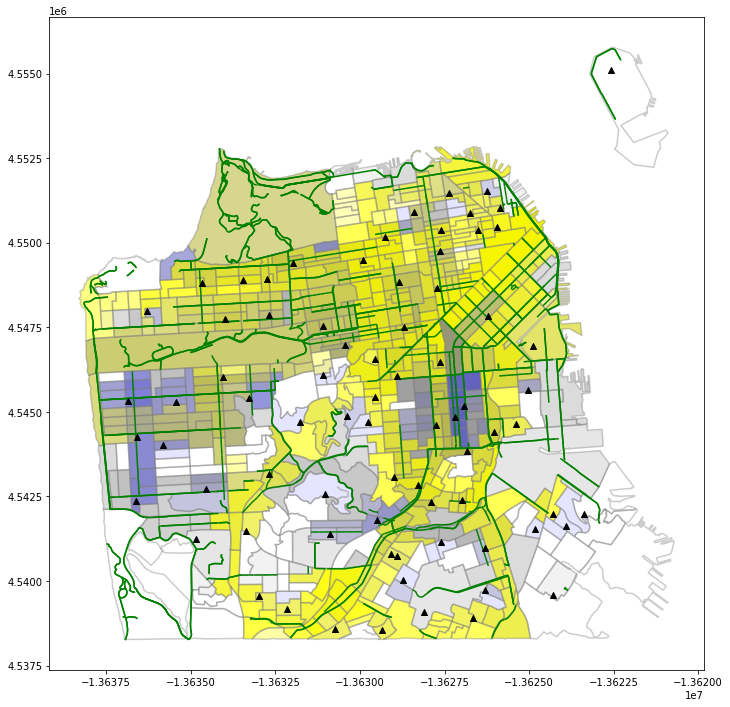

In [13]:
plt.figure(figsize=(12,12))
ax = plt.gca()
census.boundary.plot(ax=ax, color='gray', alpha=0.4)
# relevant_blocks.boundary.plot(ax=ax, color='black', alpha=0.4)
# relevant_blocks.loc[relevant_blocks.BlockGroup.isin(bike_distance_blocks[413])].plot(ax=ax, color='gray', alpha=1)
for sch, blocks in bike.items():
    census.loc[census.BlockGroup.isin(blocks)].plot(ax=ax, color='gray', alpha=.1)
for sch, blocks in walk.items():
    census.loc[census.BlockGroup.isin(blocks)].plot(ax=ax, color='blue', alpha=.1)
for sch, blocks in muni.items():
    census.loc[census.BlockGroup.isin(blocks)].plot(ax=ax, color='yellow', alpha=.1)
# sc_df.loc[sc_df.school_id == 413].plot(ax=ax, c='black', marker='^', zorder=50, alpha=1)
sc_df.plot(ax=ax, c='black', marker='^', zorder=50, alpha=1)
bike_routes.plot(ax=ax, color='green')
# bike_poly.plot(ax=ax, color='red', alpha=0.3)
# plt.scatter([-122.4034504], [37.8050417])
# sc_df.sjoin(bike_poly).plot(ax=ax, marker='^', c='black', zorder=50)

2022-02-18 09:22:32 Found nearest node (65295480) to point (37.783001, -122.482263)
2022-02-18 09:22:32 Found nearest node (4150430557) to point (37.807729, -122.411784)
2022-02-18 09:22:32 Begin plotting the graph...
2022-02-18 09:22:33 Created edges GeoDataFrame from graph
2022-02-18 09:22:36 Finished plotting the graph


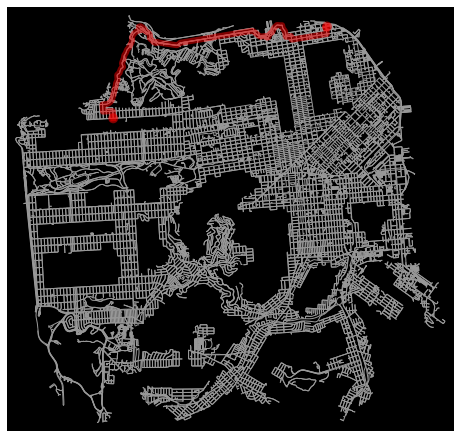

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [50]:
start_node = ox.get_nearest_node(g, (37.783001, -122.482263)) # school
end_node = ox.get_nearest_node(g, (37.807729, -122.411784)) # block
route = nx.shortest_path(g, start_node, end_node, weight='distance')
ox.plot_graph_route(g, route, route_linewidth=6, node_size=0, bgcolor='k')

In [107]:
with open('/Users/katherinementzer/Dropbox/SFUSD/bike_zones.yaml', 'w') as outfile:
    yaml.dump(bike_distance_blocks, outfile)

In [9]:
with open("/Users/katherinementzer/Dropbox/SFUSD/slow_street_walk_zones.yaml", "r") as f:
    walk = yaml.safe_load(f)

In [10]:
with open("/Users/katherinementzer/Dropbox/SFUSD/one_muni_zones.yaml", "r") as f:
    muni = yaml.safe_load(f)

In [11]:
with open("/Users/katherinementzer/Dropbox/SFUSD/bike_zones.yaml", "r") as f:
    bike = yaml.safe_load(f)